# Check upper limit routine

## Author(s): Sven Buder (SB, WG4)

### History:
181022 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import pandas
from astropy.table import Table, hstack, vstack

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
subsets = []
for each_subset in range(0,66):
    if glob.glob('10k_subsets/GALAH_10k_'+str(each_subset)+'_lbol_final.fits') != []:
        subsets.append('10k_subsets/GALAH_10k_'+str(each_subset)+'_lbol_final.fits')

subsets = np.array(subsets)

len_subsets = len(subsets)
print(len_subsets)
subsets

66


array(['10k_subsets/GALAH_10k_0_lbol_final.fits',
       '10k_subsets/GALAH_10k_1_lbol_final.fits',
       '10k_subsets/GALAH_10k_2_lbol_final.fits',
       '10k_subsets/GALAH_10k_3_lbol_final.fits',
       '10k_subsets/GALAH_10k_4_lbol_final.fits',
       '10k_subsets/GALAH_10k_5_lbol_final.fits',
       '10k_subsets/GALAH_10k_6_lbol_final.fits',
       '10k_subsets/GALAH_10k_7_lbol_final.fits',
       '10k_subsets/GALAH_10k_8_lbol_final.fits',
       '10k_subsets/GALAH_10k_9_lbol_final.fits',
       '10k_subsets/GALAH_10k_10_lbol_final.fits',
       '10k_subsets/GALAH_10k_11_lbol_final.fits',
       '10k_subsets/GALAH_10k_12_lbol_final.fits',
       '10k_subsets/GALAH_10k_13_lbol_final.fits',
       '10k_subsets/GALAH_10k_14_lbol_final.fits',
       '10k_subsets/GALAH_10k_15_lbol_final.fits',
       '10k_subsets/GALAH_10k_16_lbol_final.fits',
       '10k_subsets/GALAH_10k_17_lbol_final.fits',
       '10k_subsets/GALAH_10k_18_lbol_final.fits',
       '10k_subsets/GALAH_10k_19_lbol_fin

In [3]:
joined_subsets = Table.read(subsets[0], format='fits')
for each_other_subset in subsets[1:]:
    joined_subsets = vstack([joined_subsets, Table.read(each_other_subset, format='fits')])

In [4]:
joined_subsets.write('../data_products/10k_subsets/GALAH_10k_combined_lbol_final.fits',overwrite=True)

In [5]:
#subset = 65
#data = Table.read('10k_subsets/GALAH_10k_'+str(subset)+'_lbol.fits',1)

data = Table.read('10k_subsets/GALAH_10k_combined_lbol_final.fits',1)

In [6]:
modes = np.array([str(x)[2:-1].replace(' ','') for x in data['MODE'][0]])
modes = modes[np.where(modes != '')]
u, mode_indices = np.unique(modes, return_inverse=True)
mode = u[mode_indices]
mode_indices = [np.where(x == modes)[0][0] for x in mode]
print(np.array([mode,mode_indices]).T)

[['Sp' '0']
 ['Fe' '1']
 ['Li6708' '2']
 ['Li6708_NoRV' '3']
 ['C6588' '4']
 ['O' '5']
 ['Na' '6']
 ['Mg5711' '7']
 ['Al' '8']
 ['Si' '9']
 ['K7699' '10']
 ['Ca' '11']
 ['Sc' '12']
 ['Ti4758' '13']
 ['Ti4759' '14']
 ['Ti4778' '15']
 ['Ti4782' '16']
 ['Ti4798' '17']
 ['Ti4802' '18']
 ['Ti4820' '19']
 ['Ti5689' '20']
 ['Ti5716' '21']
 ['Ti5720' '22']
 ['Ti5739' '23']
 ['Ti5866' '24']
 ['Ti6599' '25']
 ['Ti6717' '26']
 ['Ti7853' '27']
 ['Ti4720' '28']
 ['Ti4765' '29']
 ['Ti4799' '30']
 ['Ti4849' '31']
 ['Ti4866' '32']
 ['Ti4874' '33']
 ['V4832' '34']
 ['Cr' '35']
 ['Mn' '36']
 ['Co4781' '37']
 ['Co4900' '38']
 ['Co5647' '39']
 ['Co6490' '40']
 ['Co6551' '41']
 ['Co6632' '42']
 ['Co6679' '43']
 ['Co7713' '44']
 ['Co7838' '45']
 ['Ni5847' '46']
 ['Ni6586' '47']
 ['Cu5700' '48']
 ['Cu5782' '49']
 ['Zn4722' '50']
 ['Zn4811' '51']
 ['Rb7800' '52']
 ['Sr6550' '53']
 ['Y4855' '54']
 ['Y4884' '55']
 ['Y5663' '56']
 ['Y5729' '57']
 ['Zr4739' '58']
 ['Zr4772' '59']
 ['Zr4806' '60']
 ['Zr4828' '61']

No Figure for Li6708_NoRV


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


No Figure for Ti6599


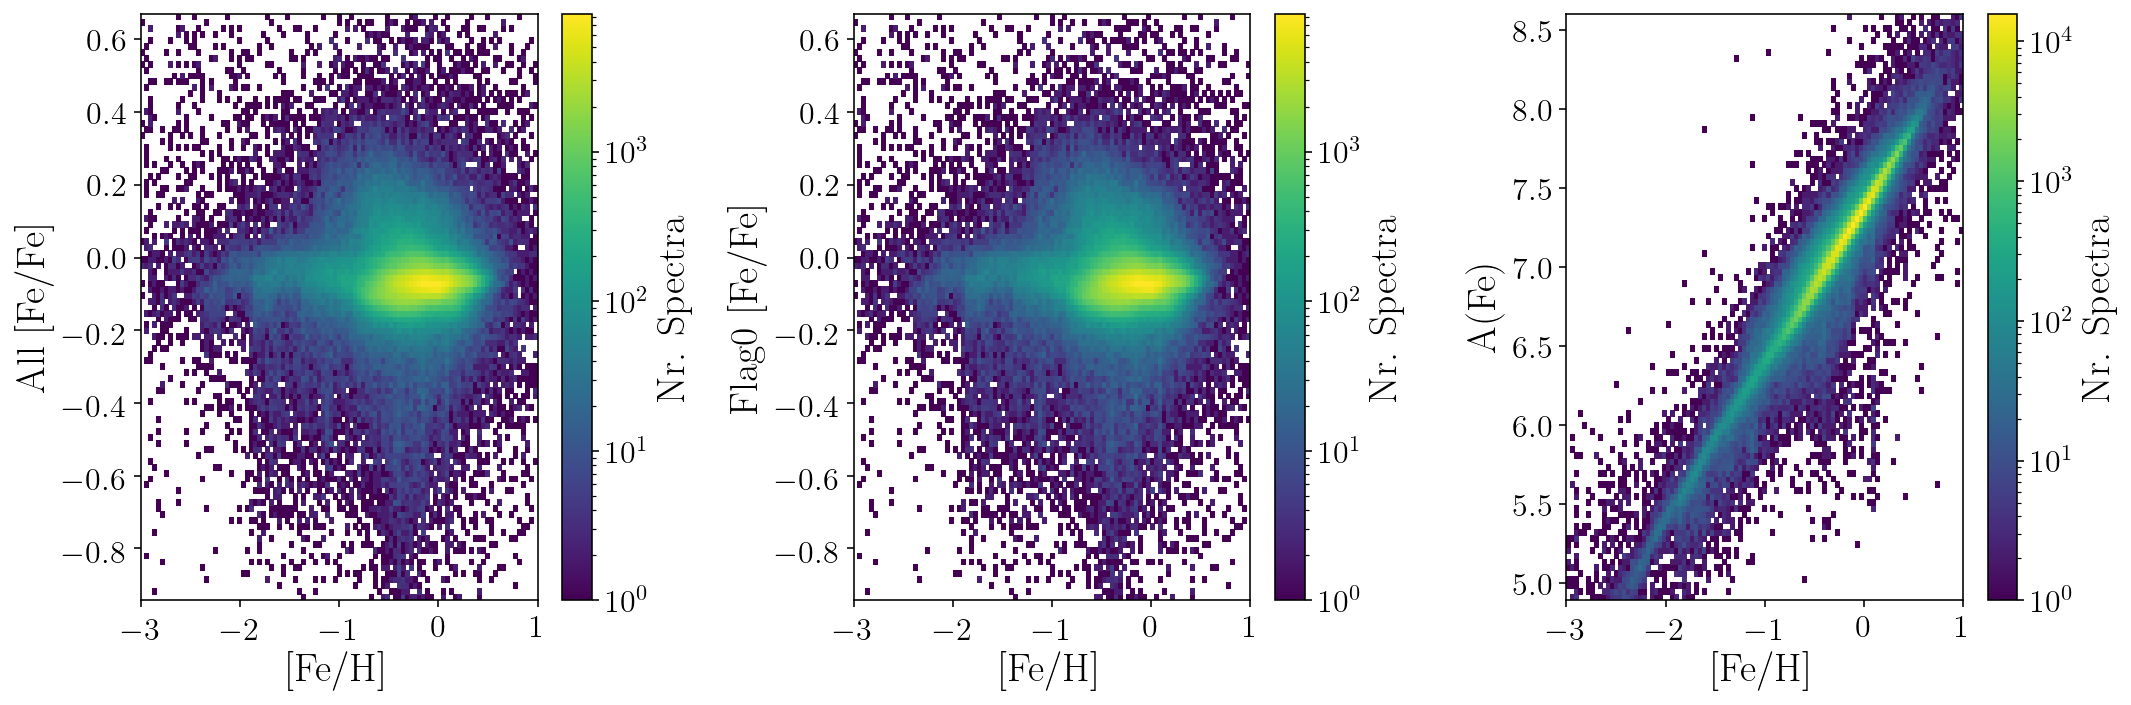

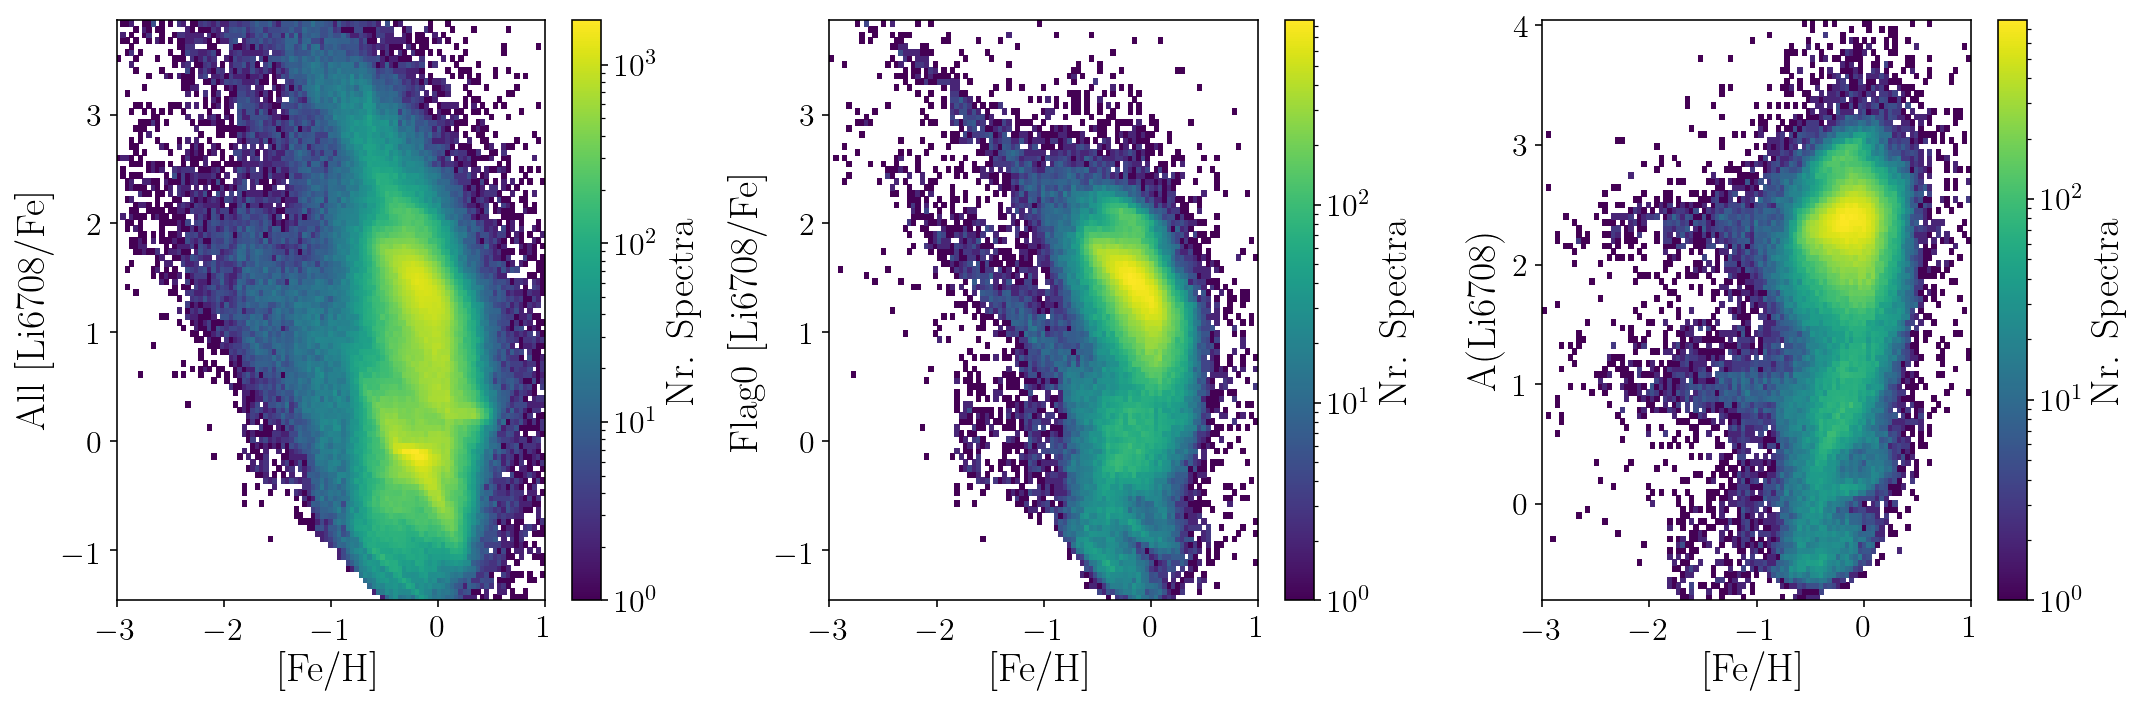

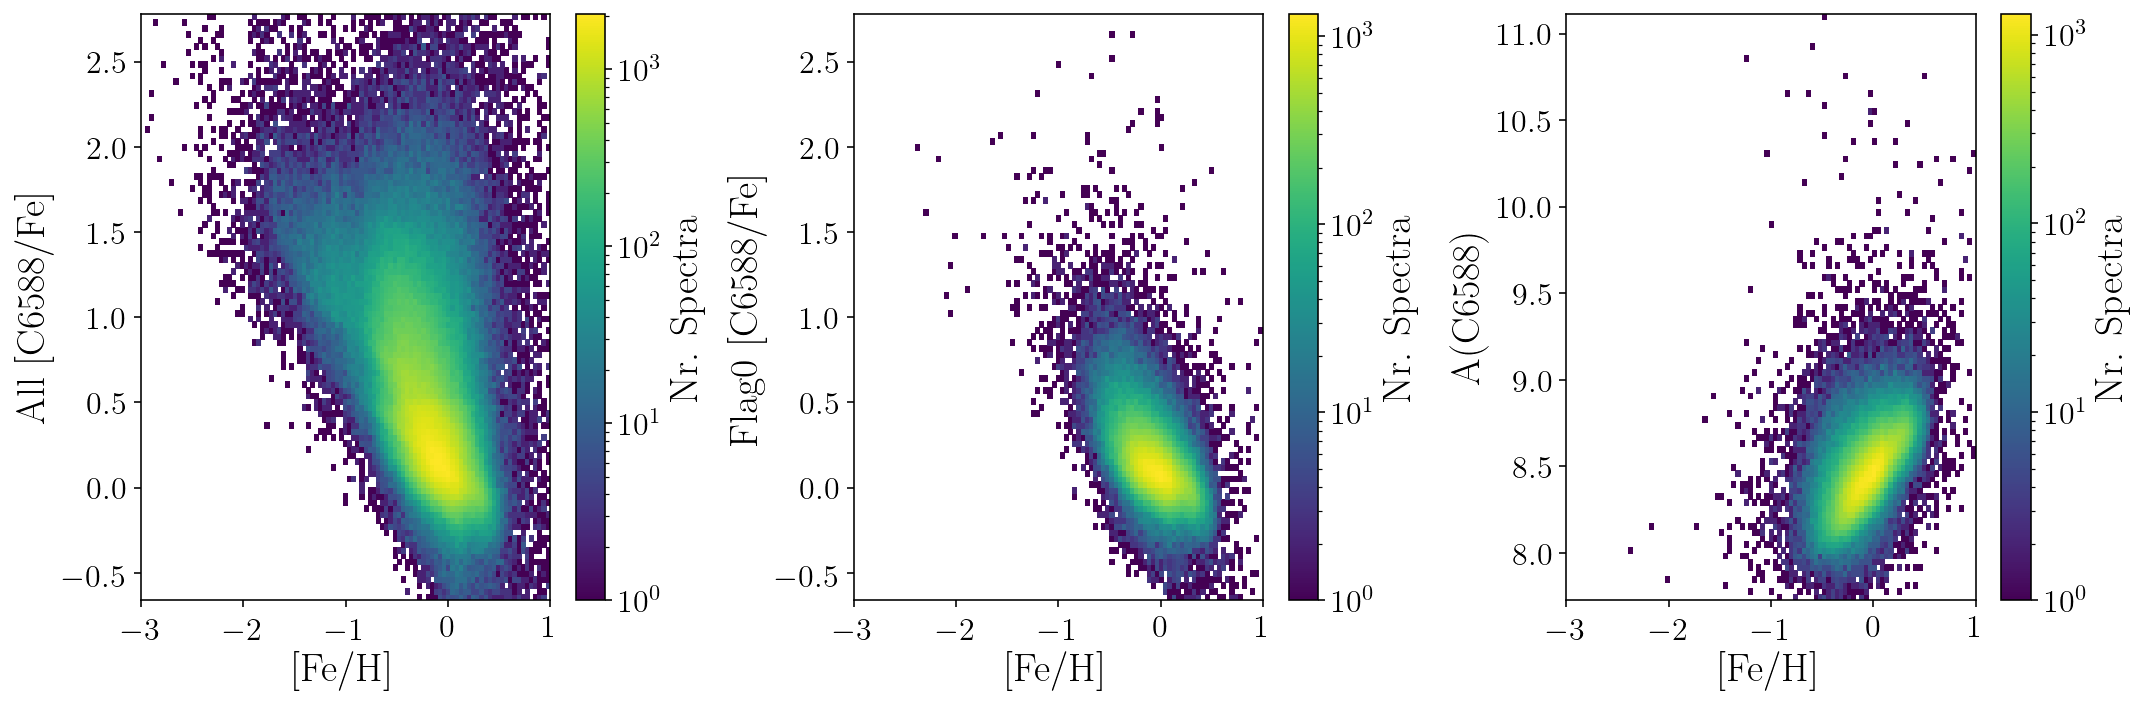

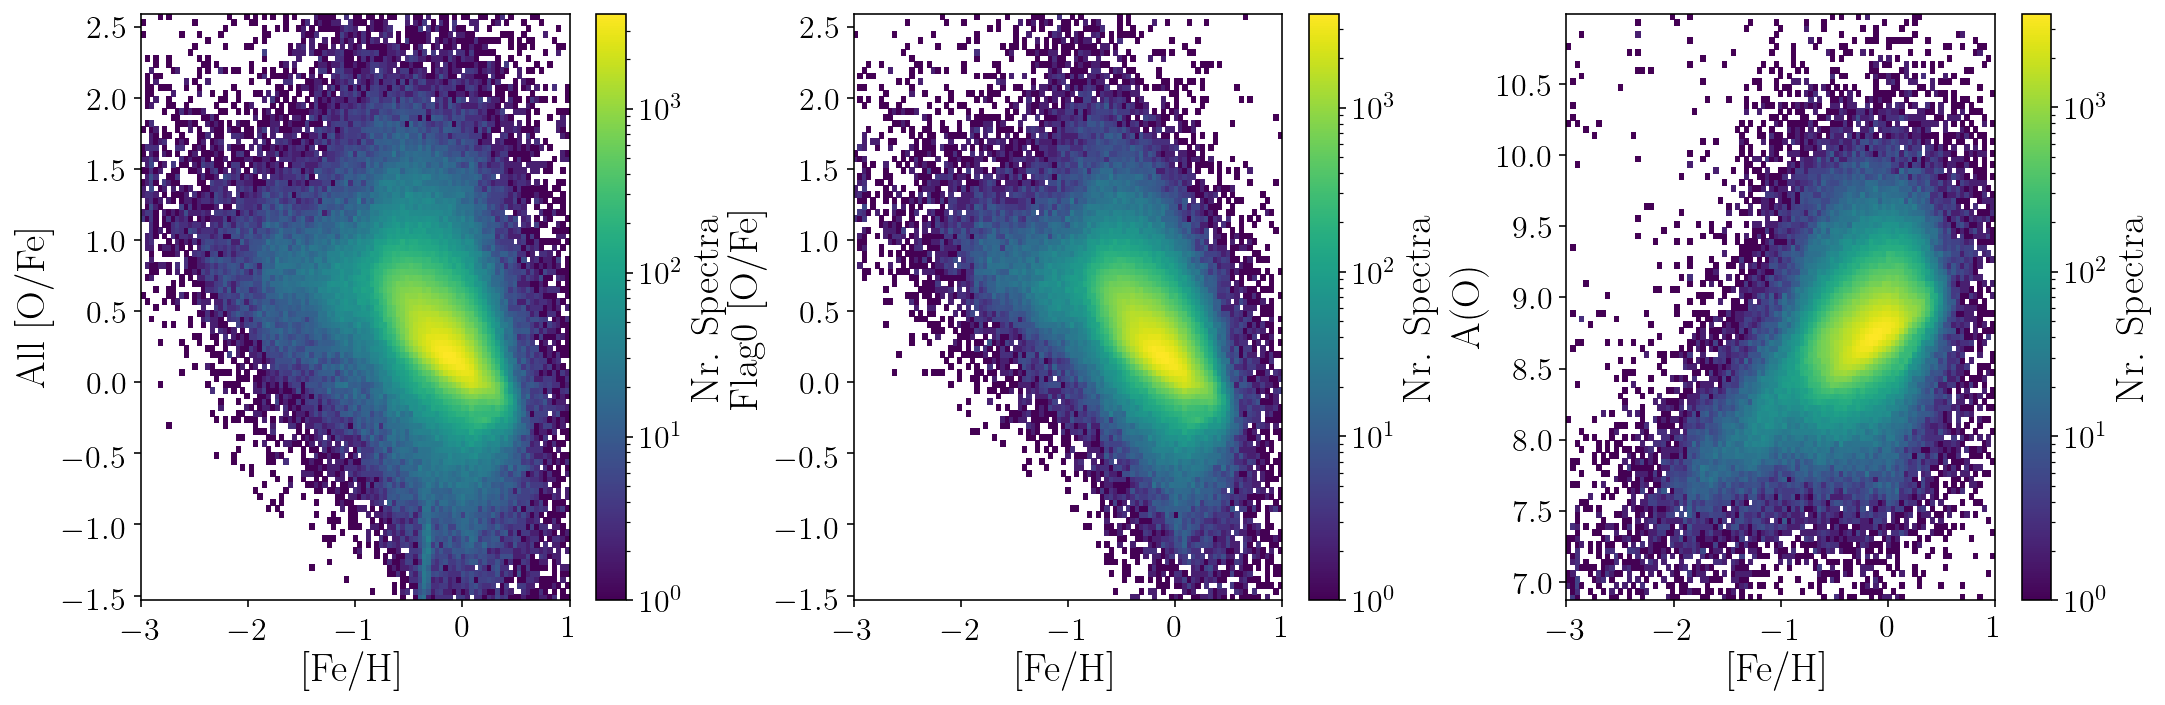

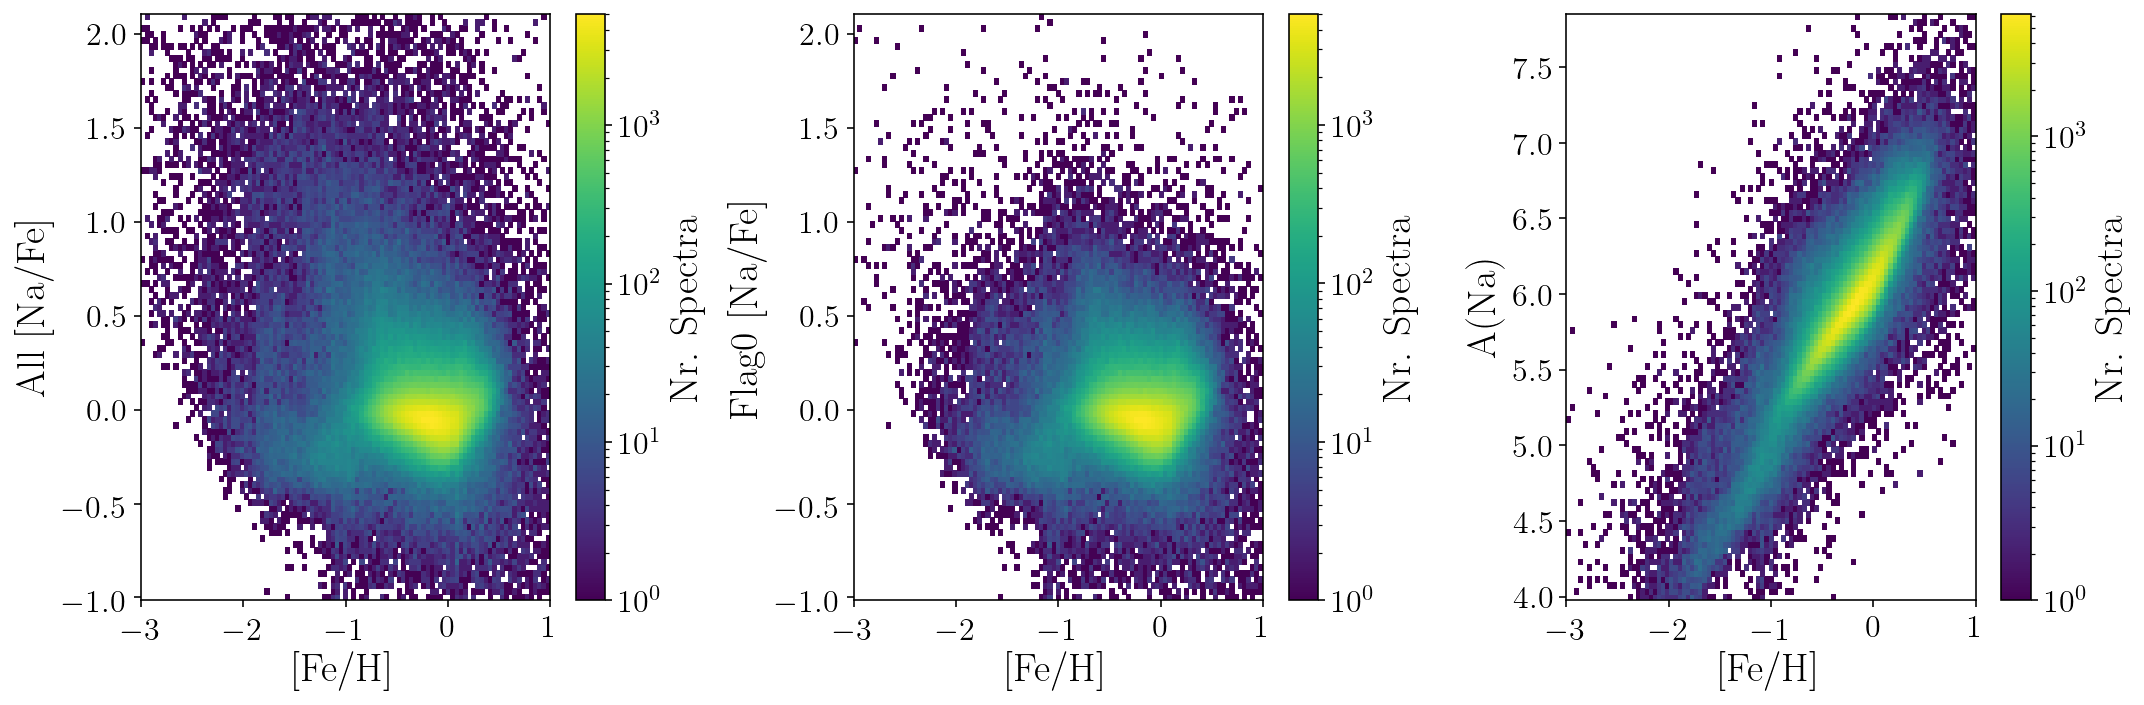

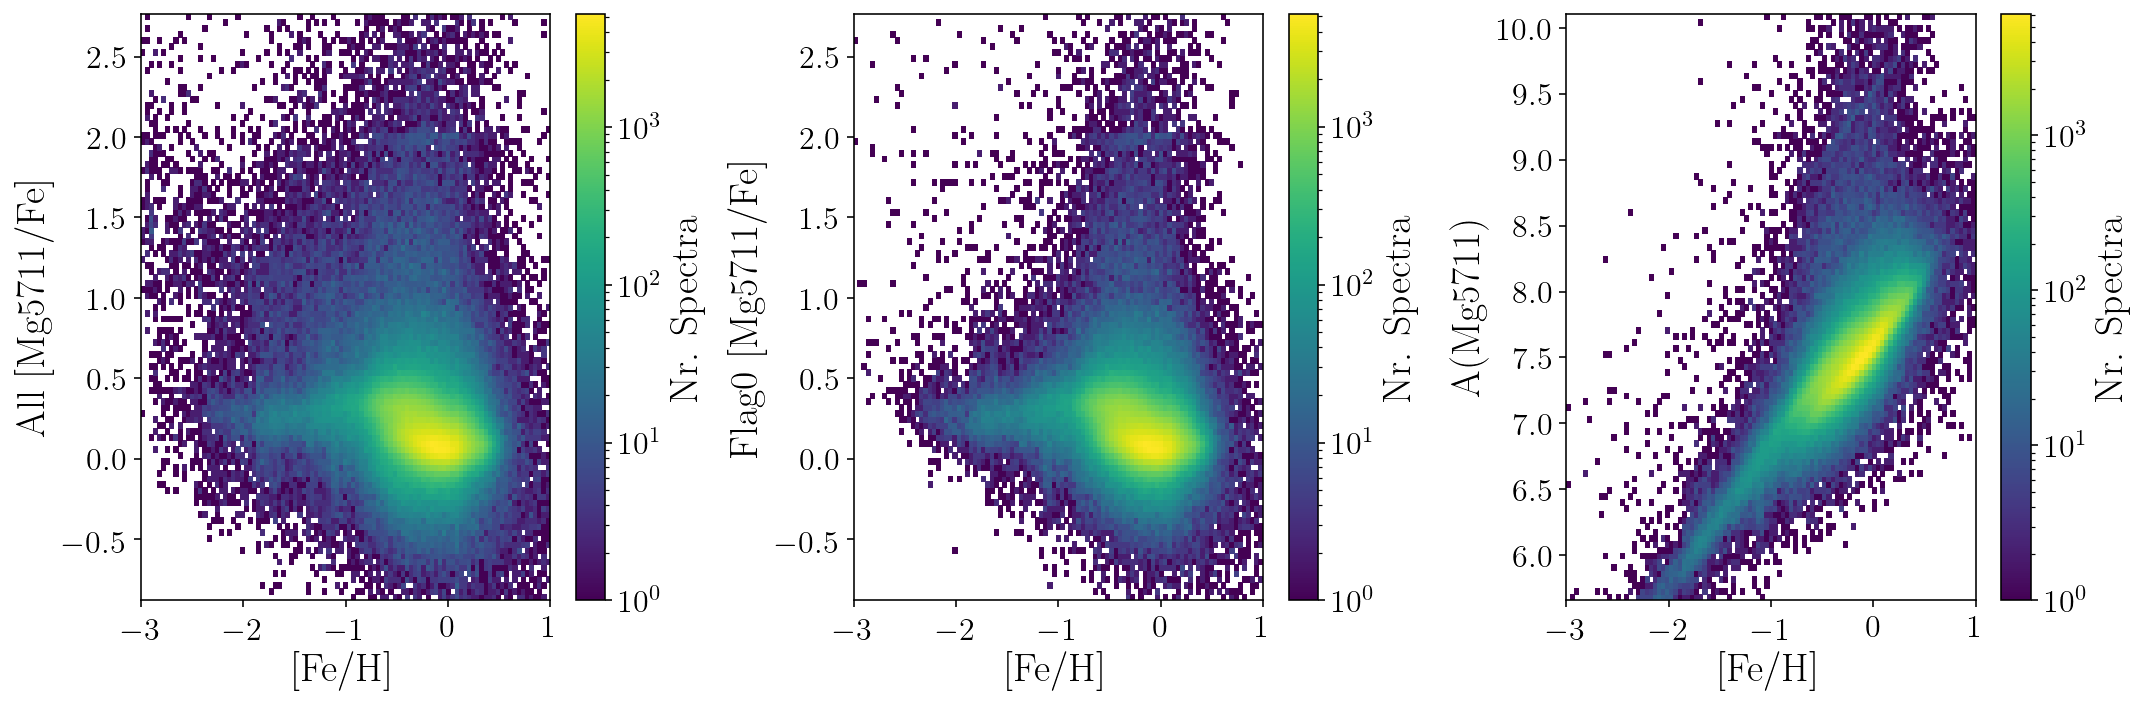

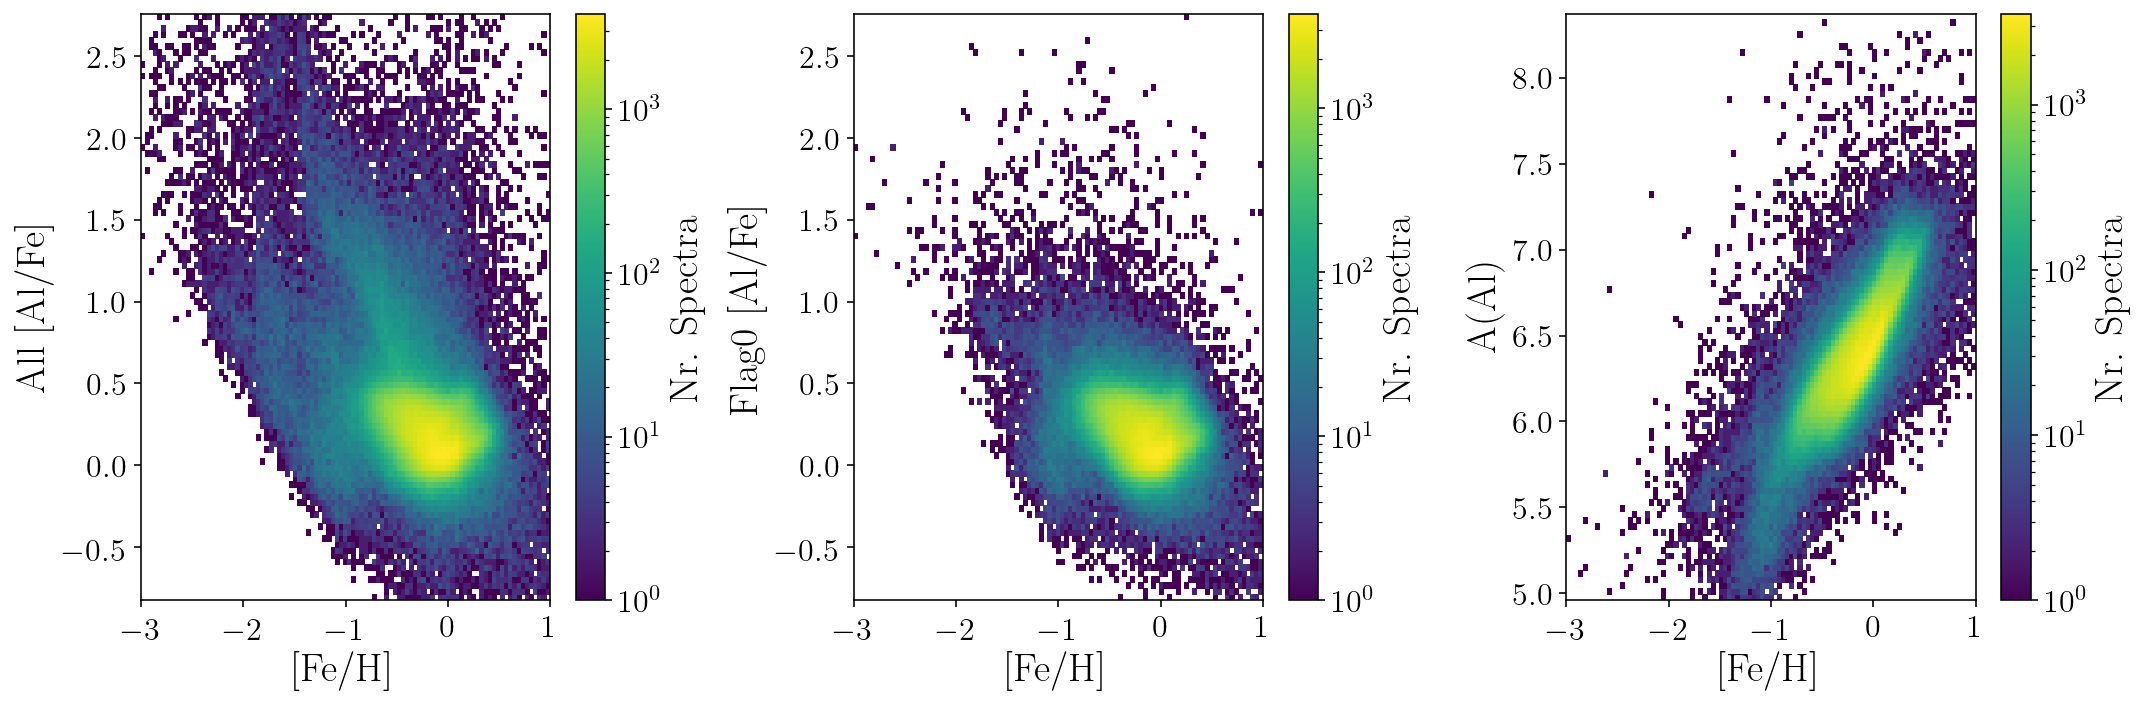

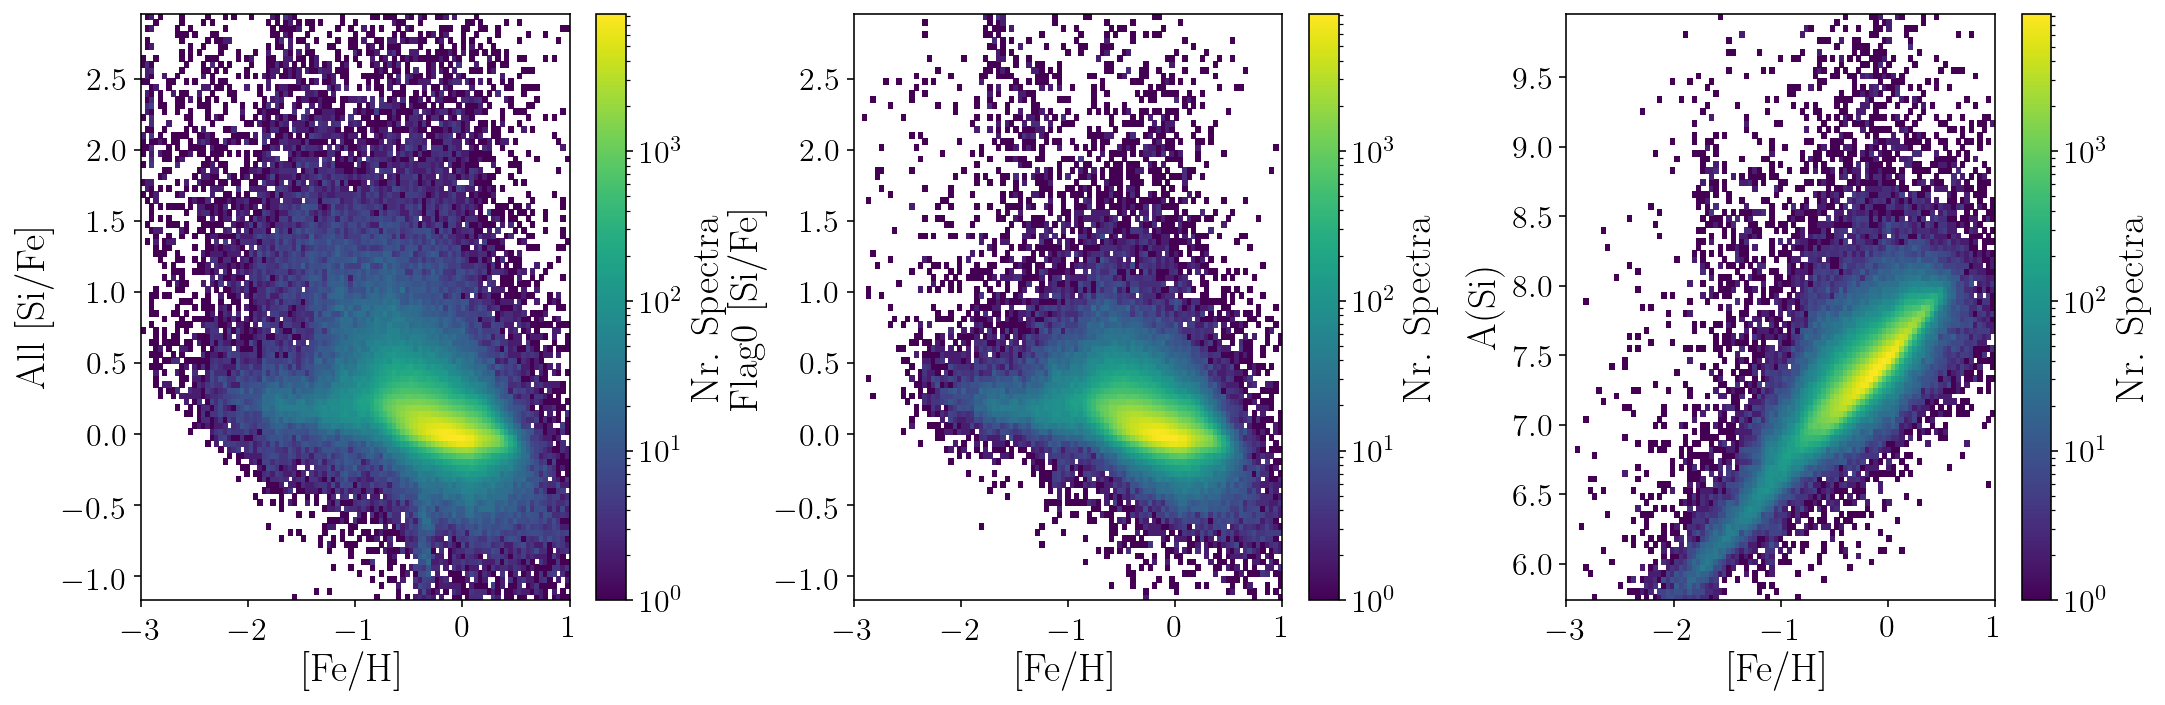

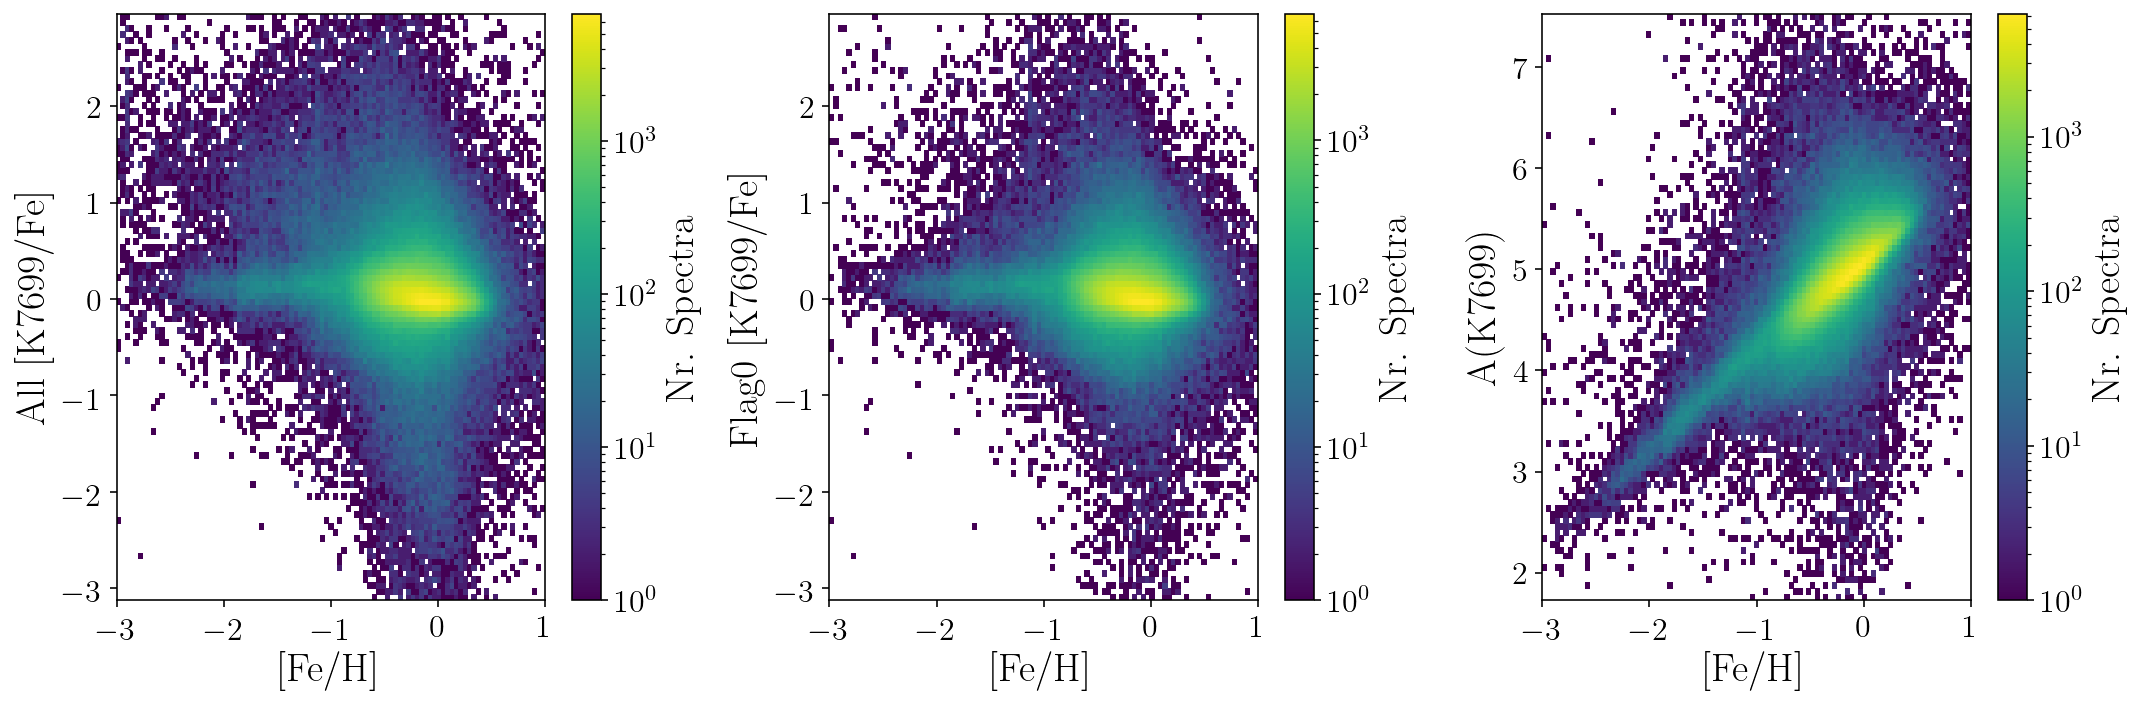

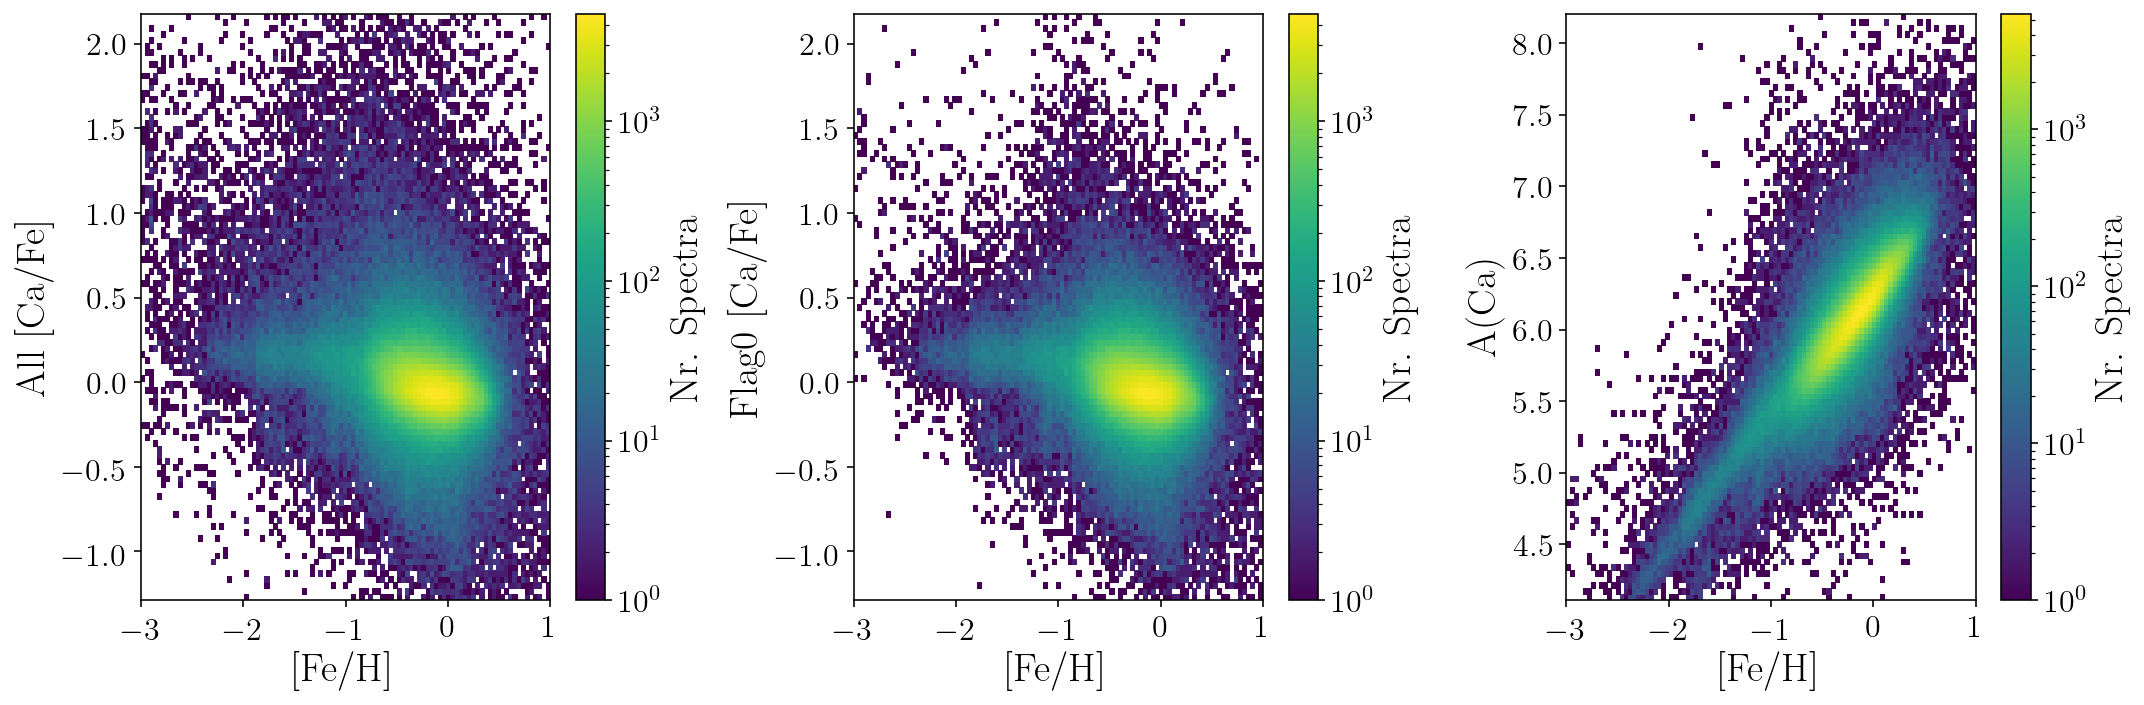

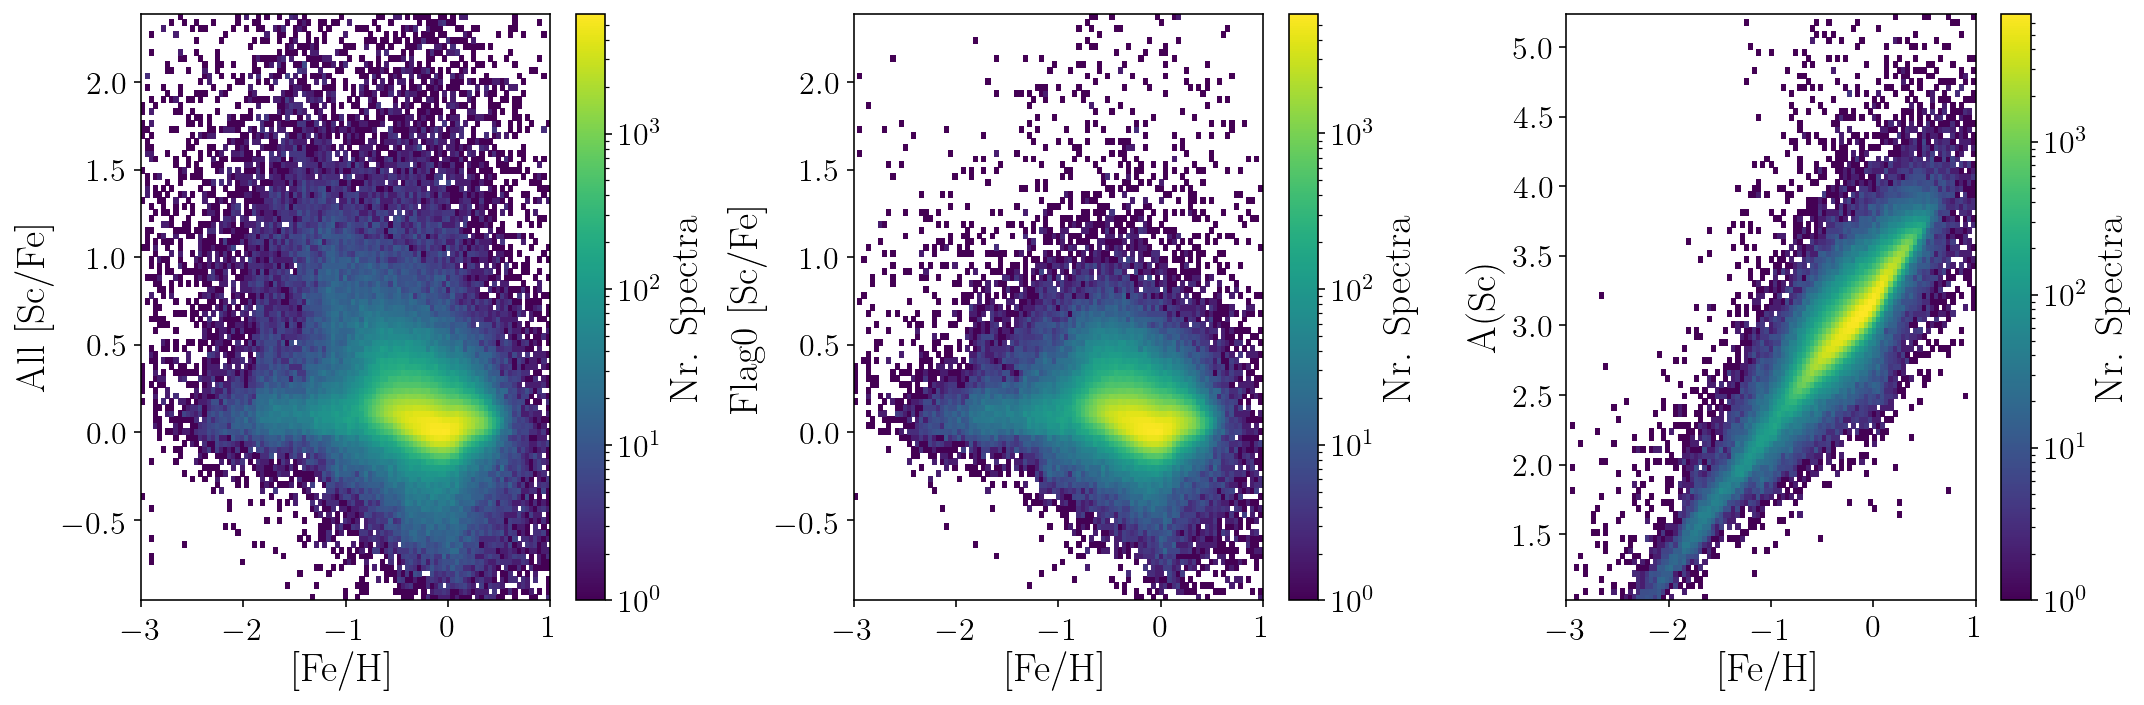

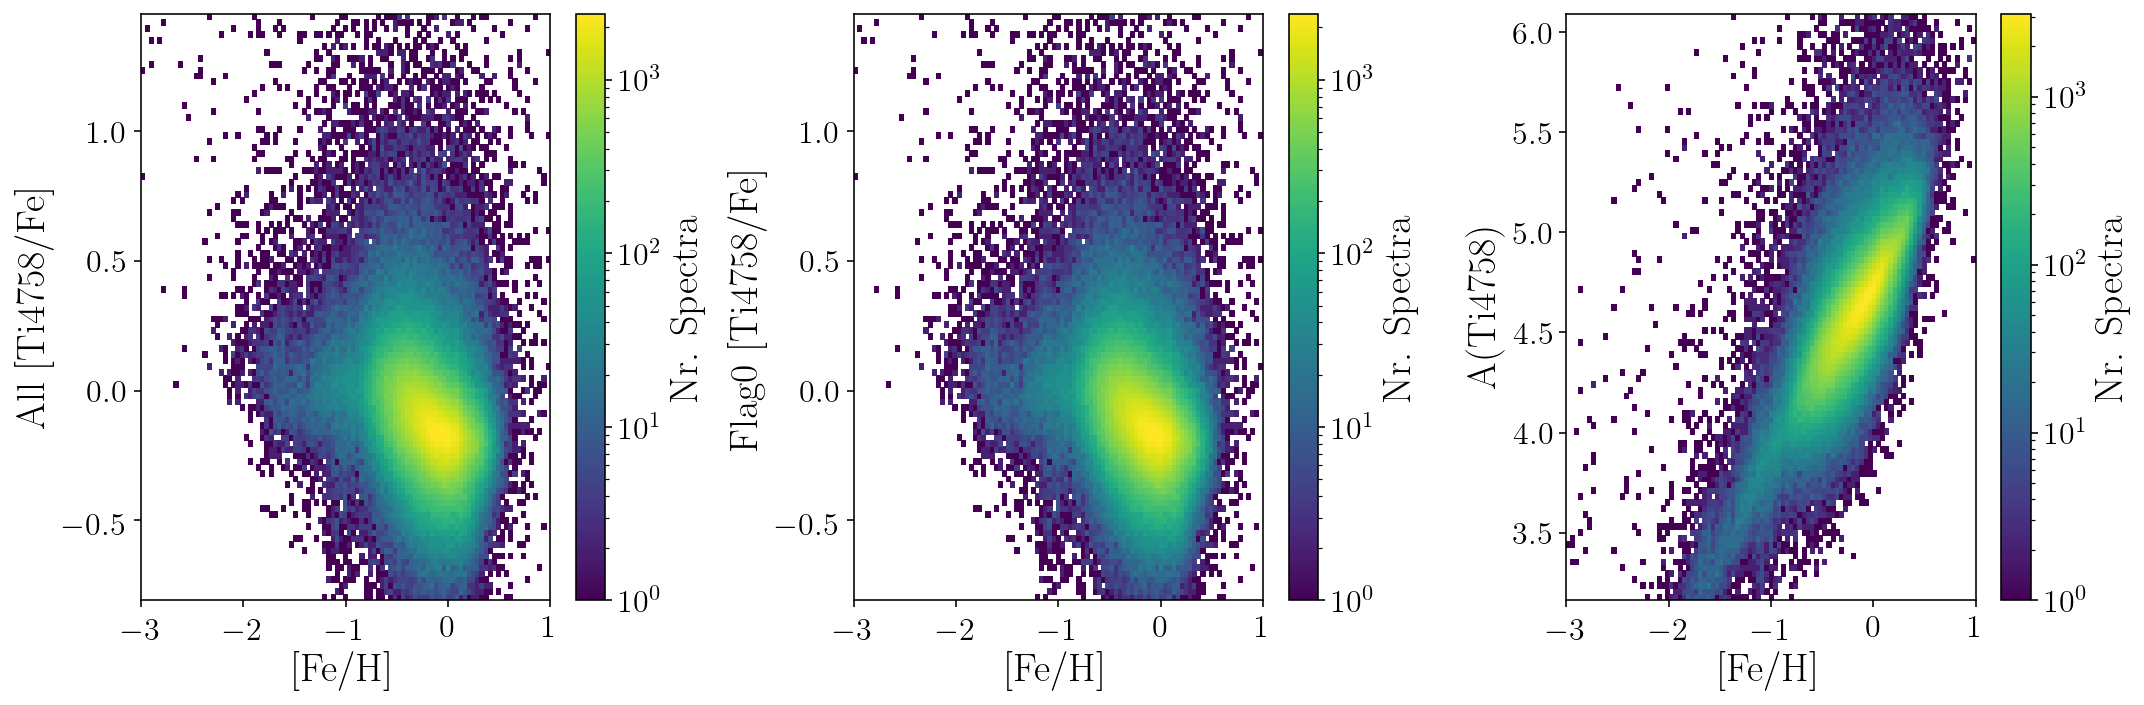

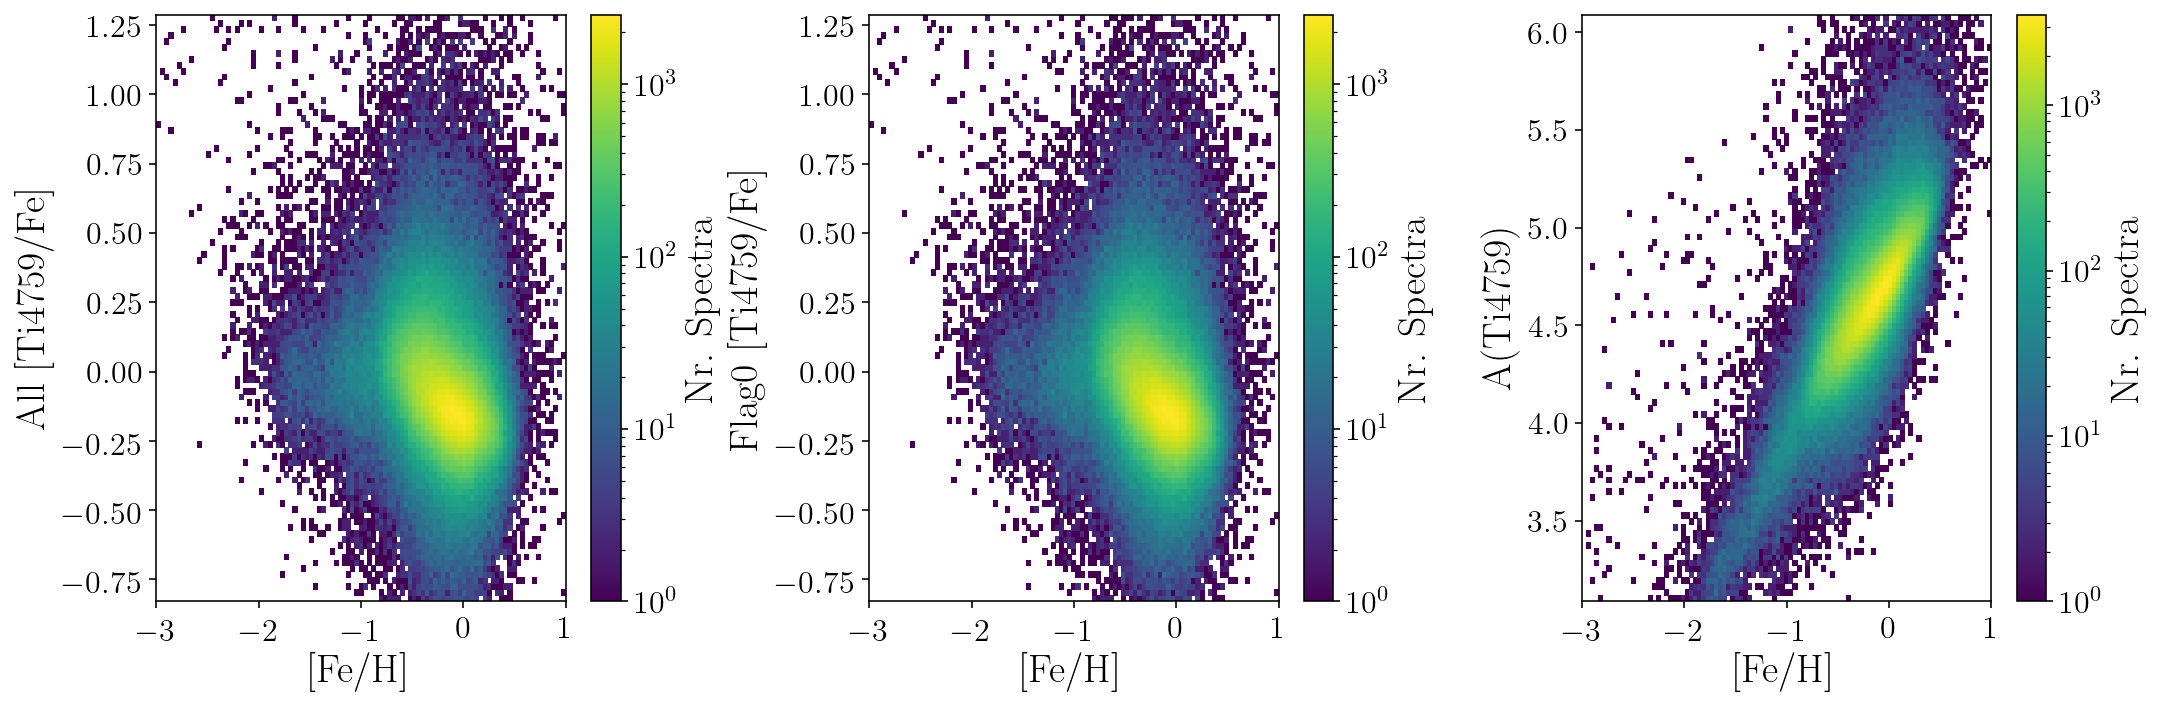

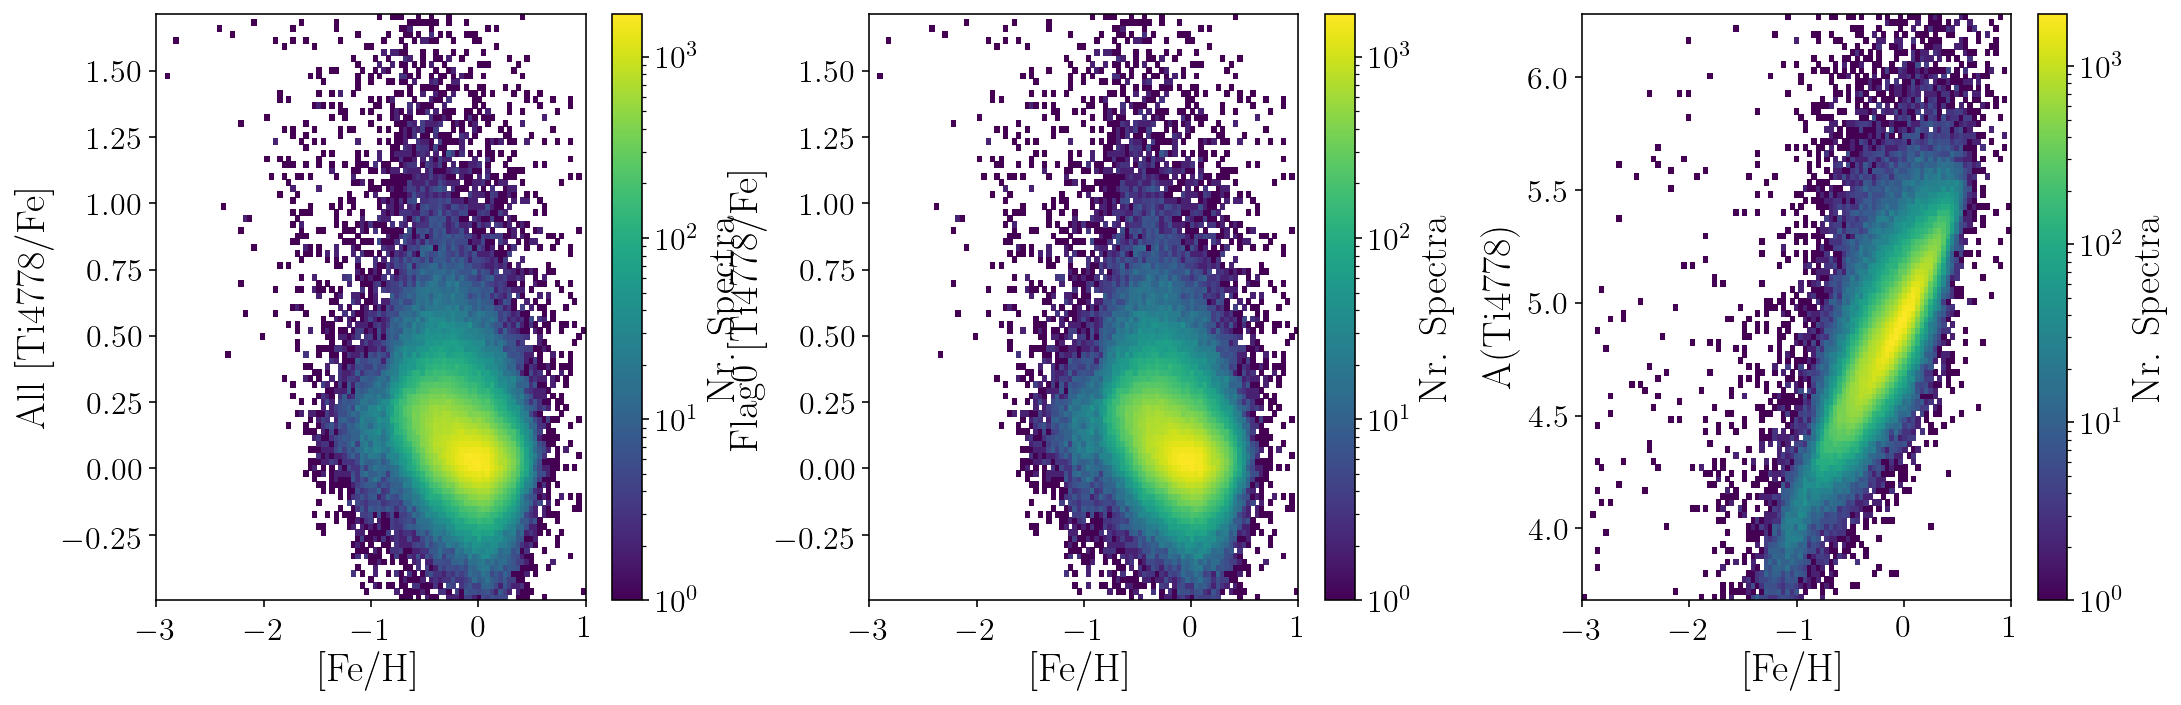

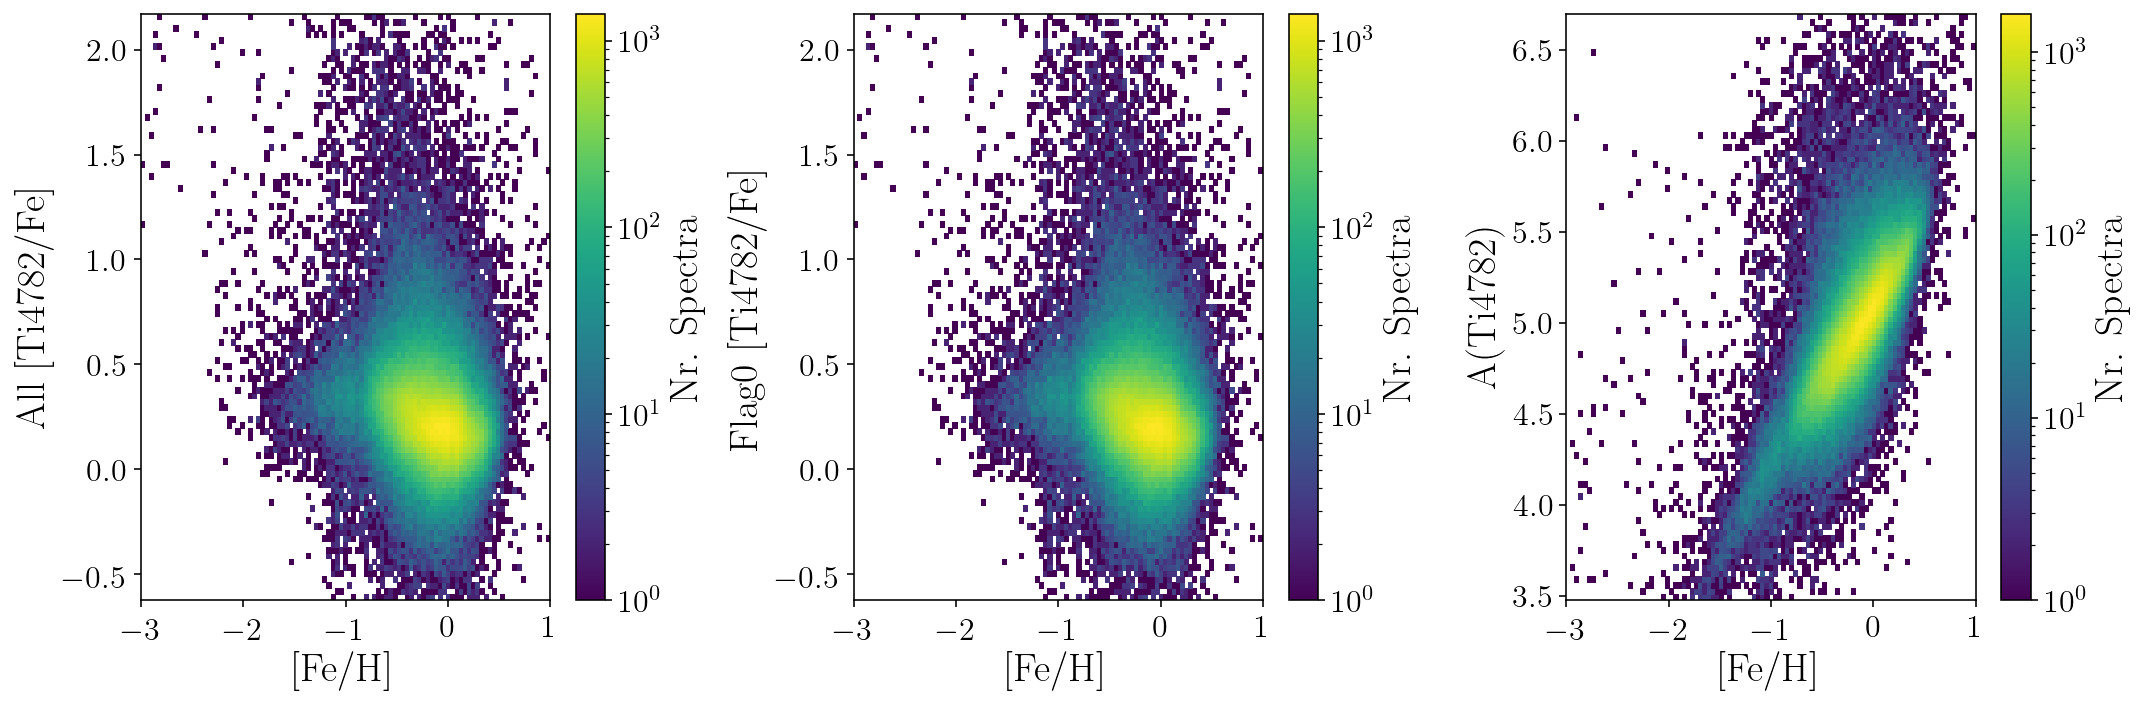

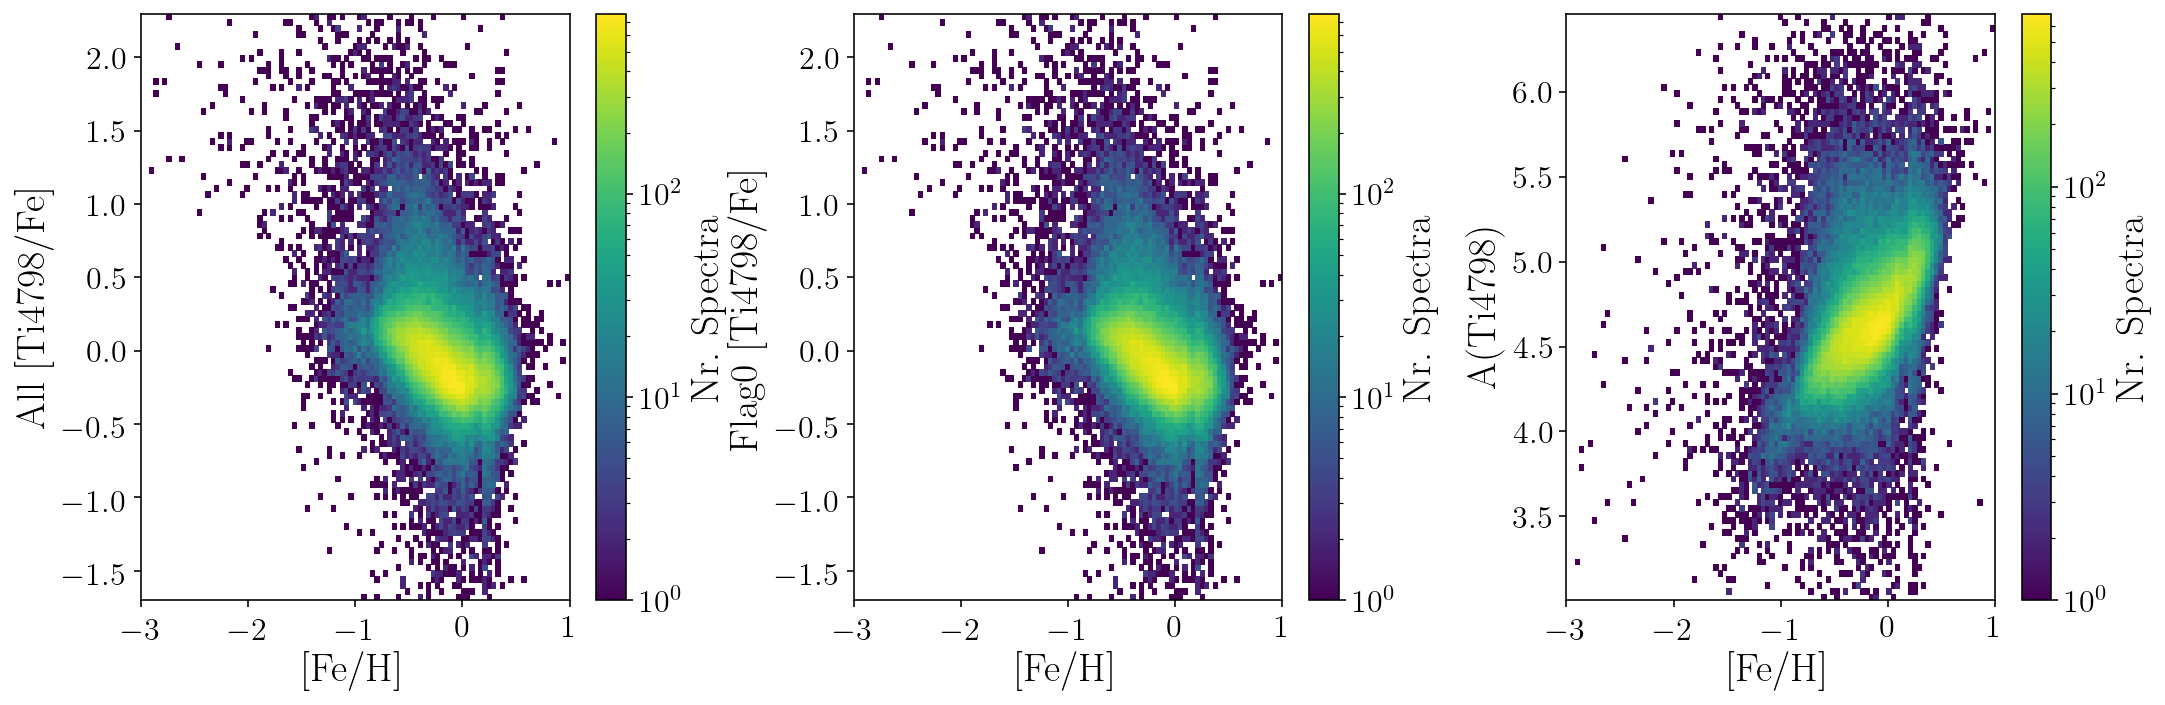

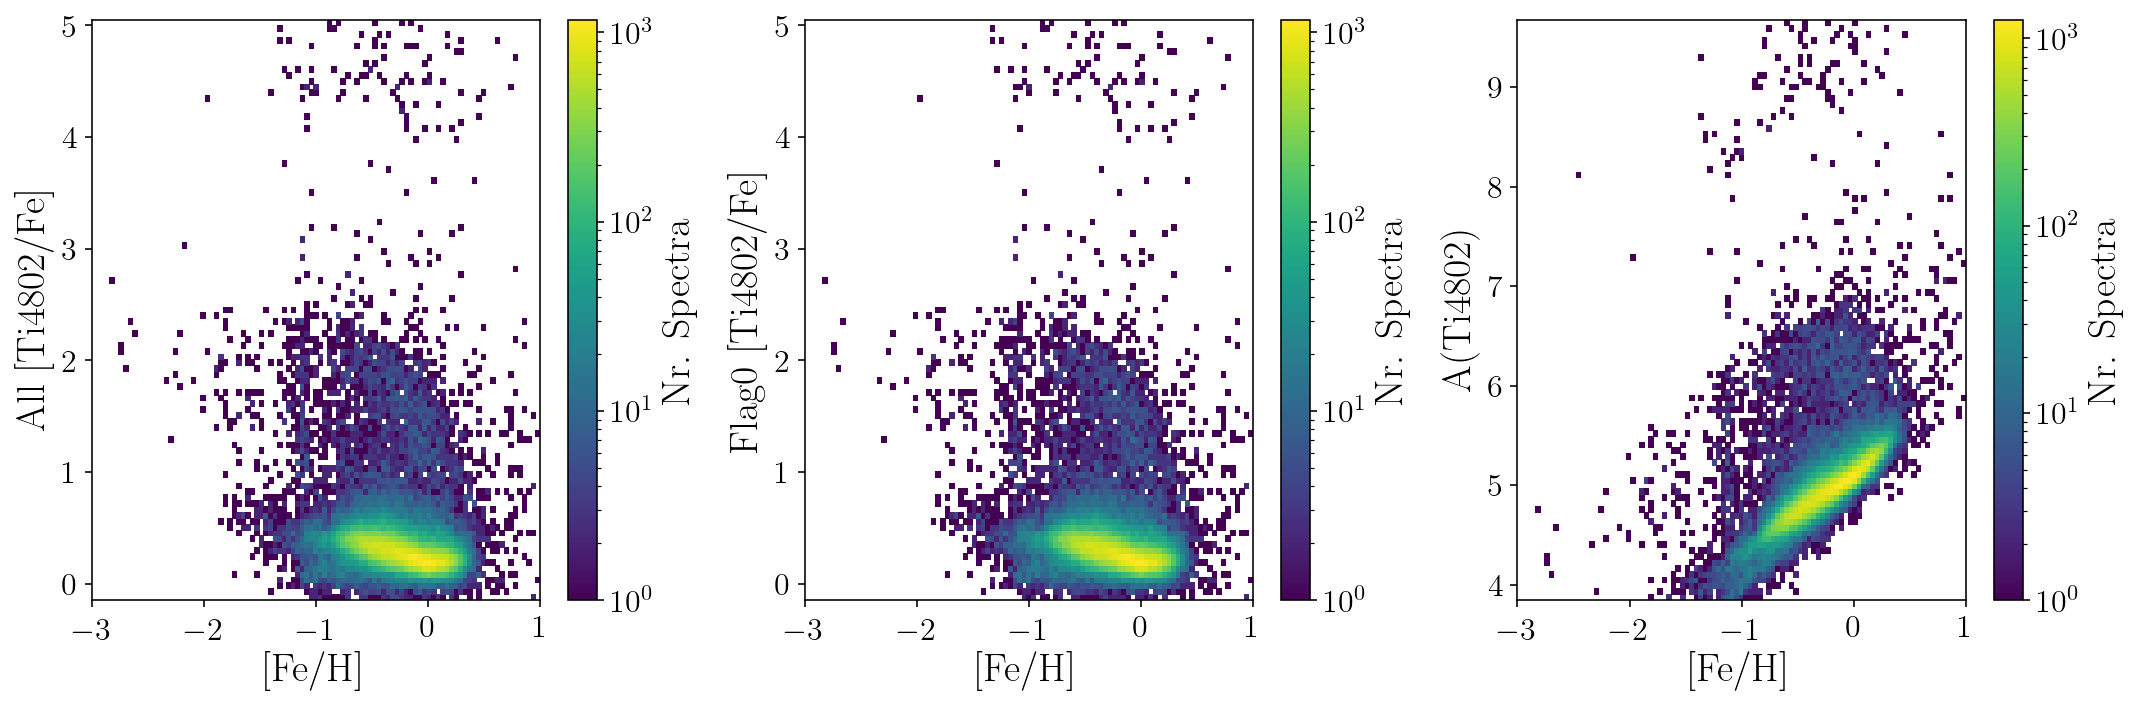

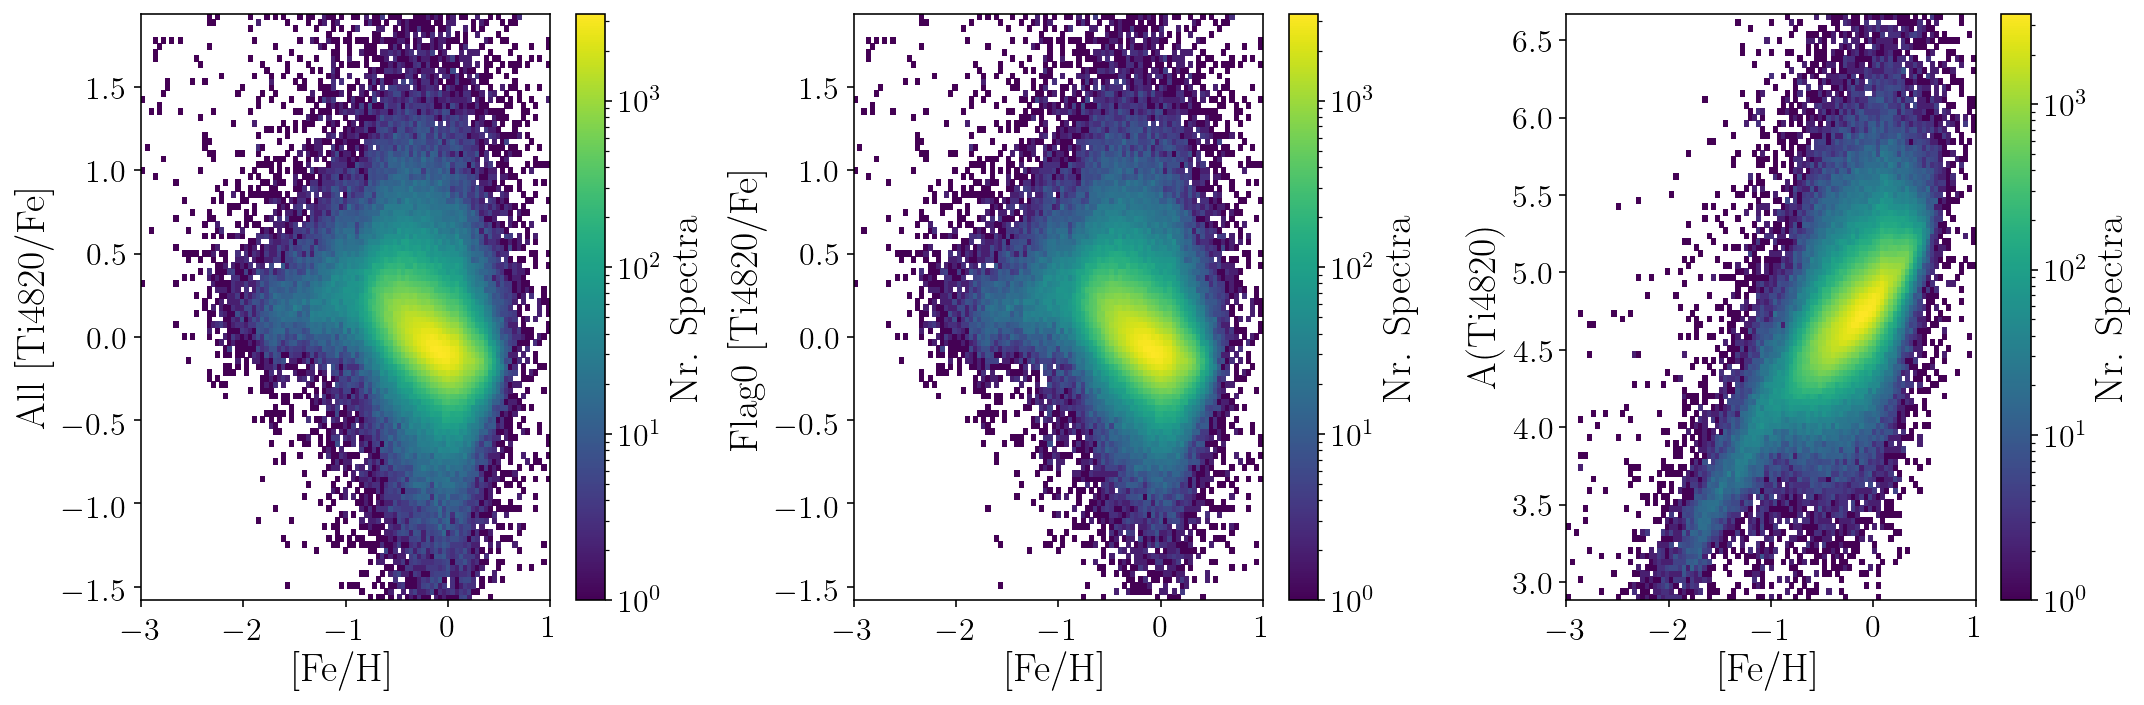

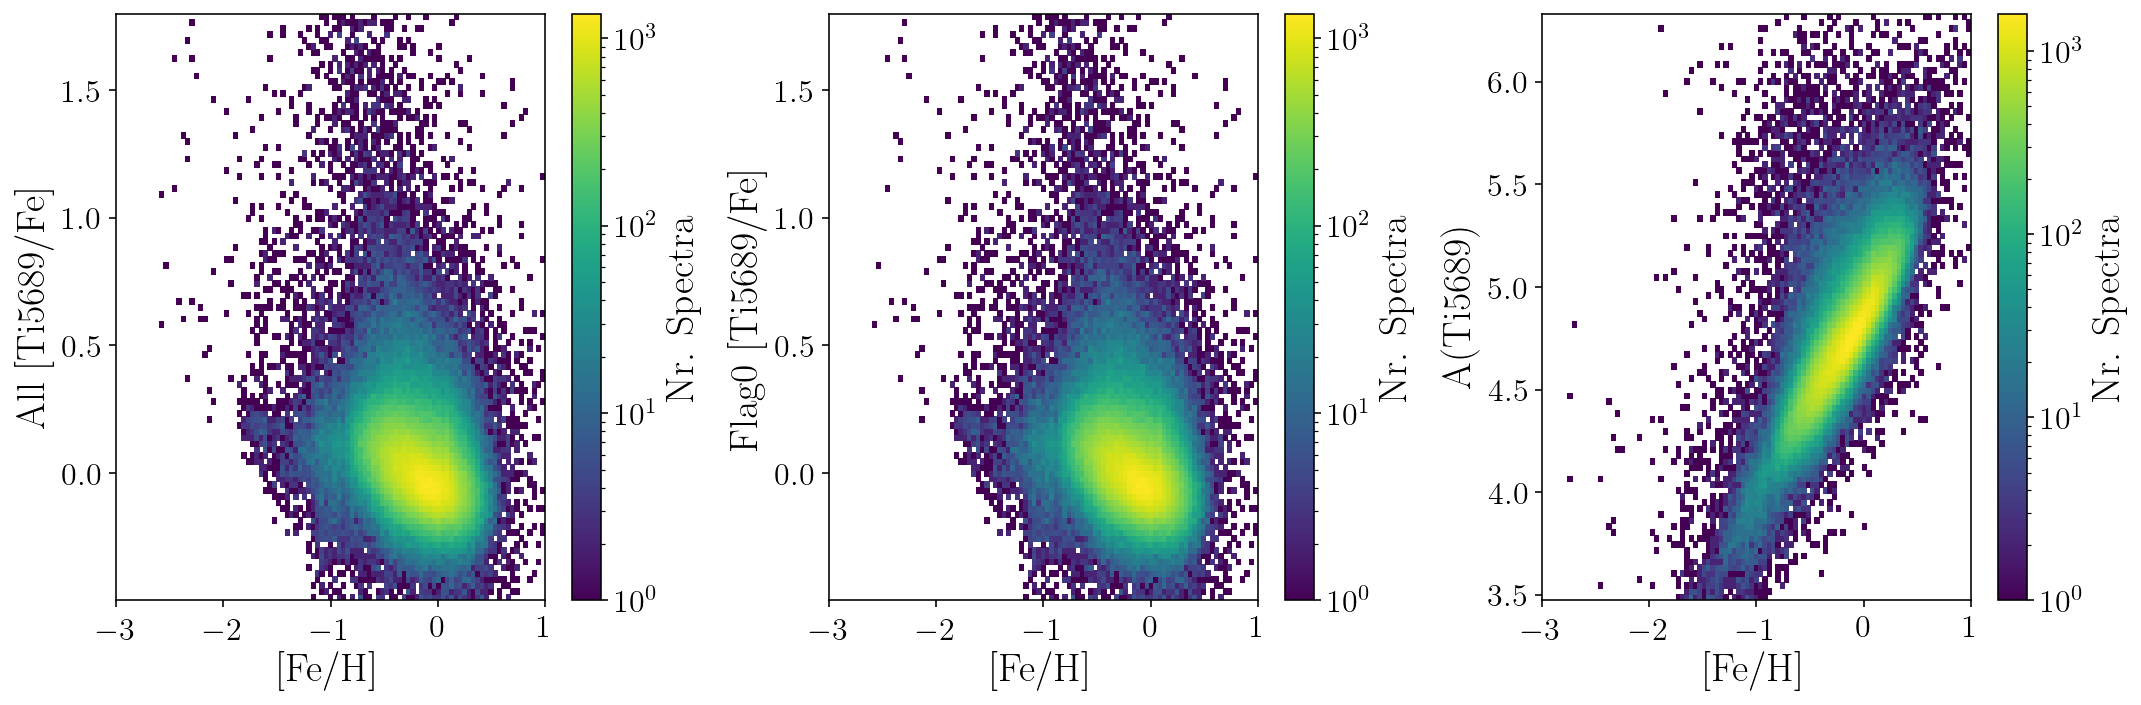

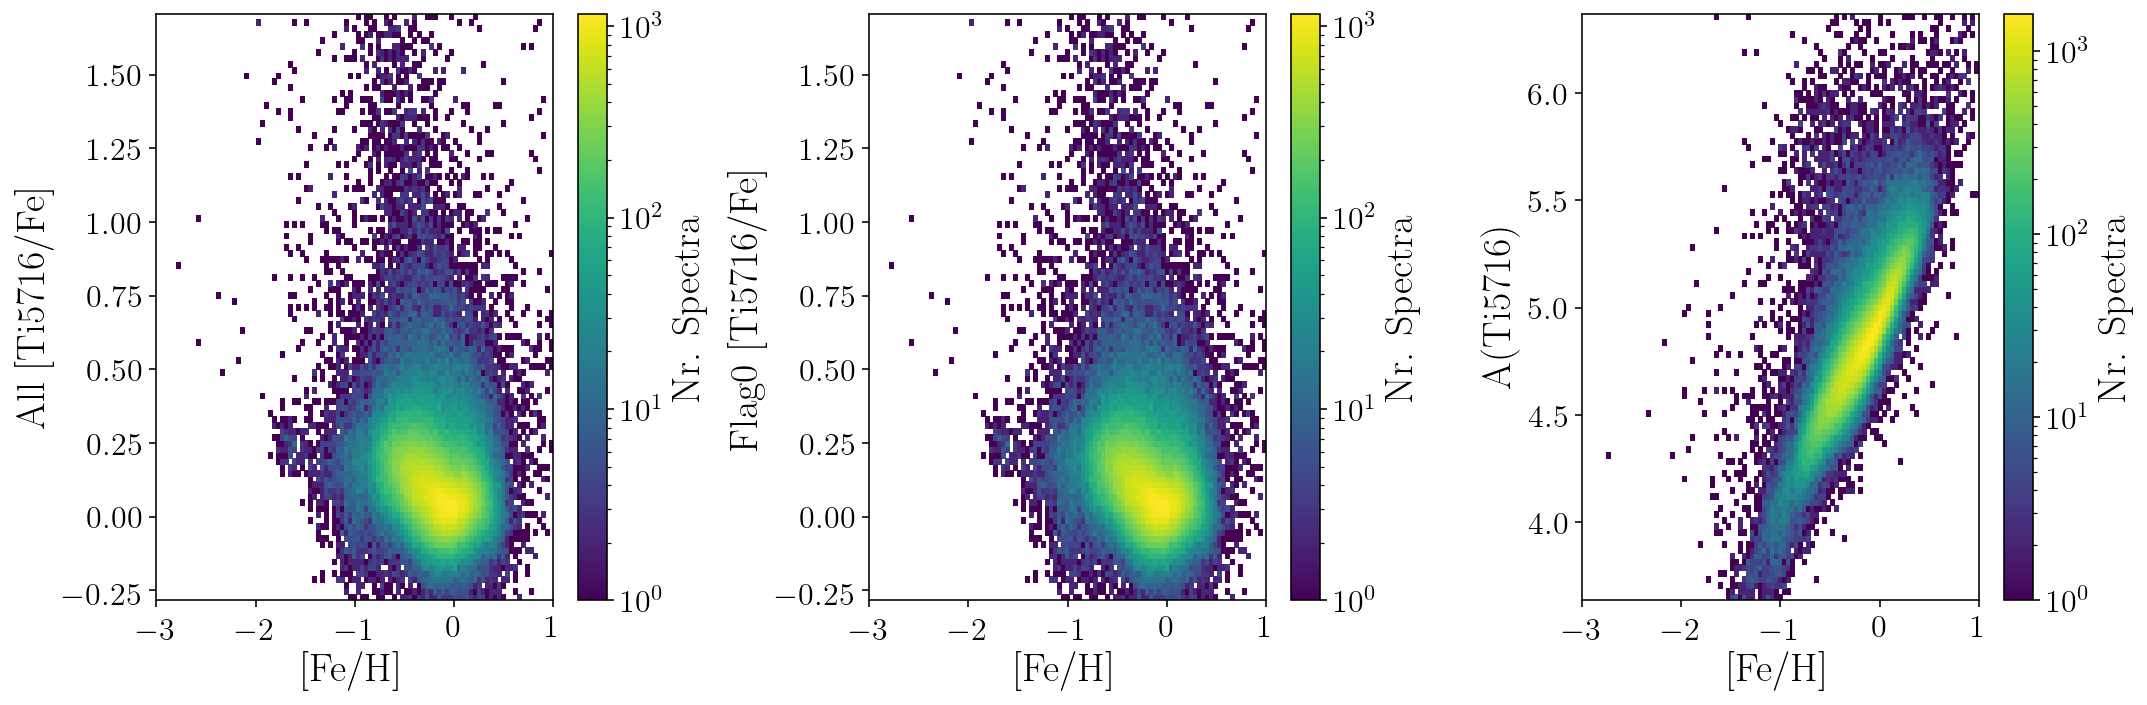

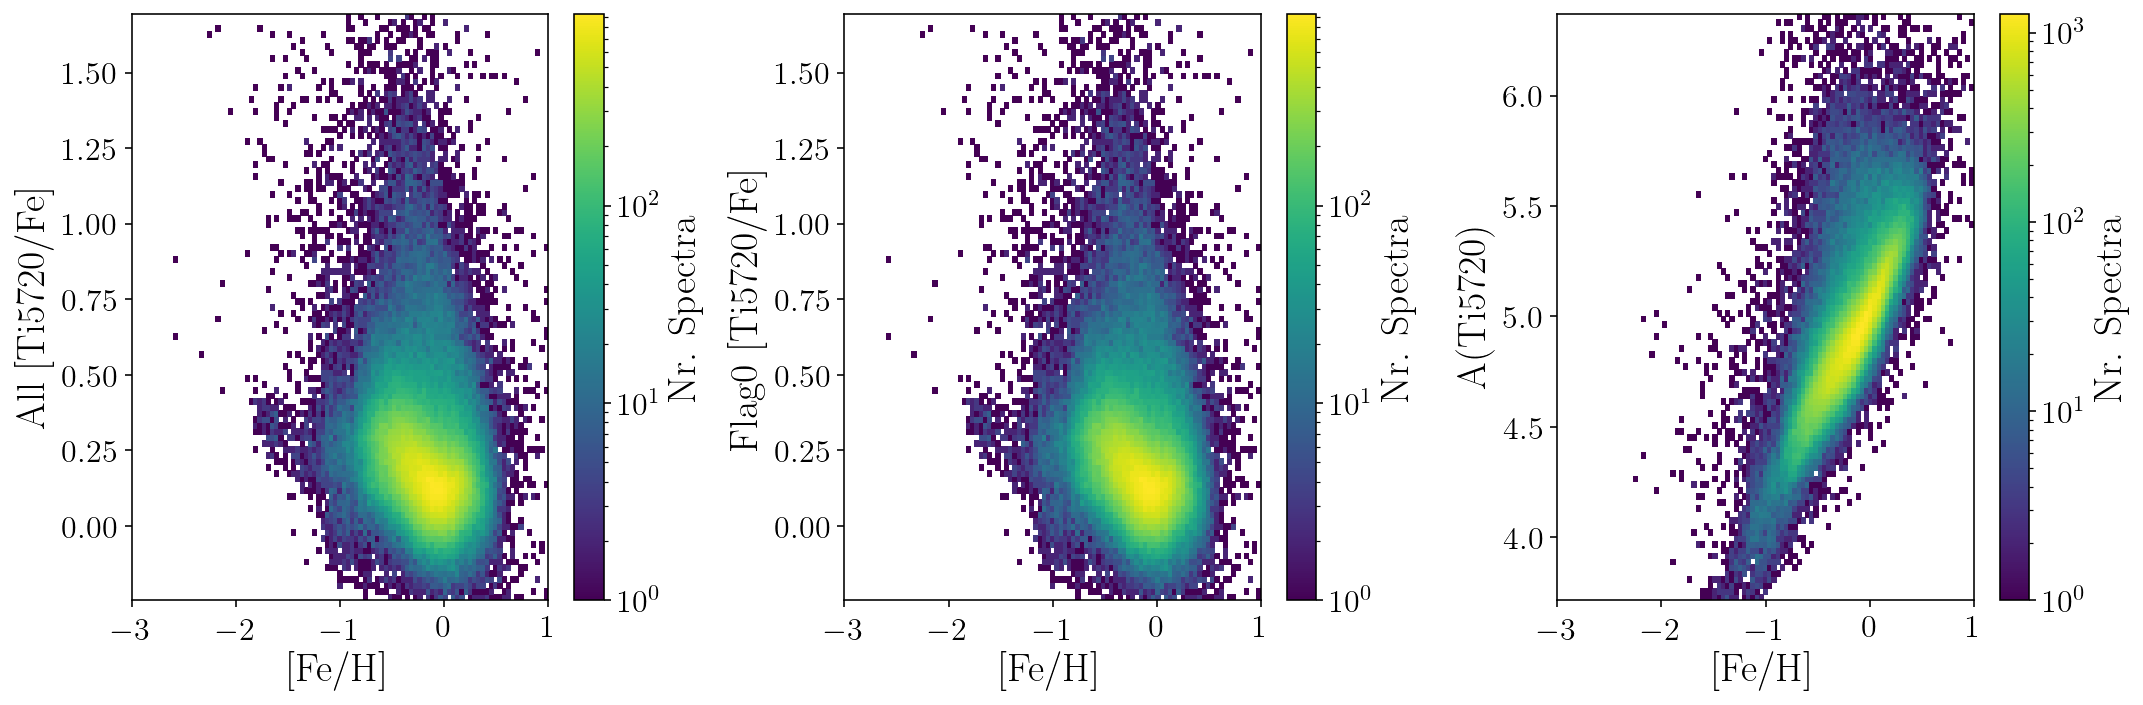

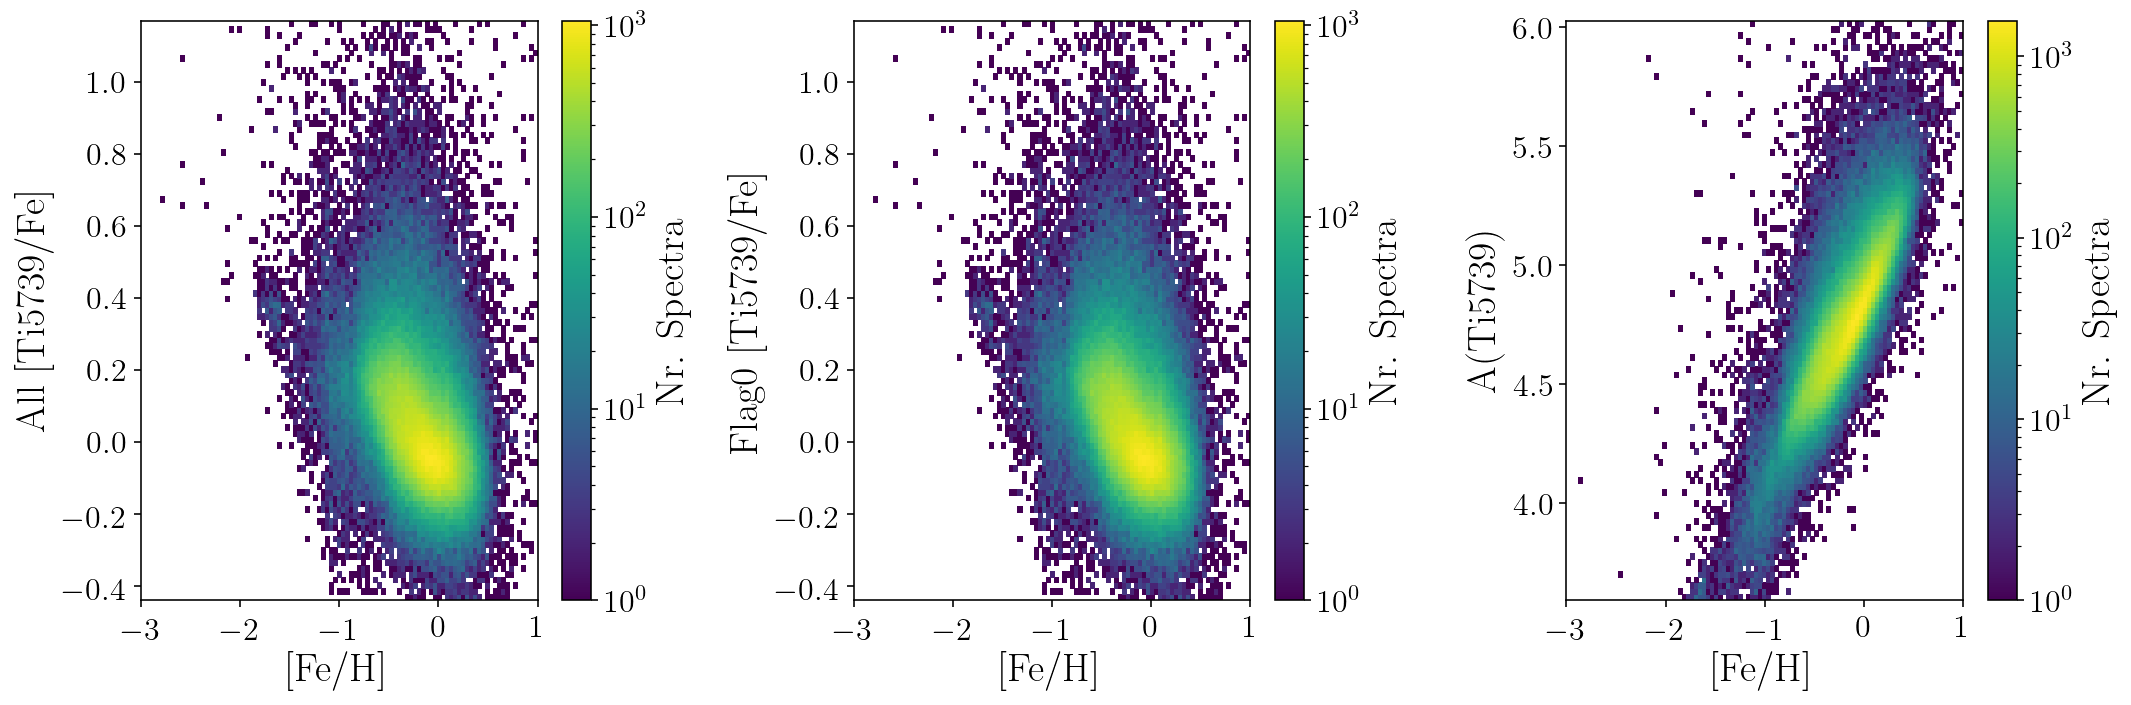

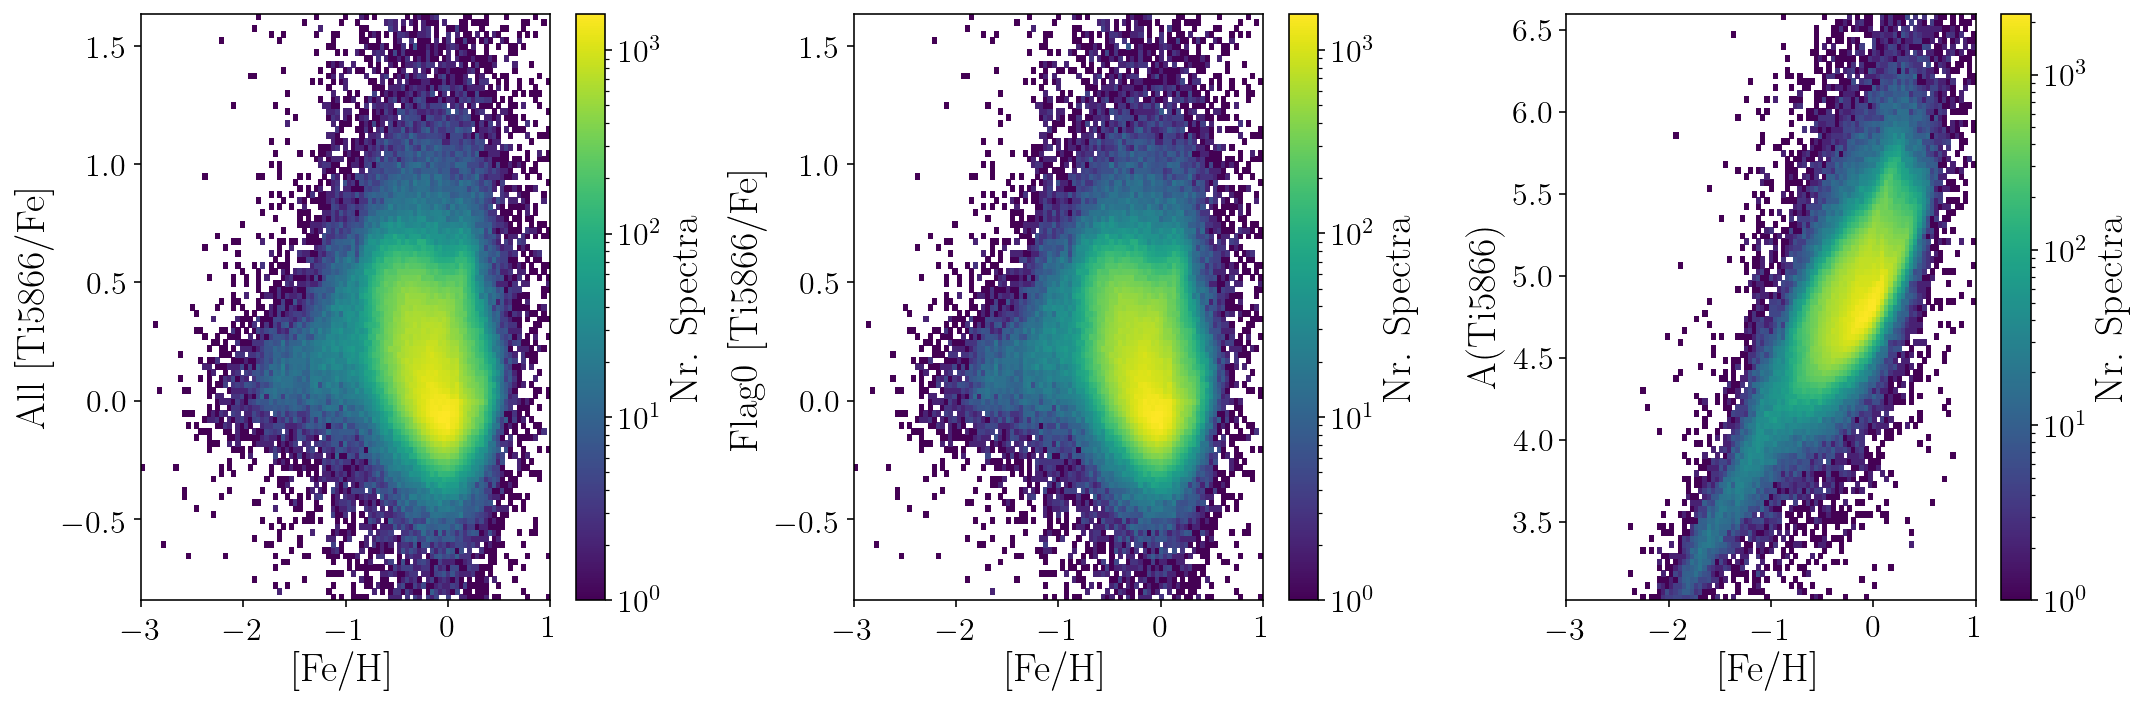

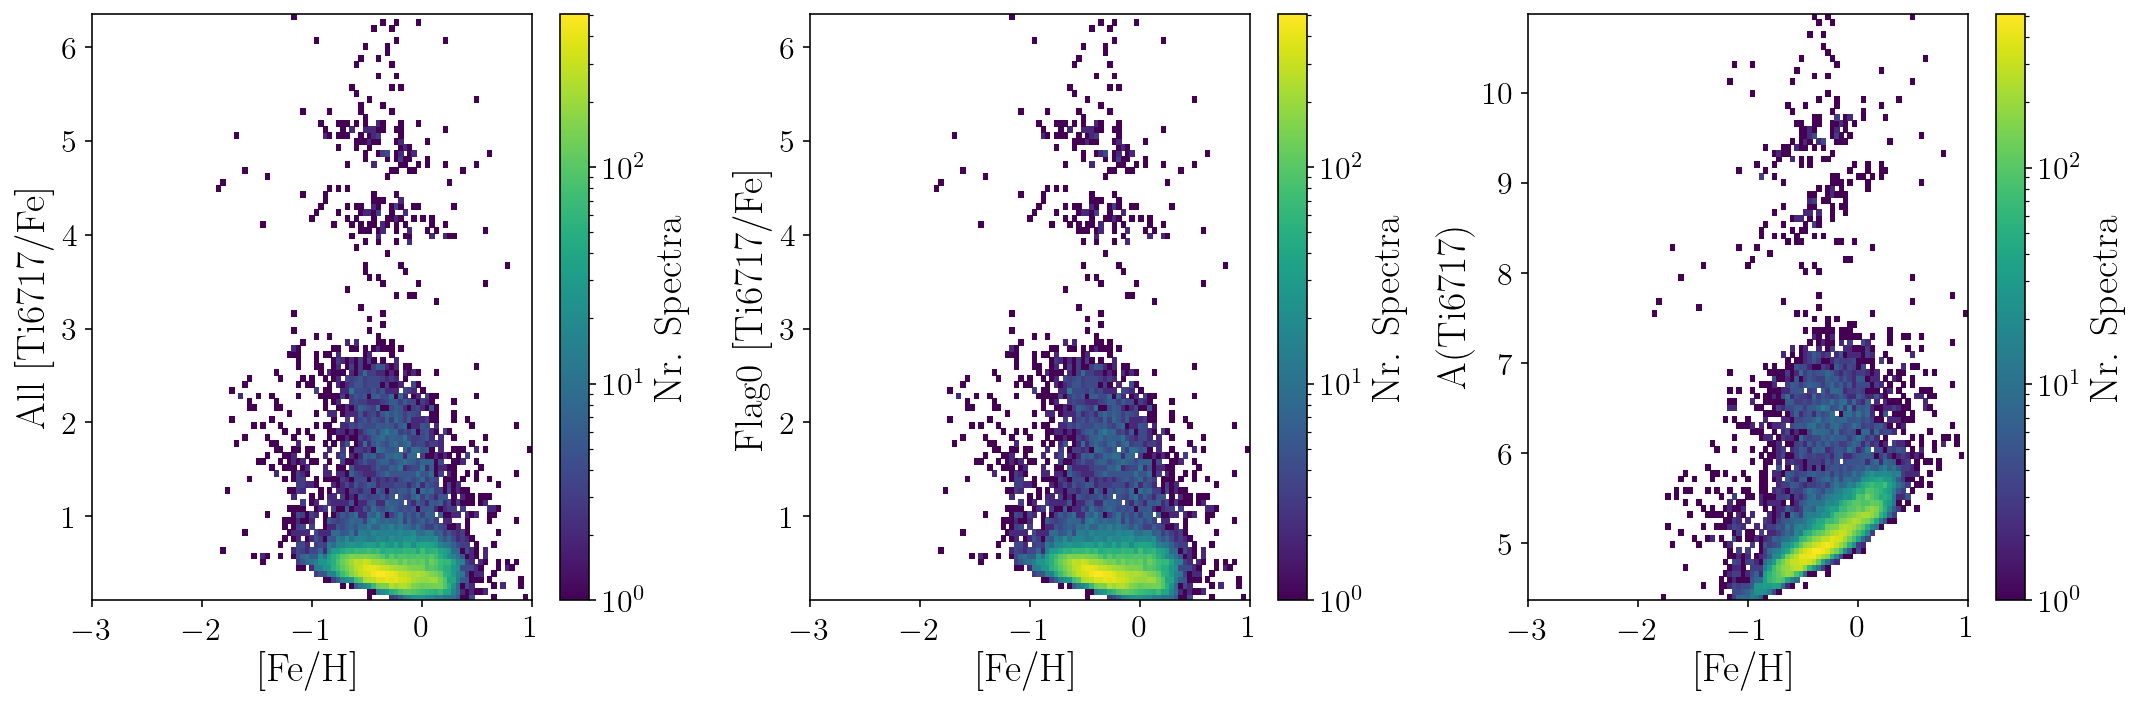

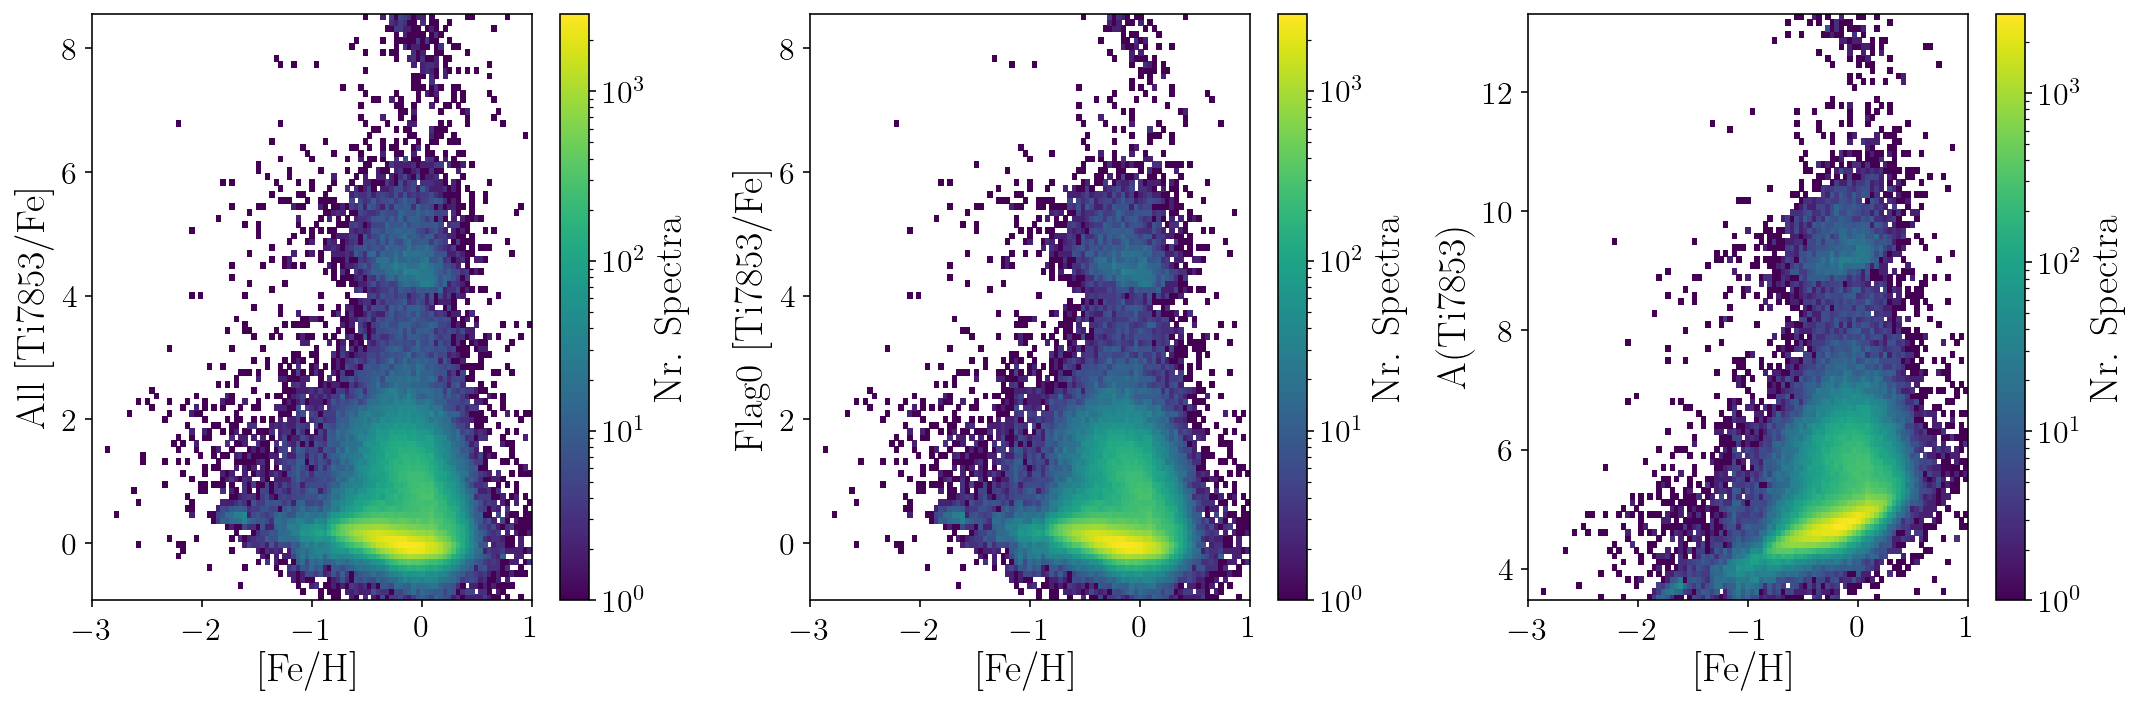

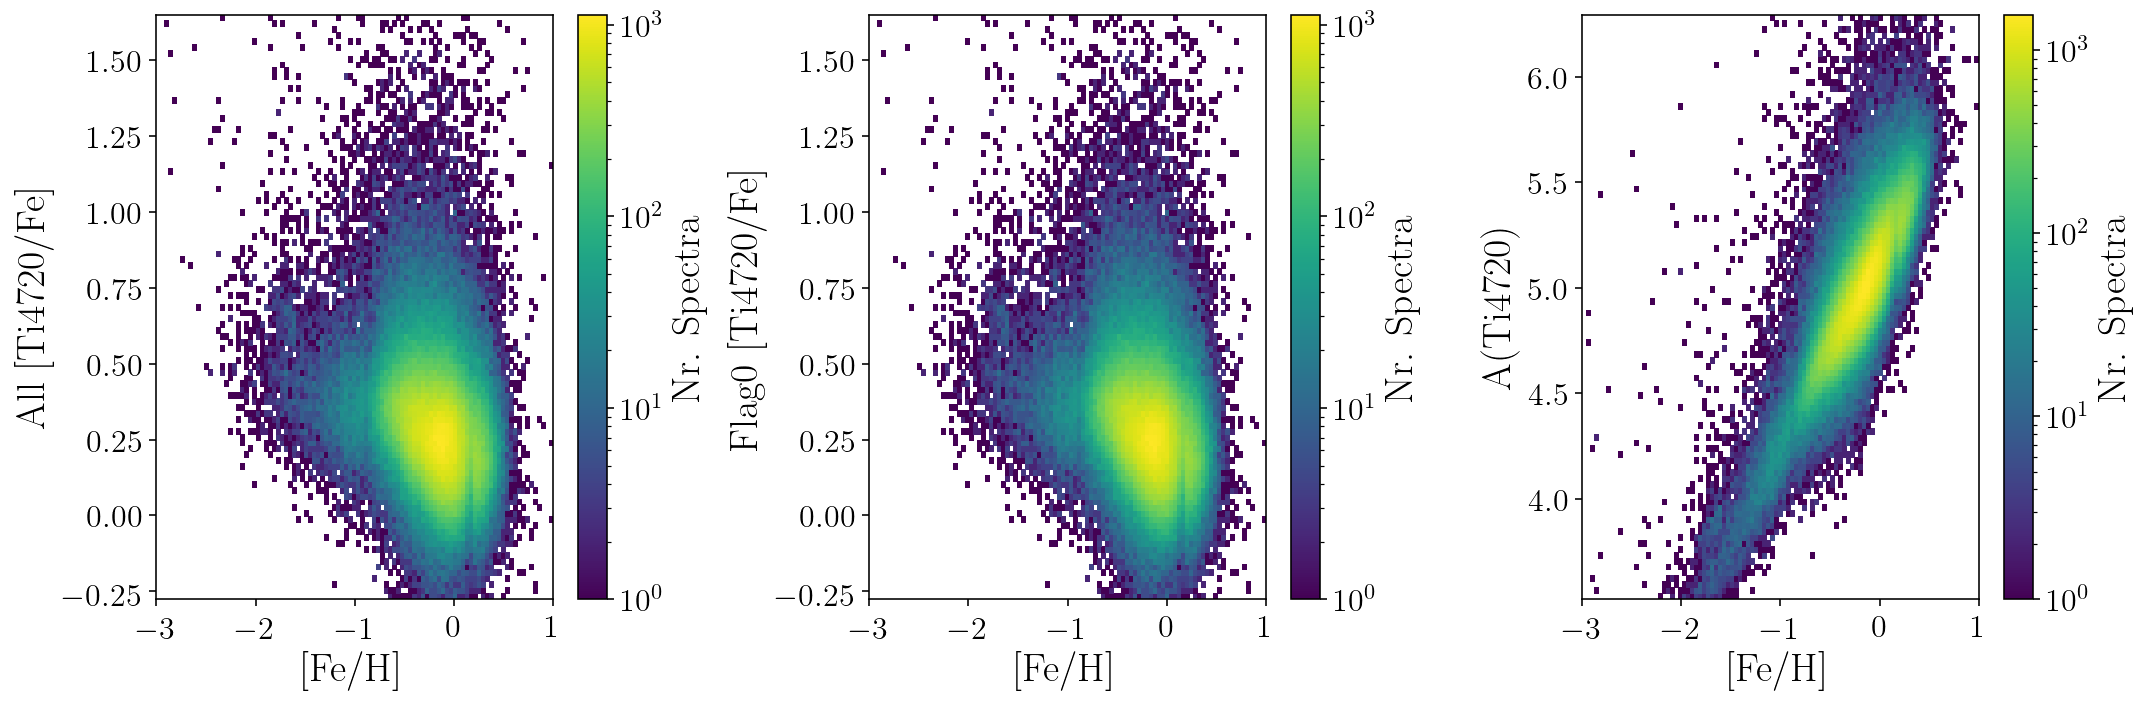

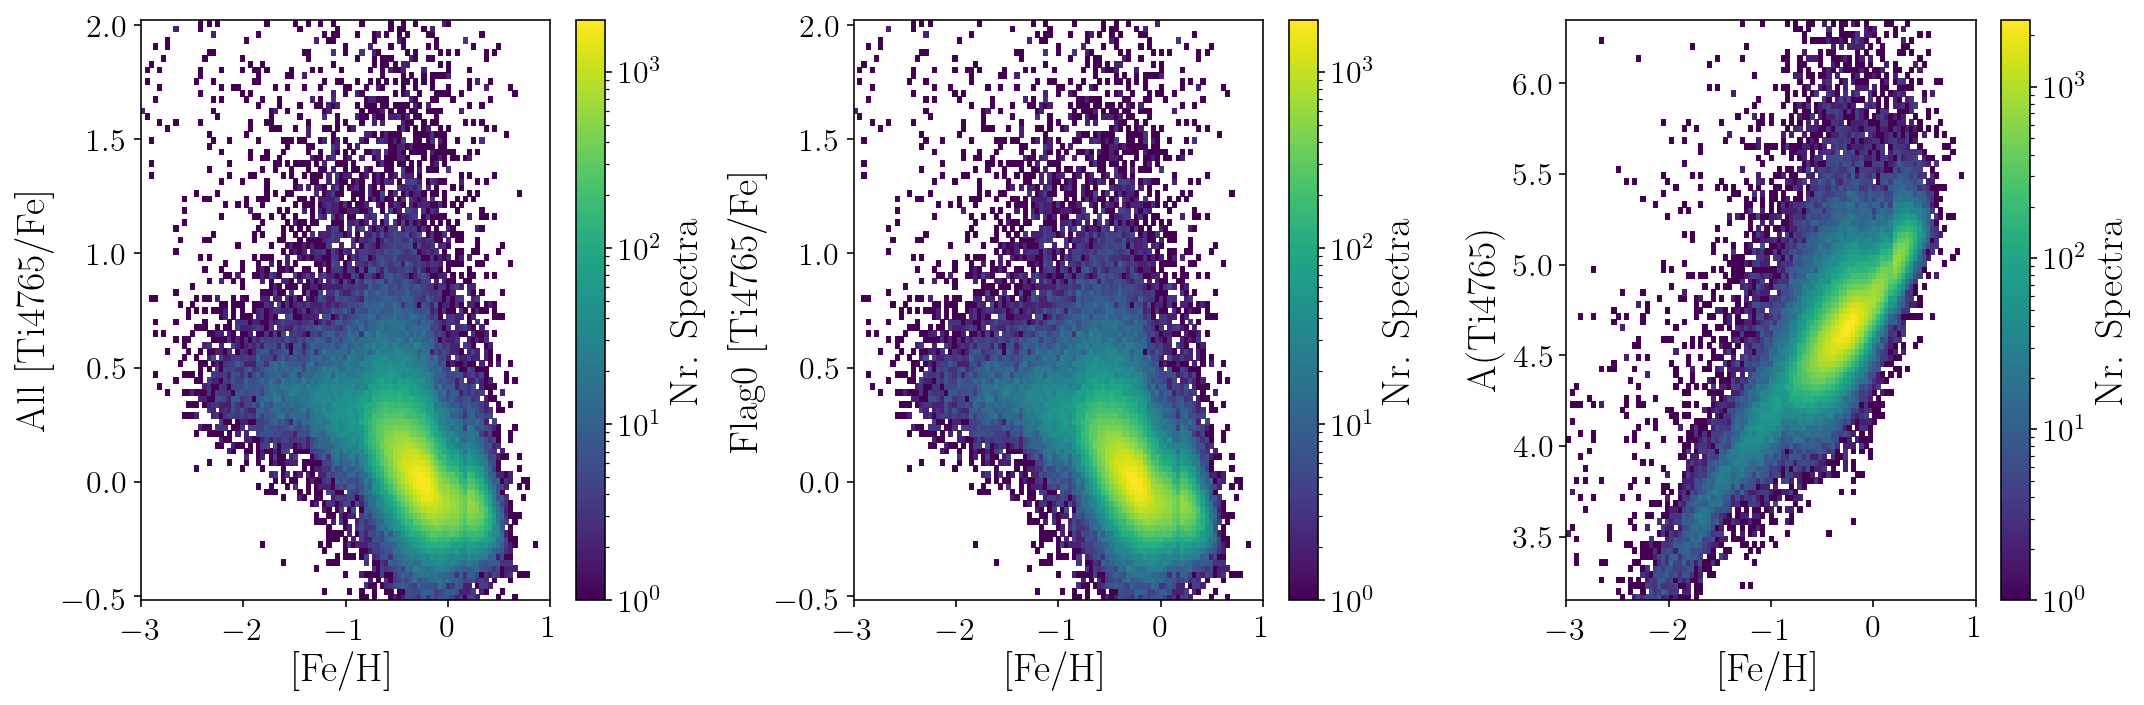

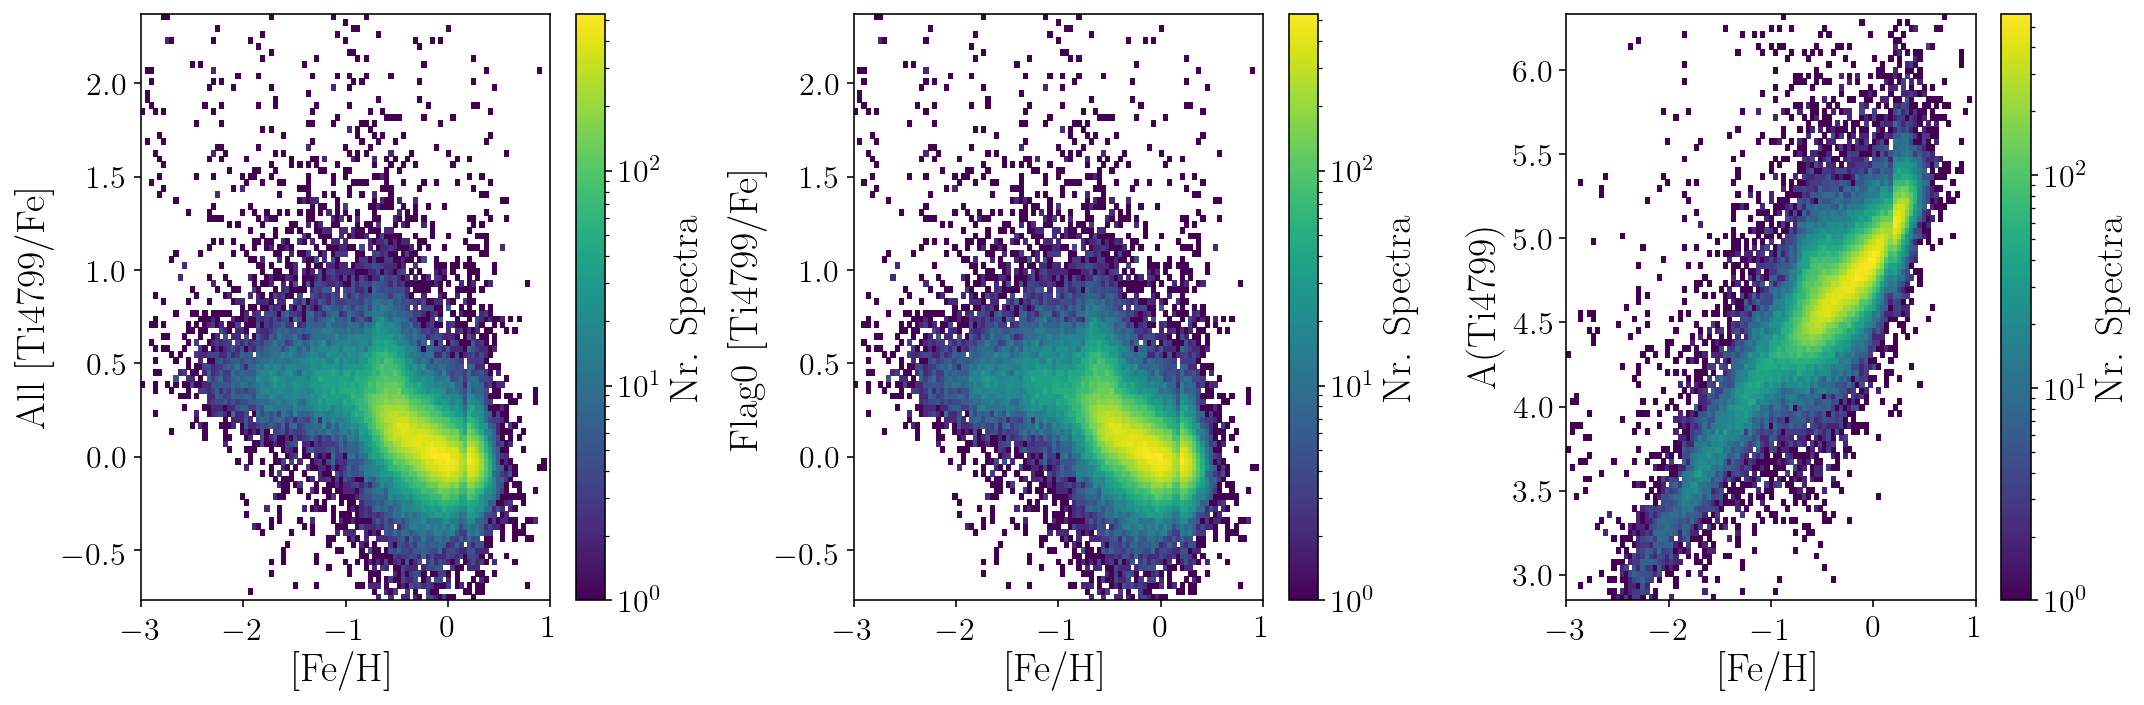

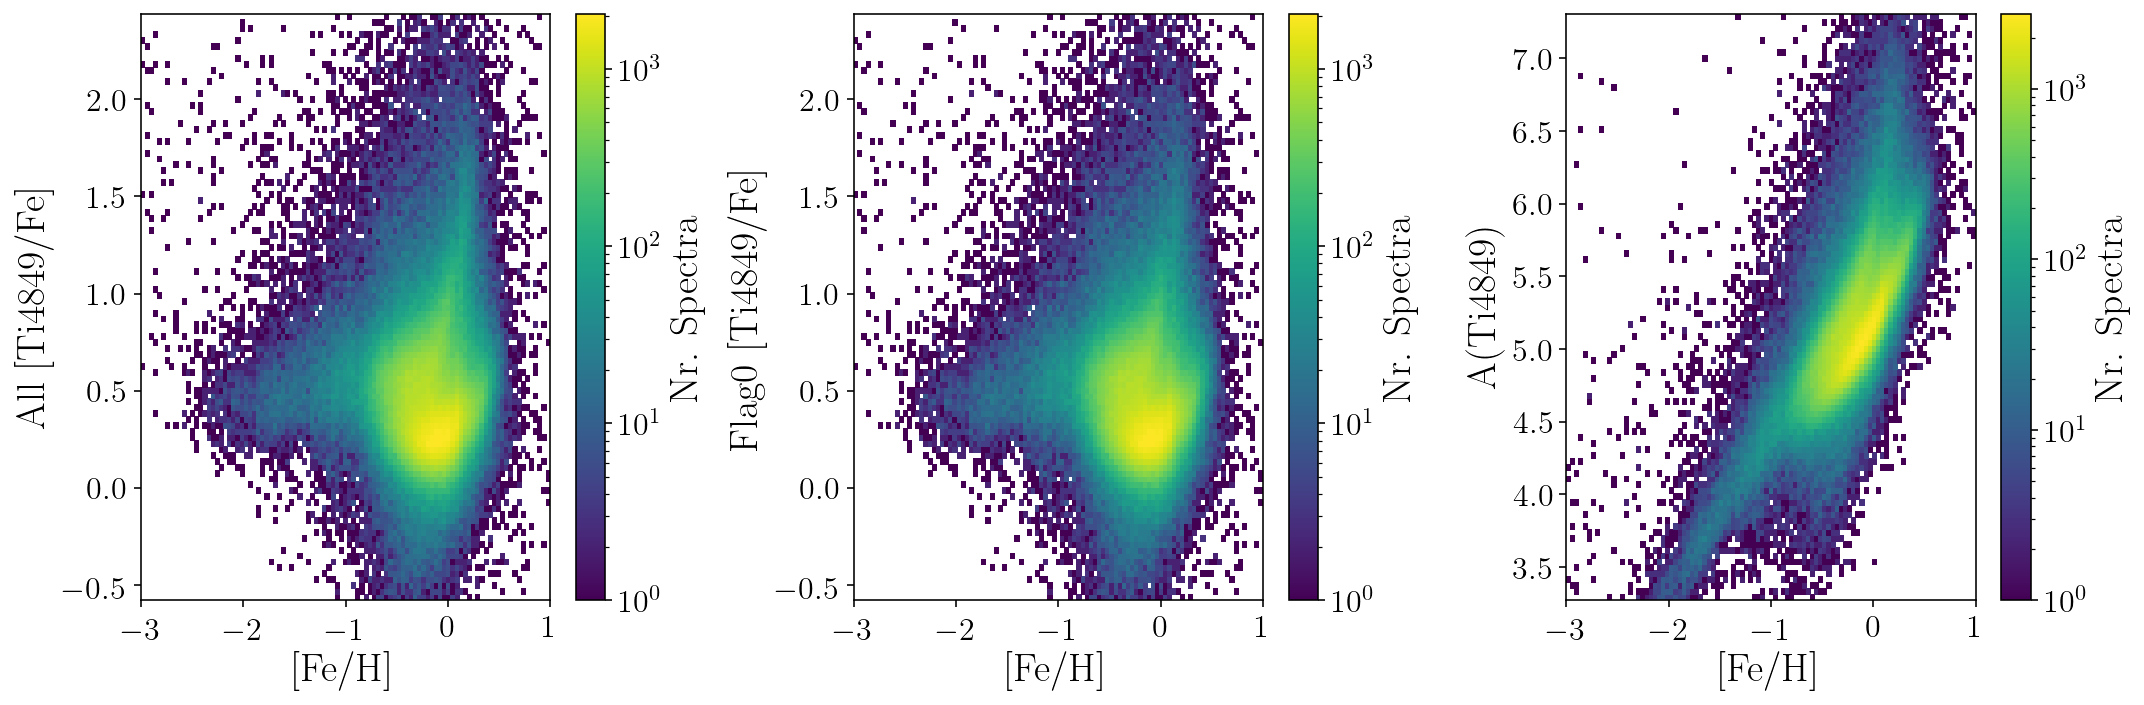

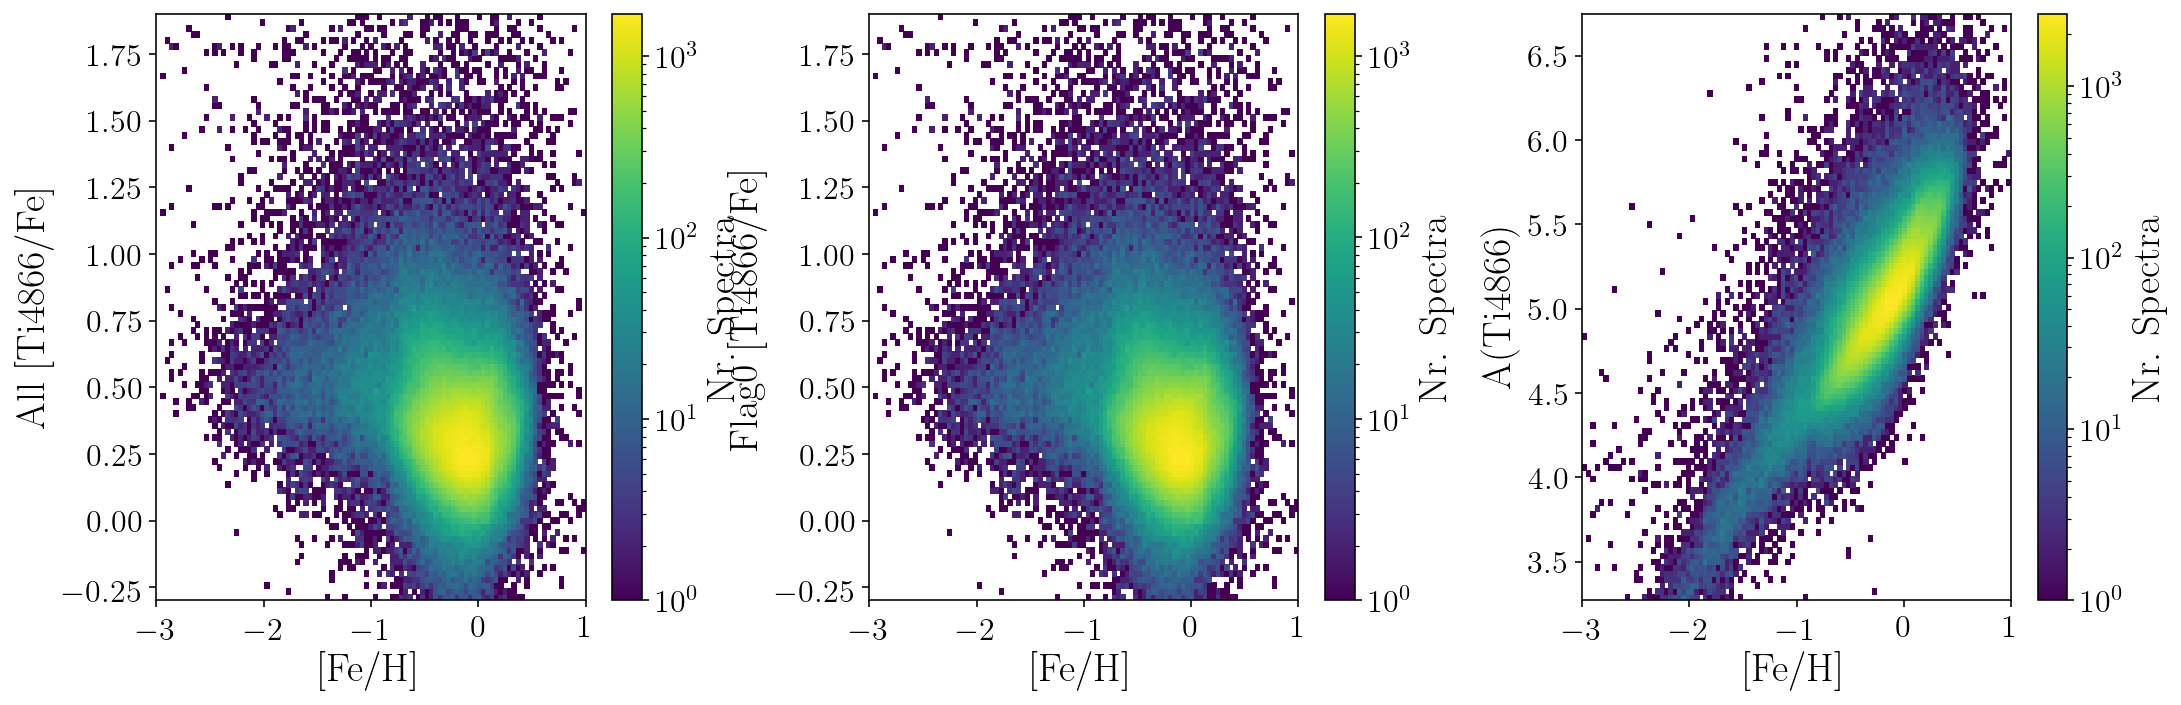

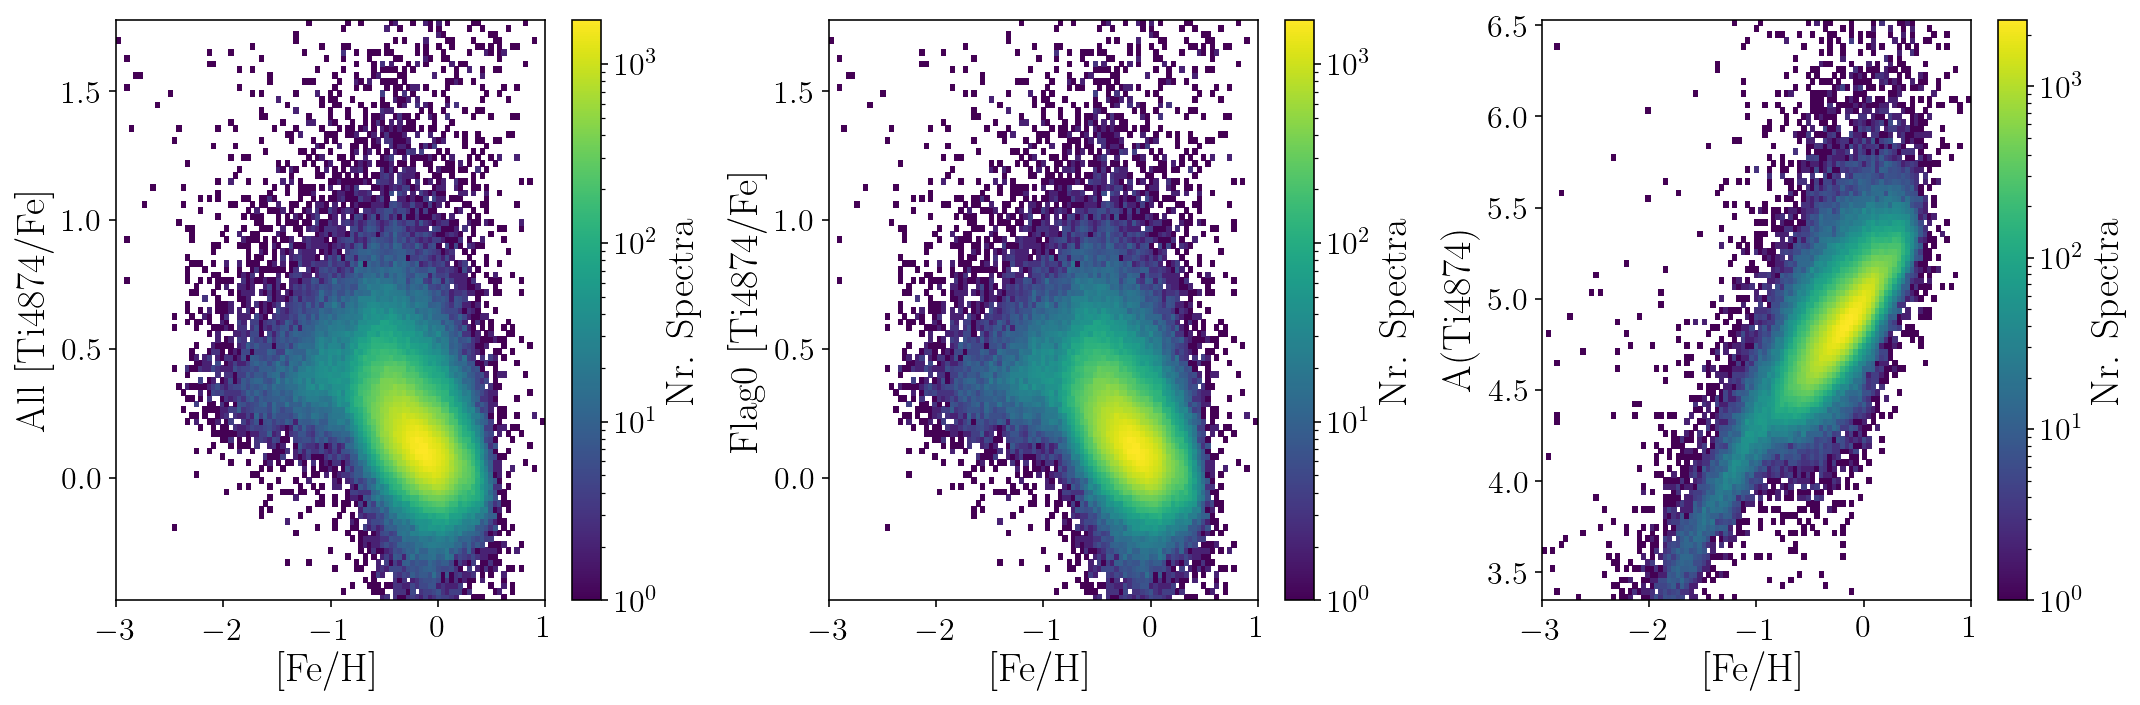

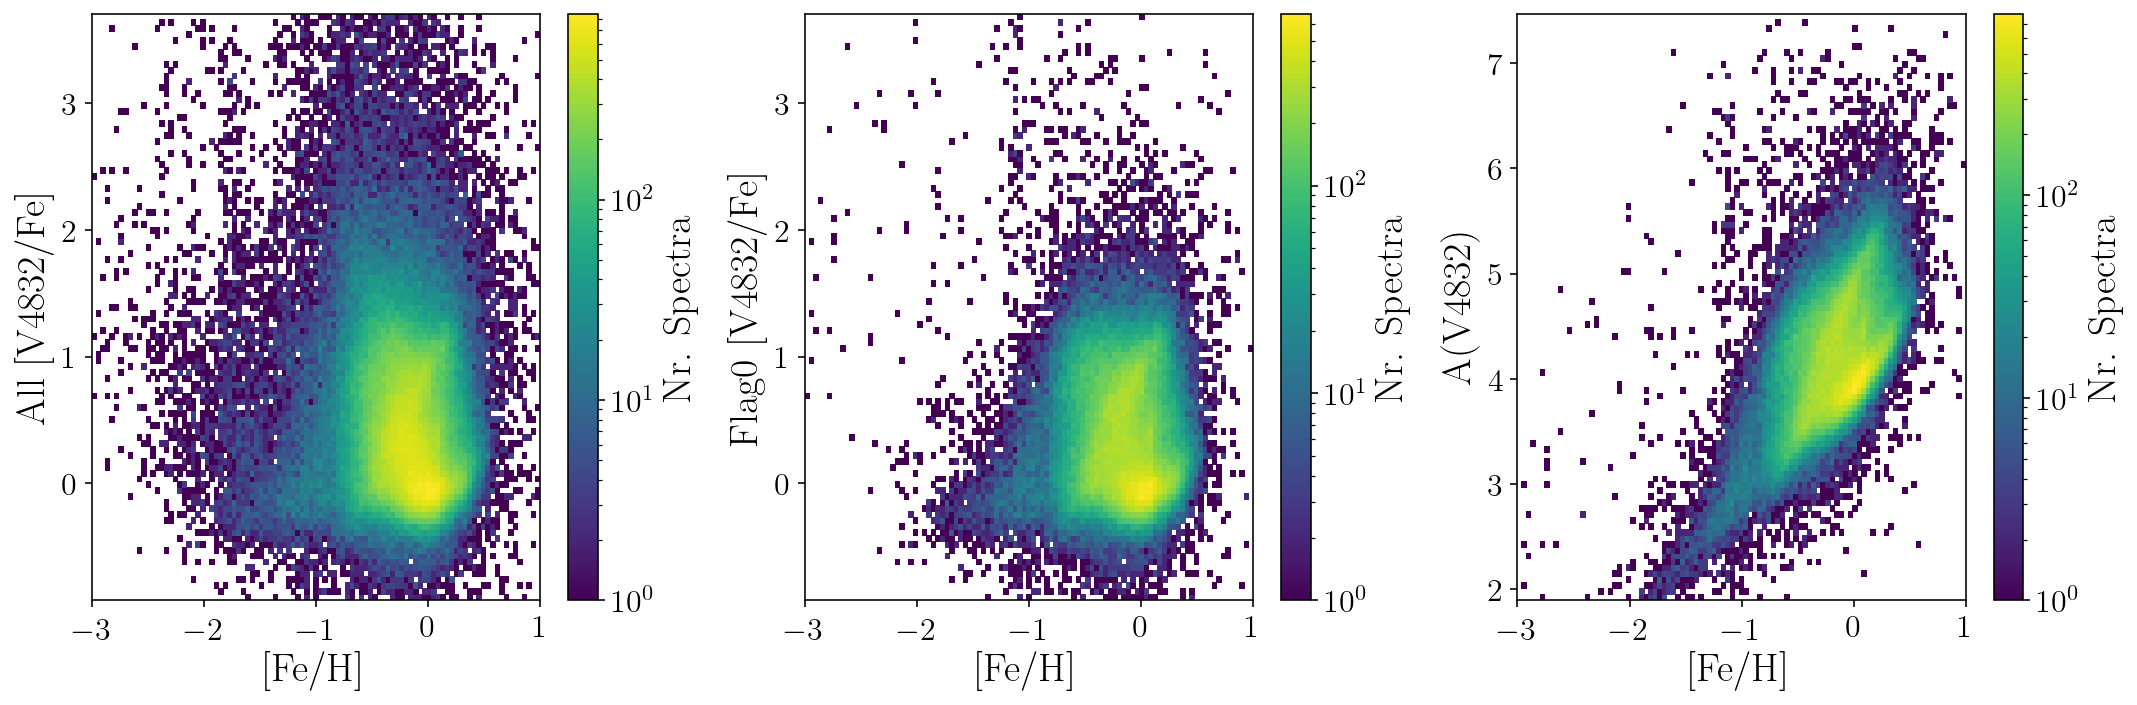

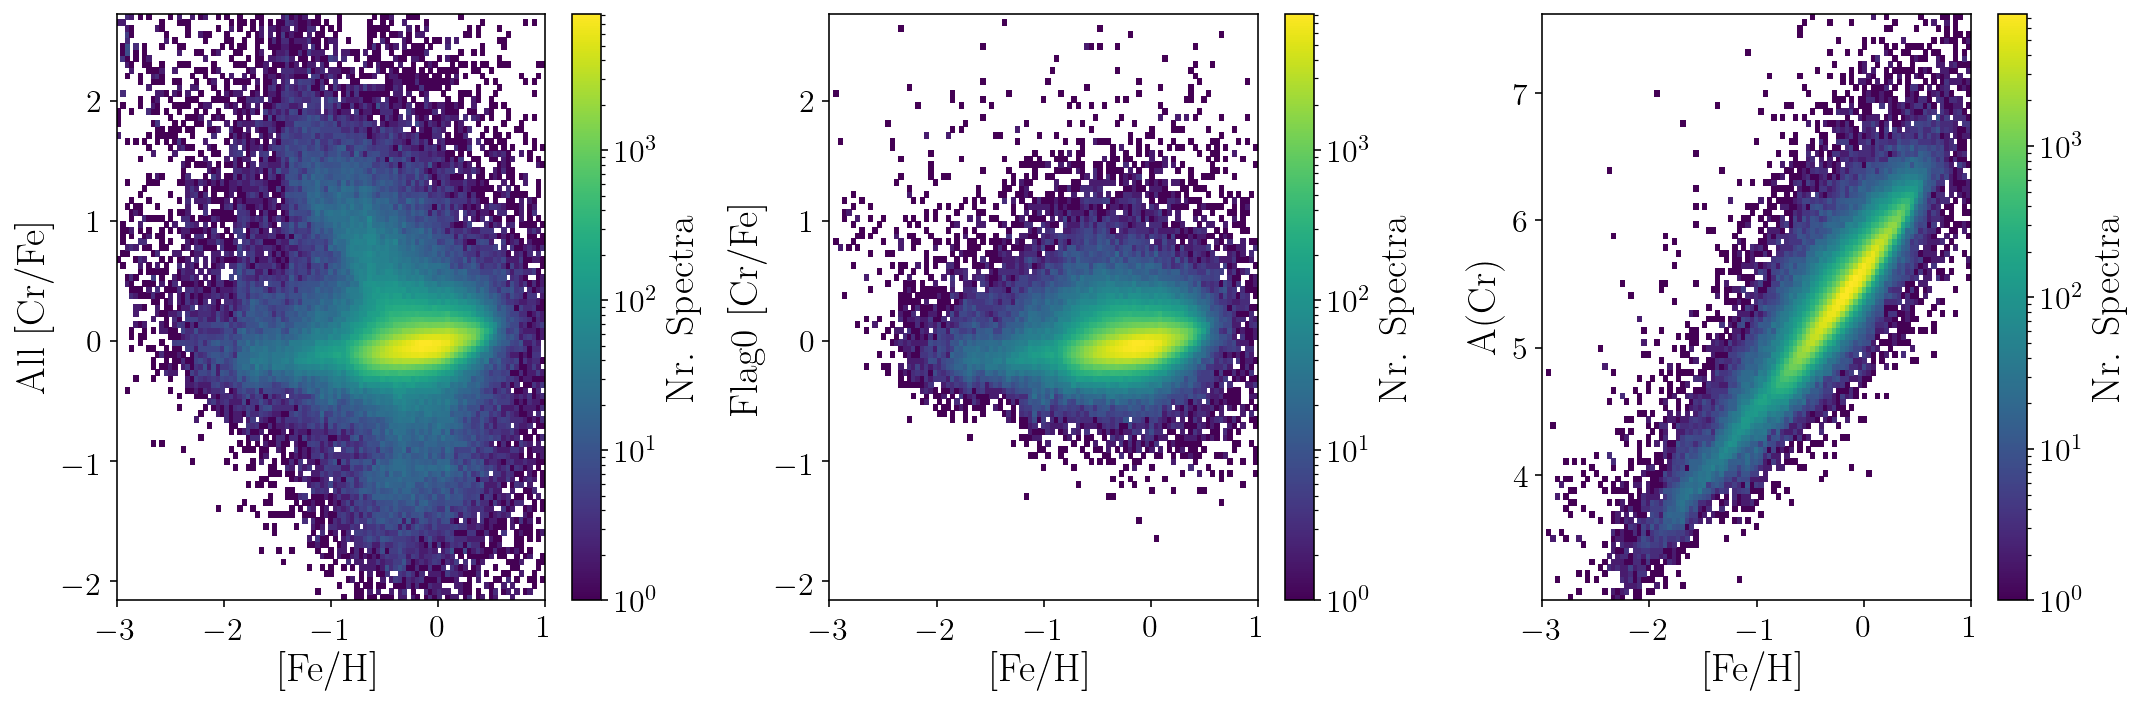

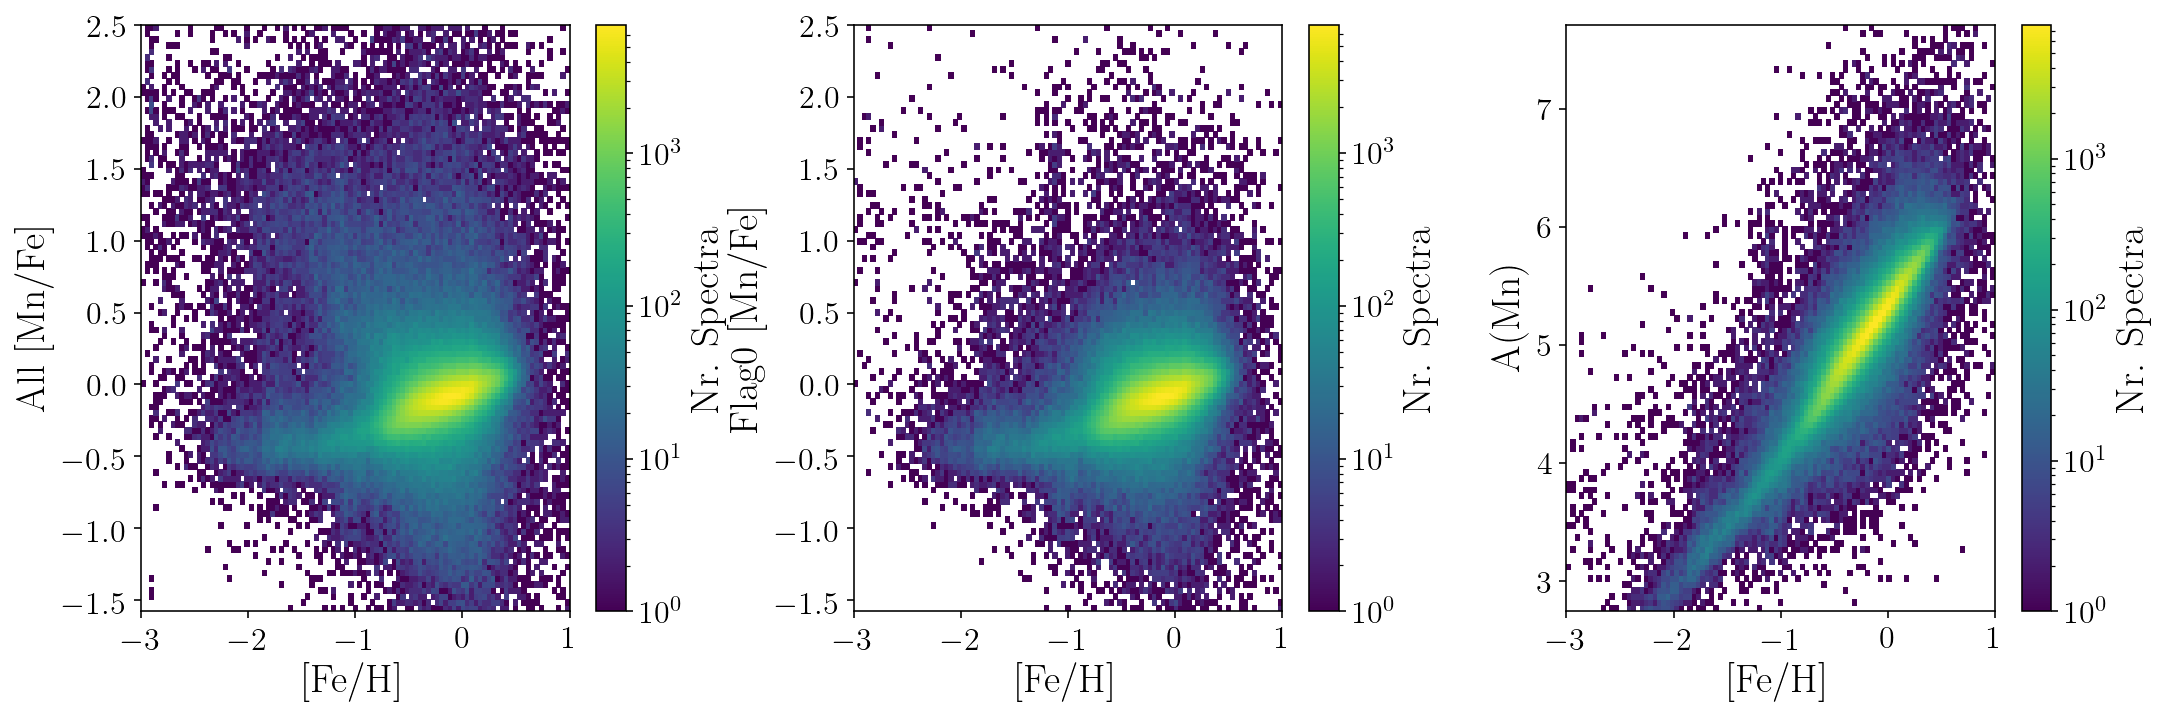

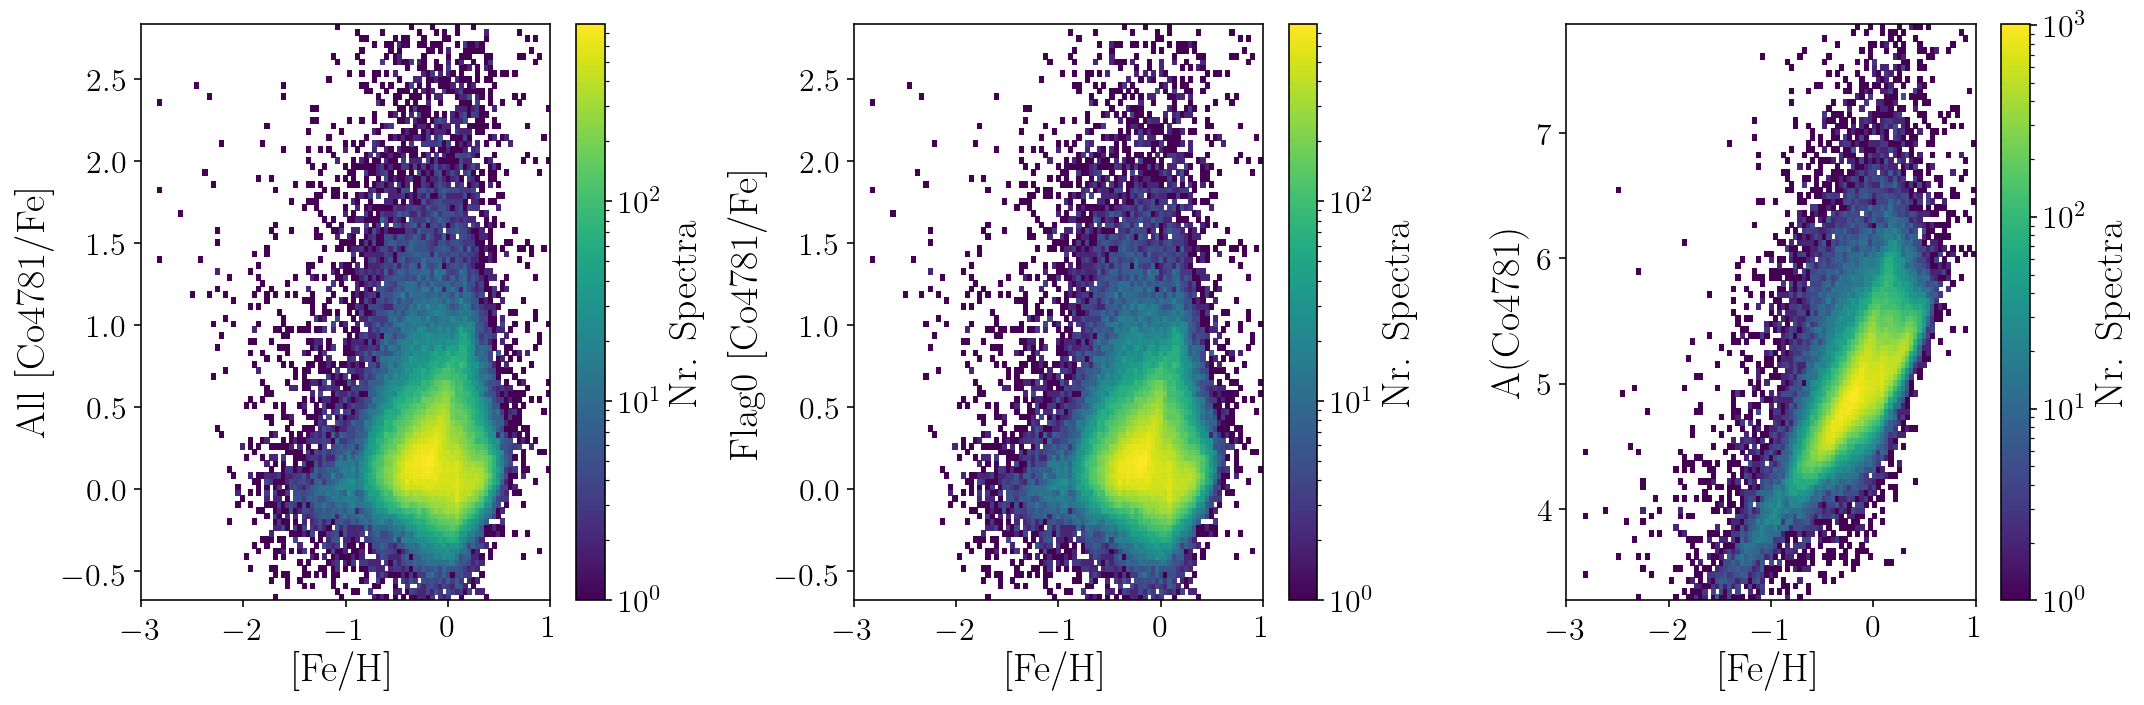

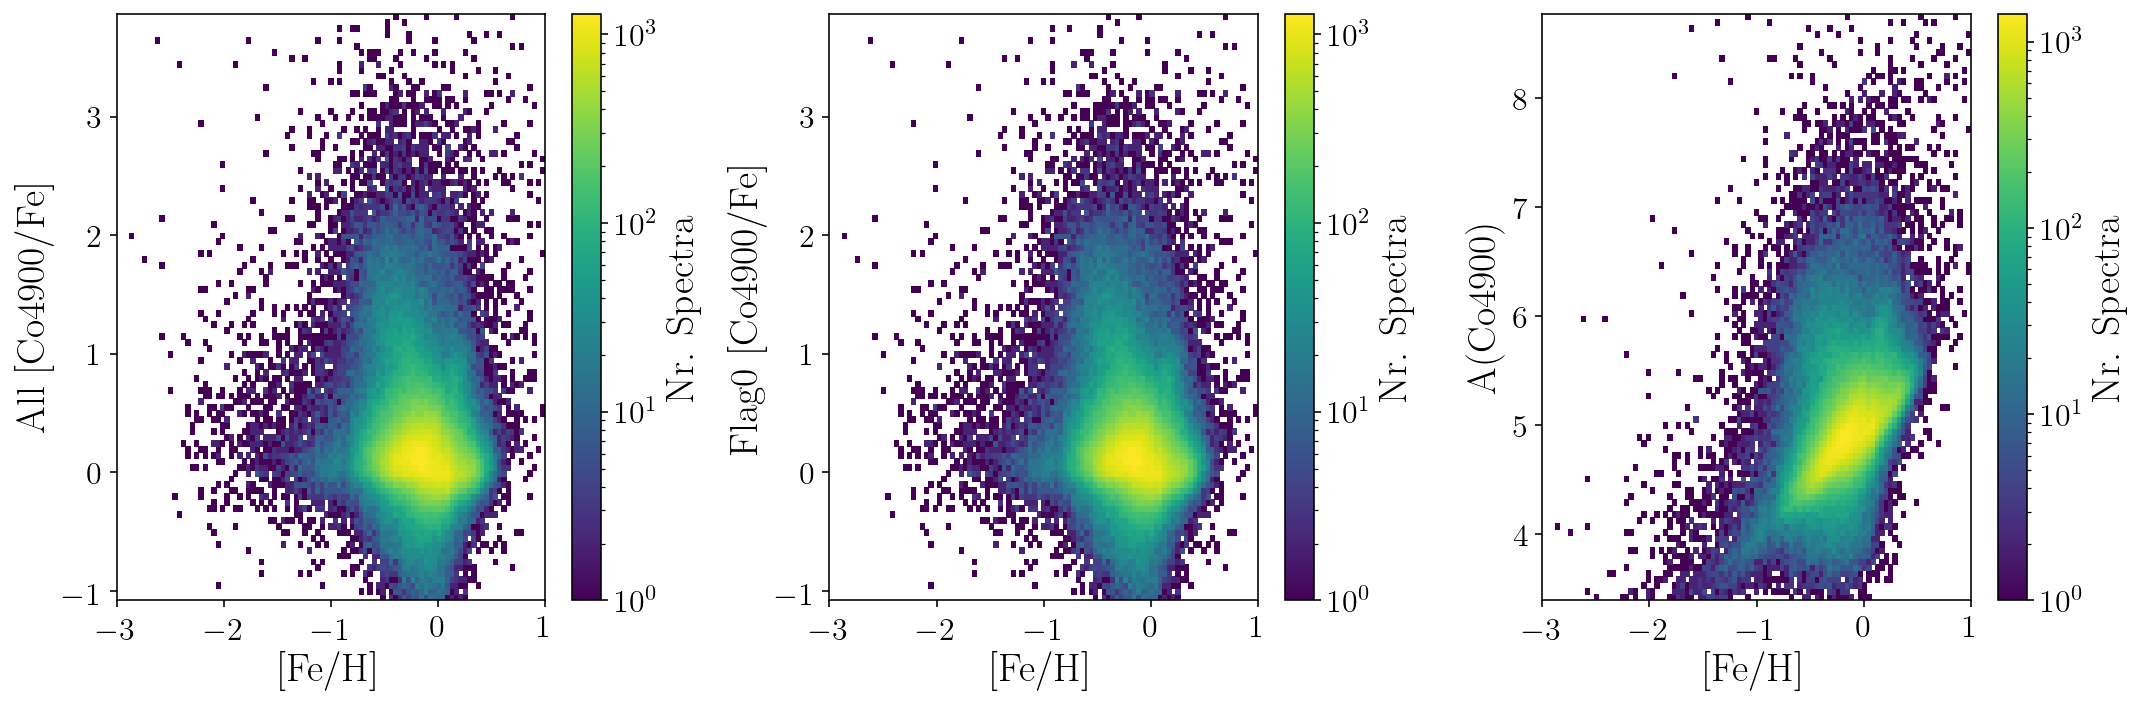

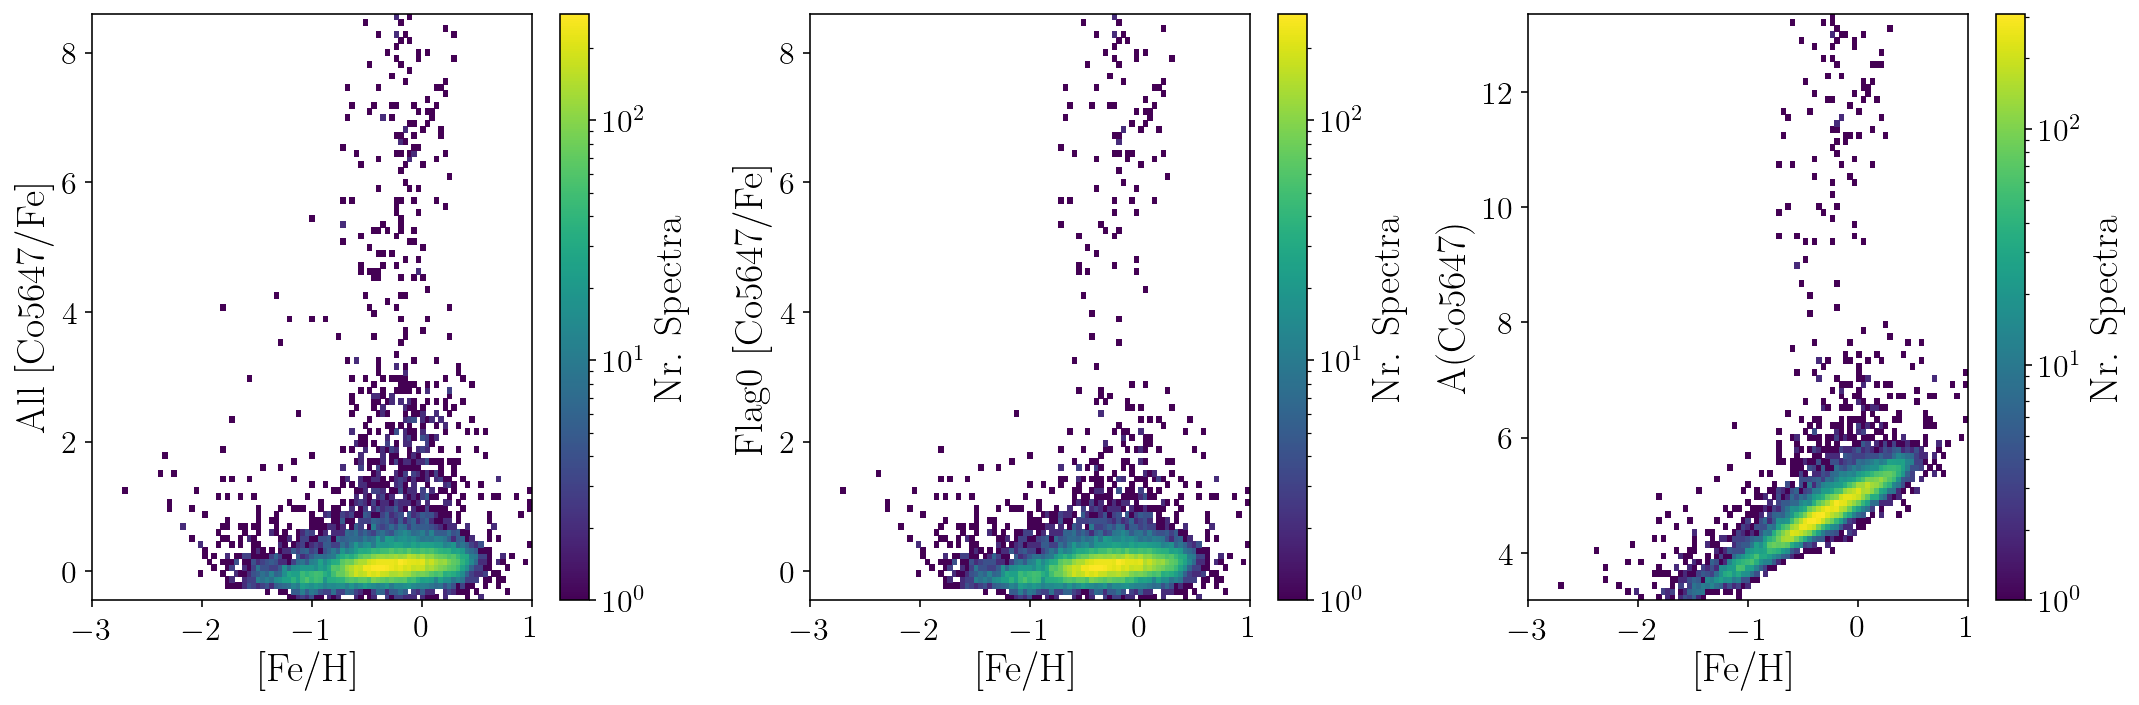

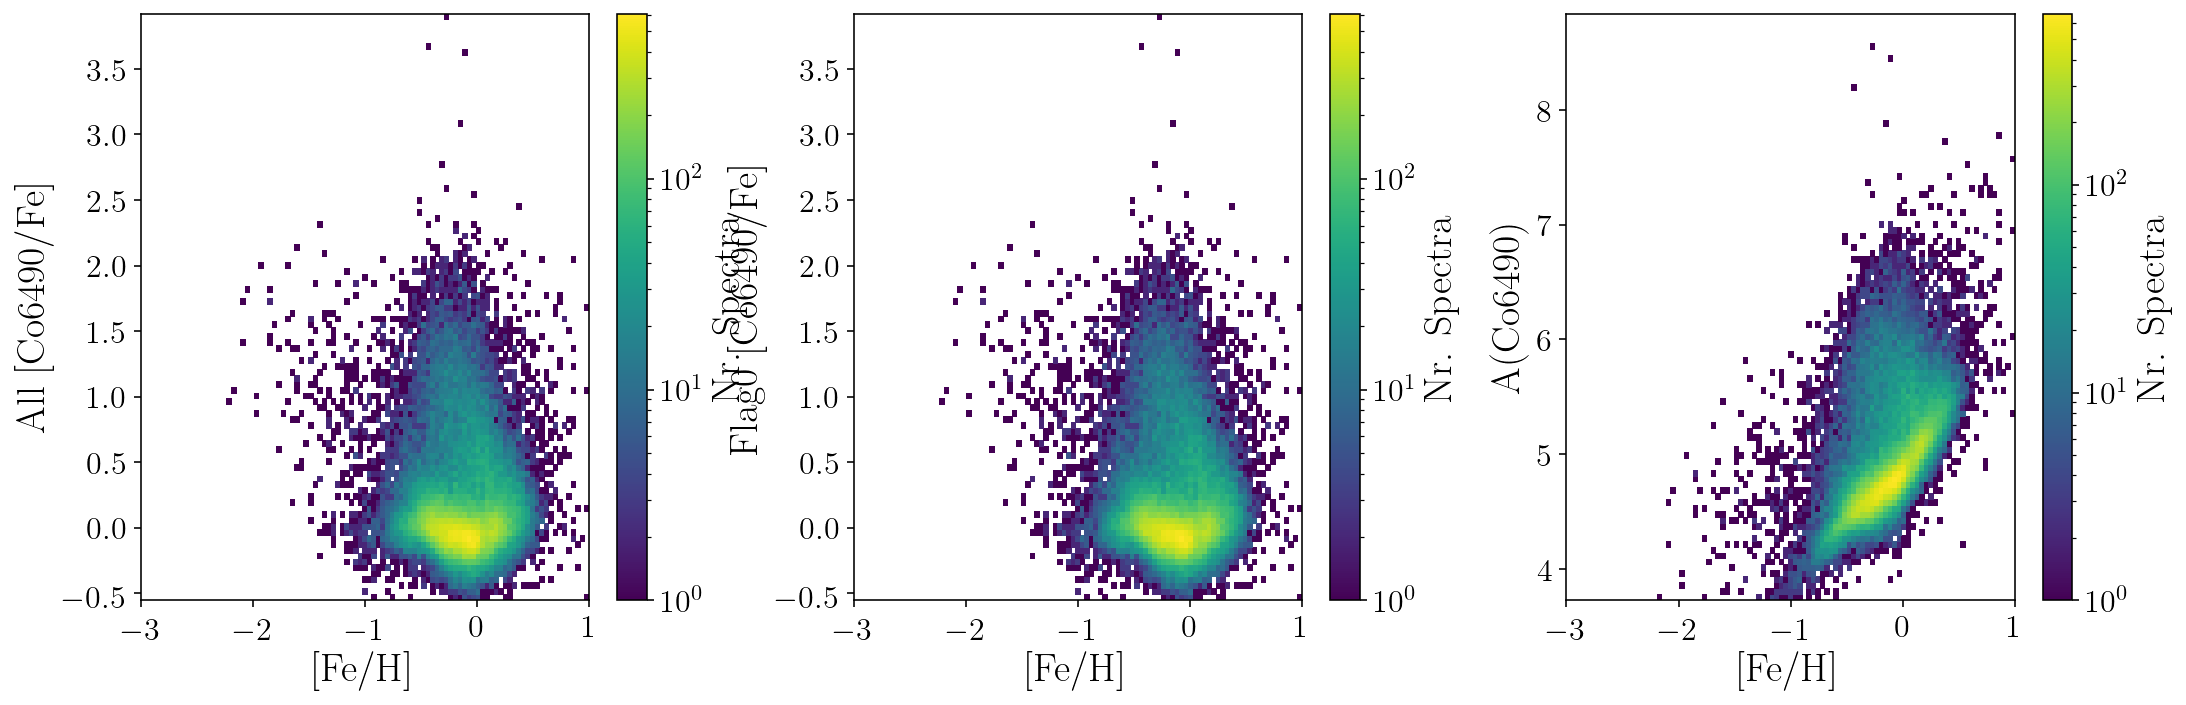

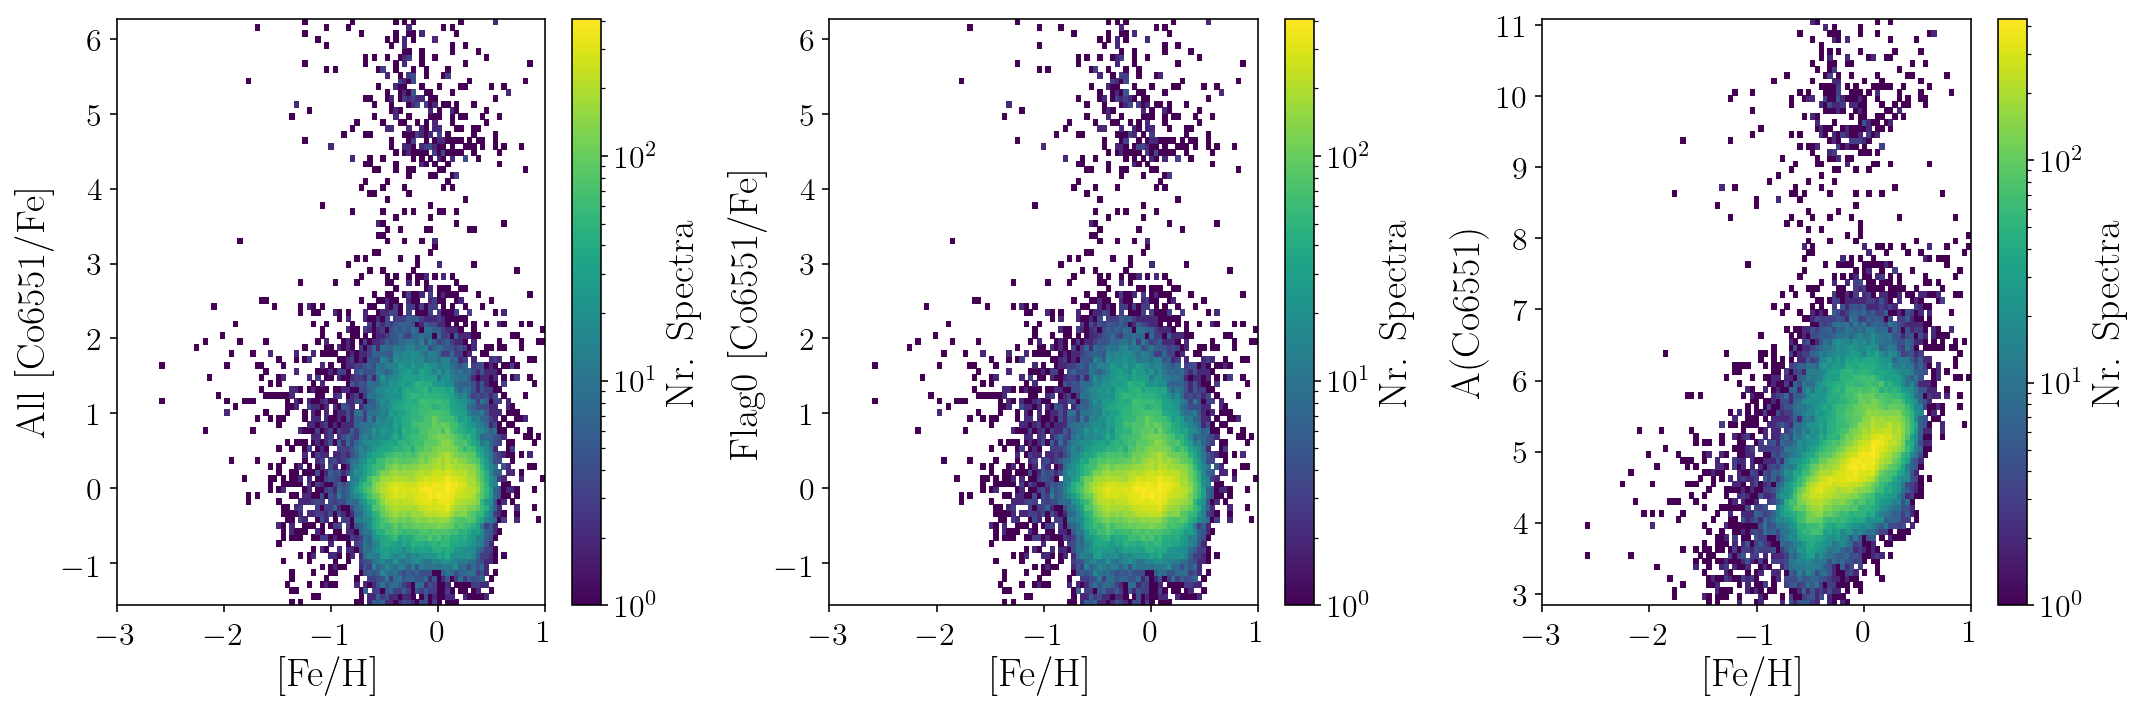

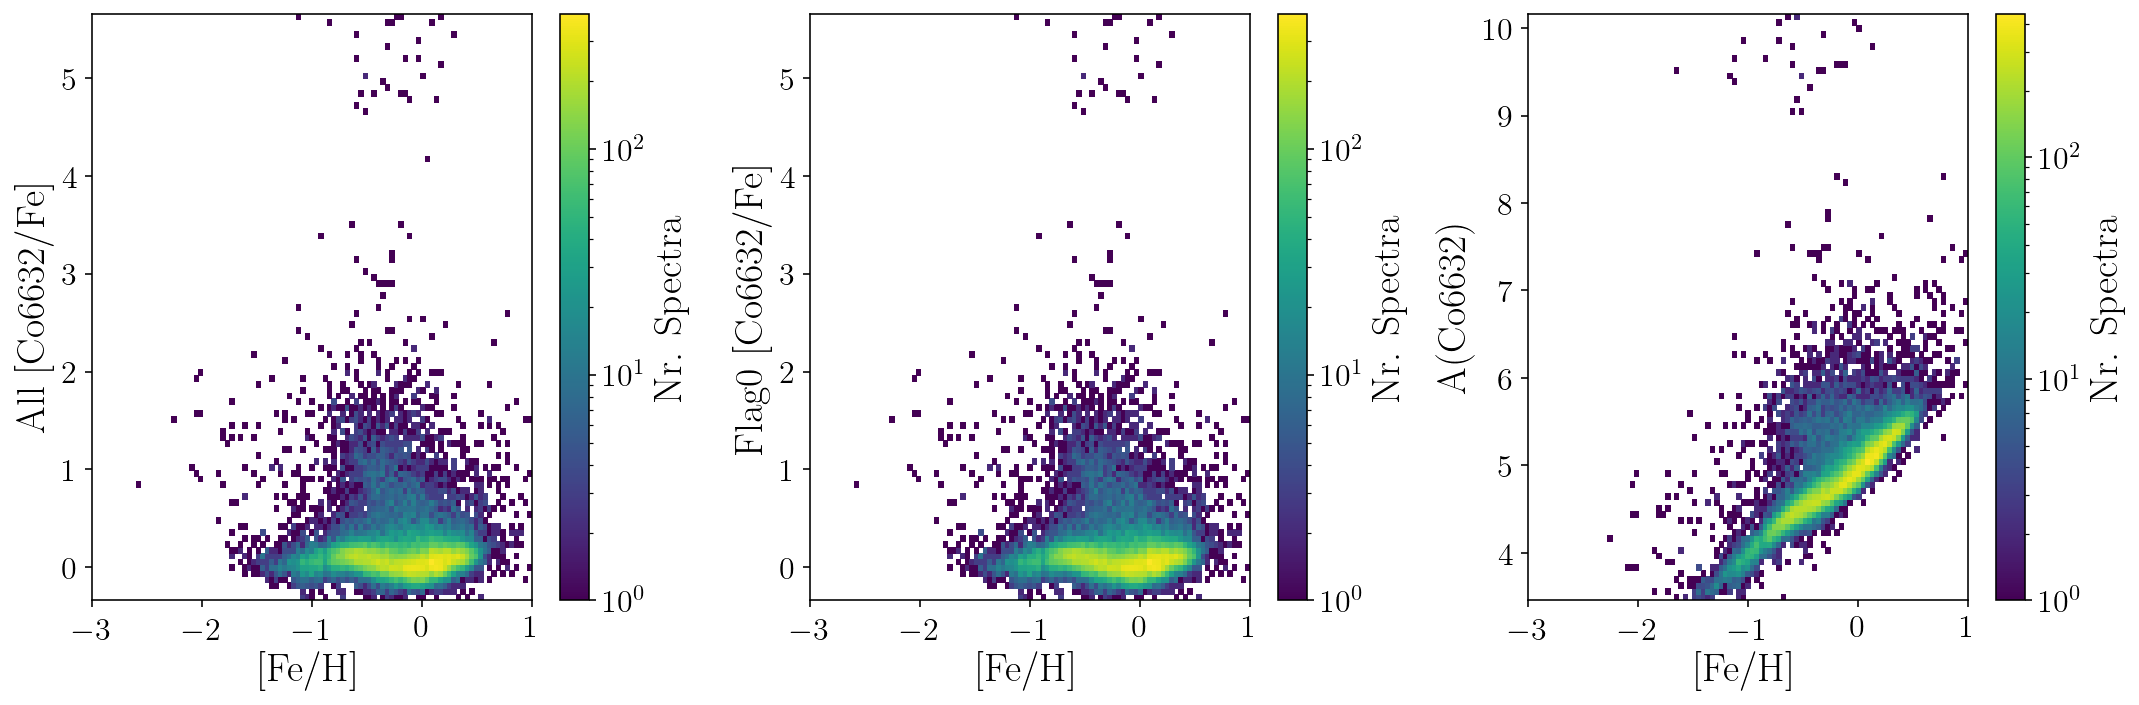

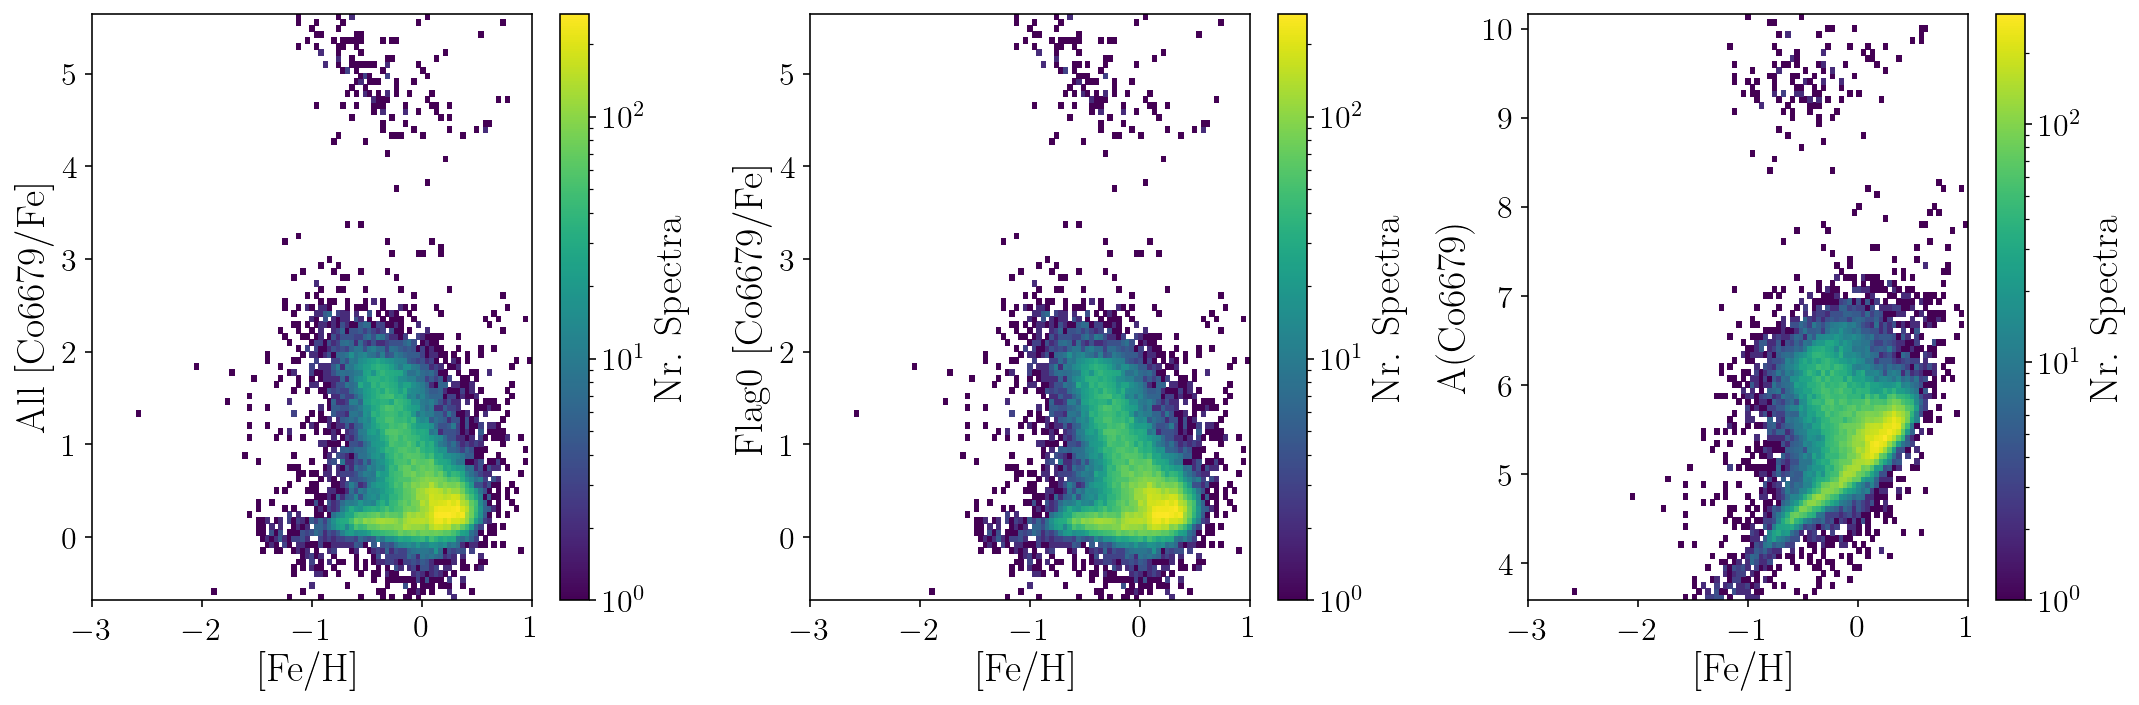

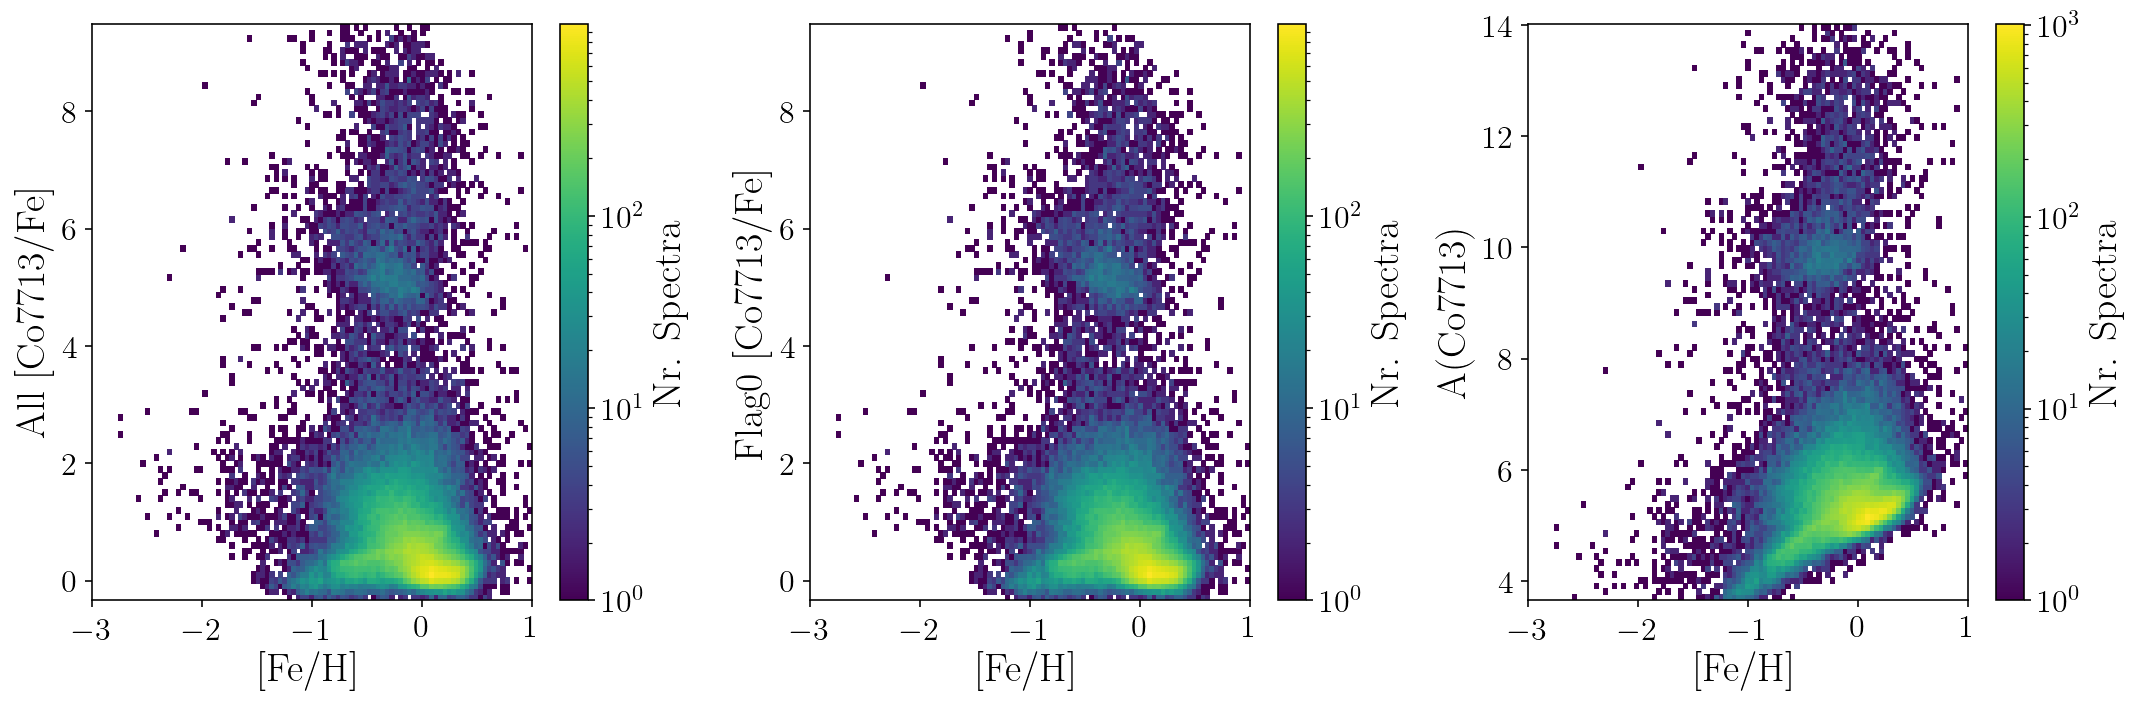

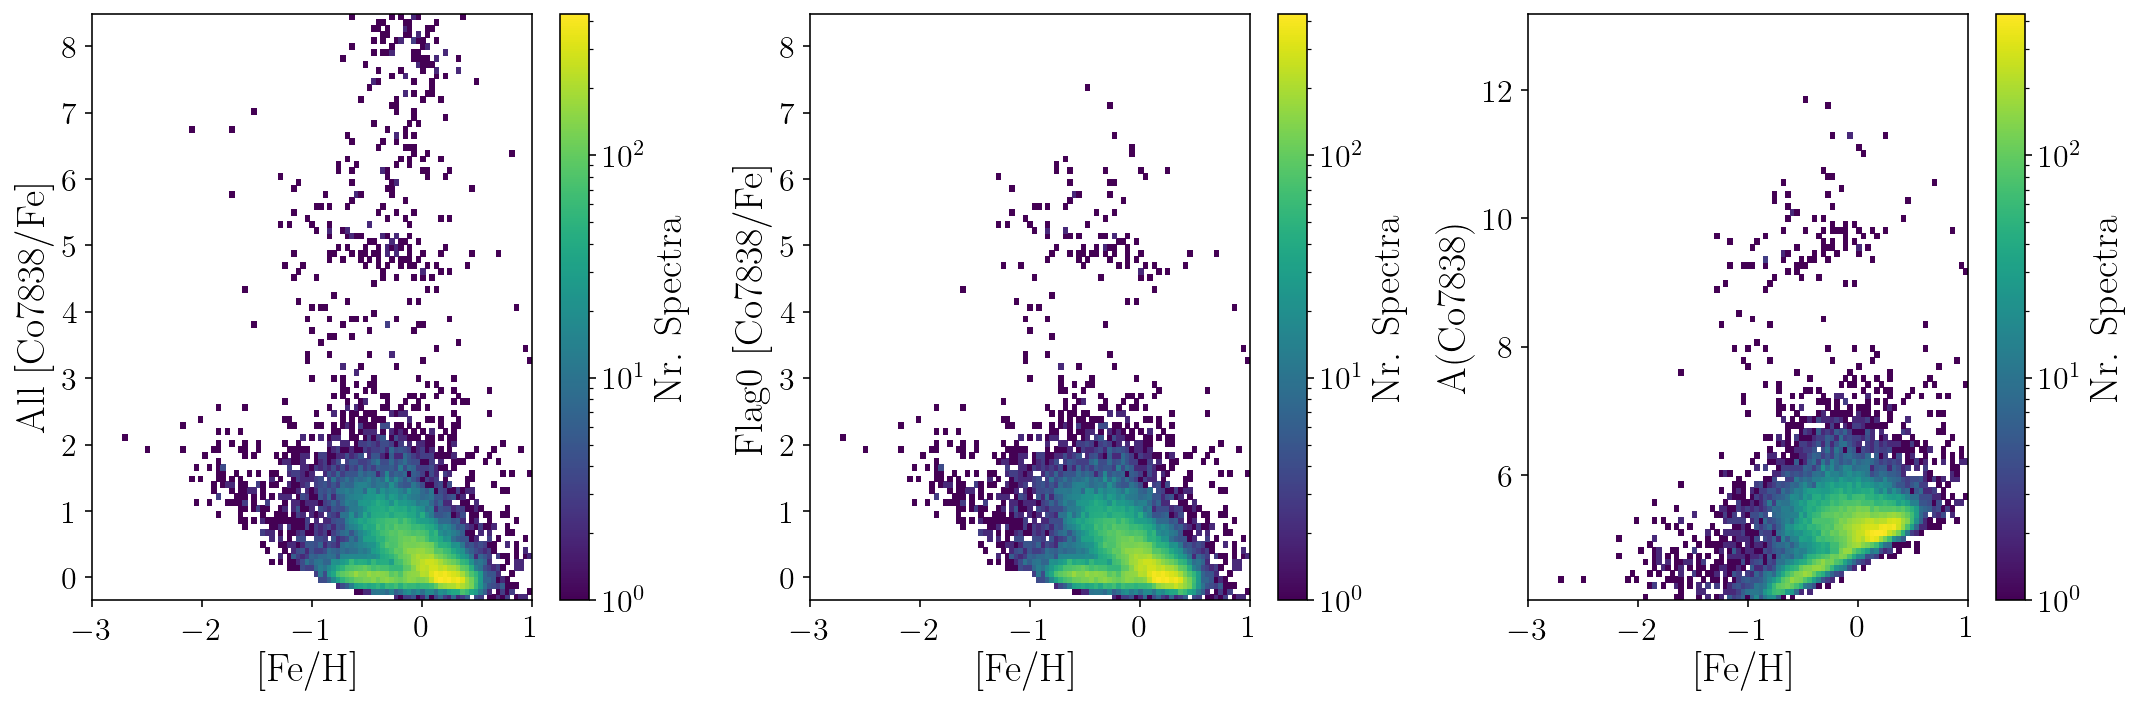

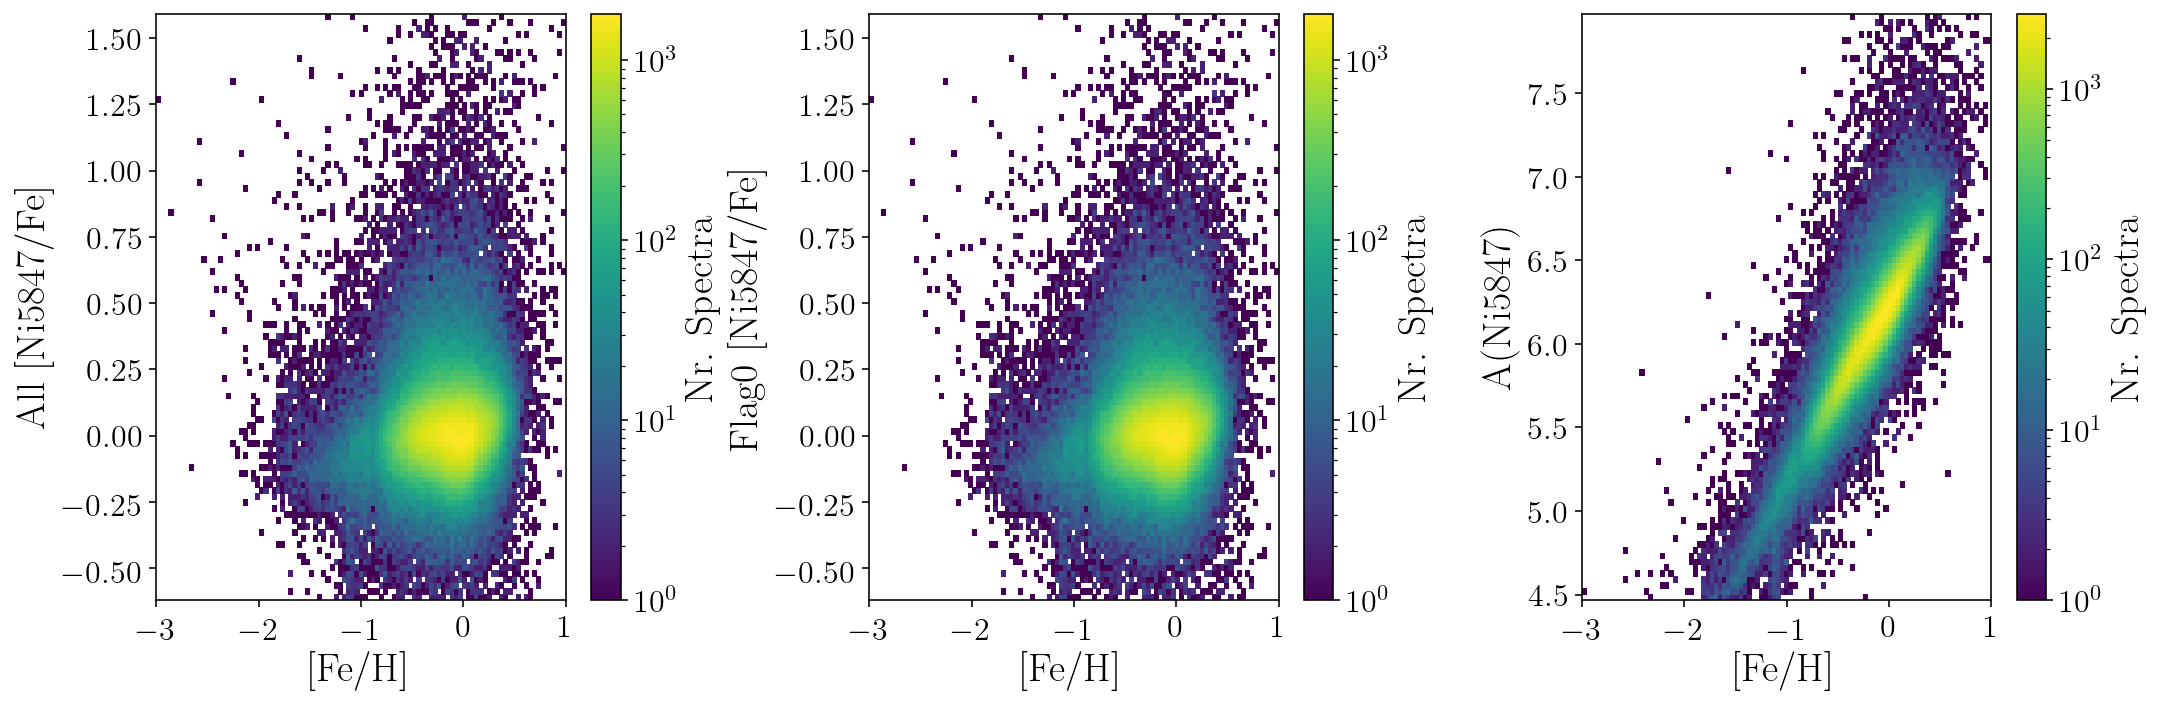

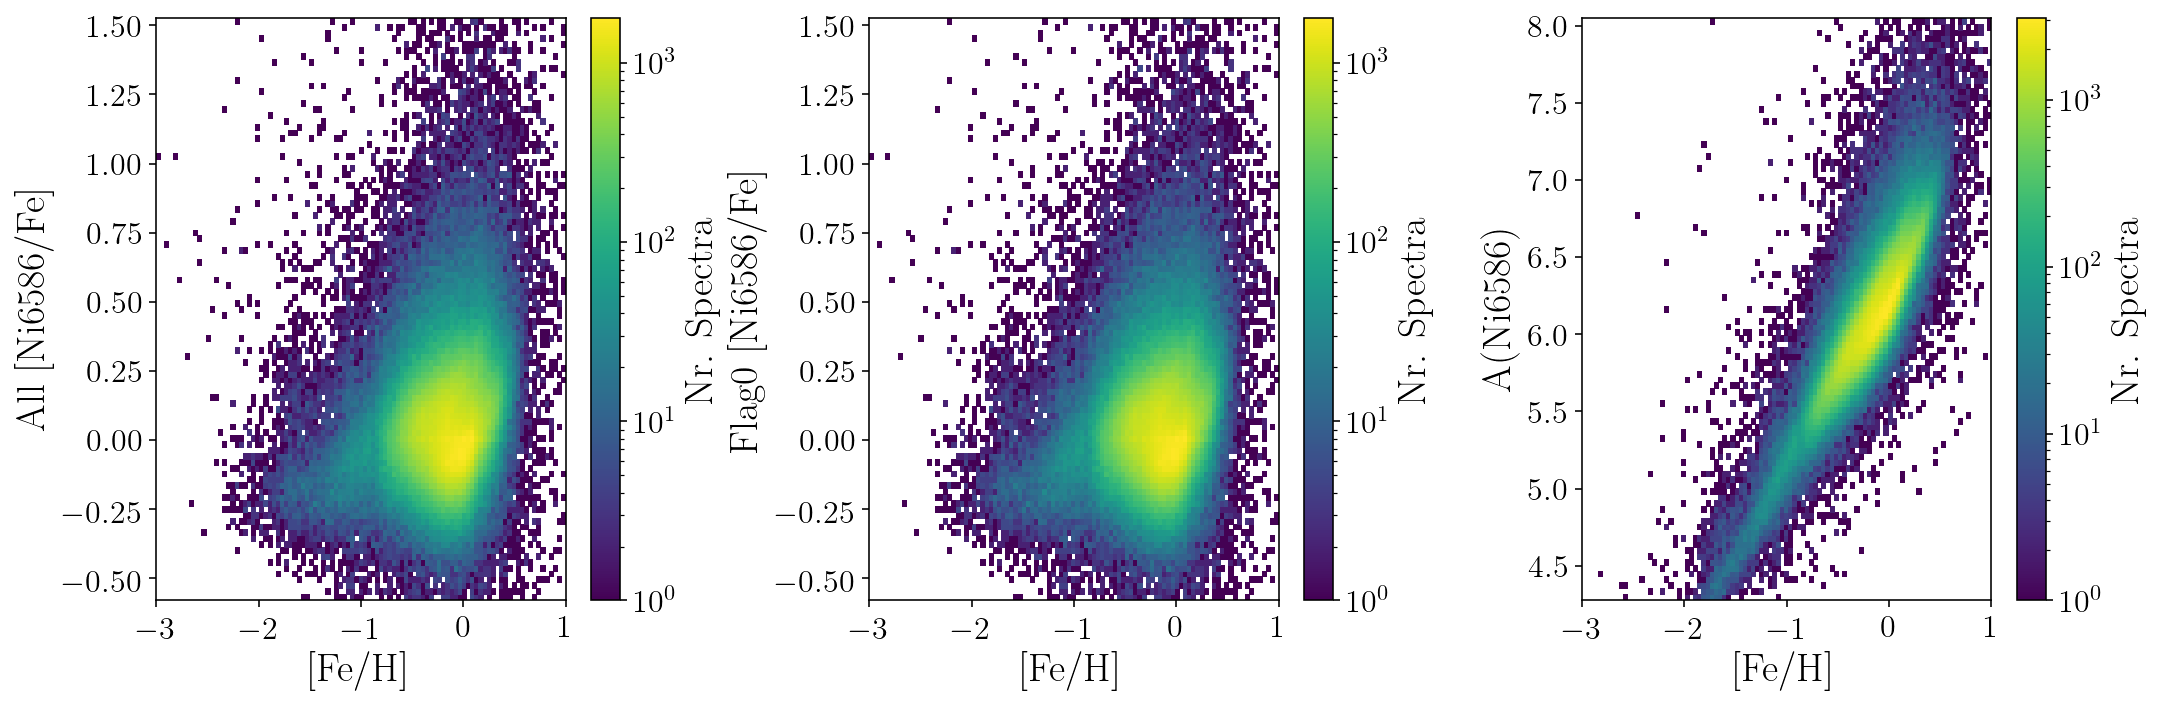

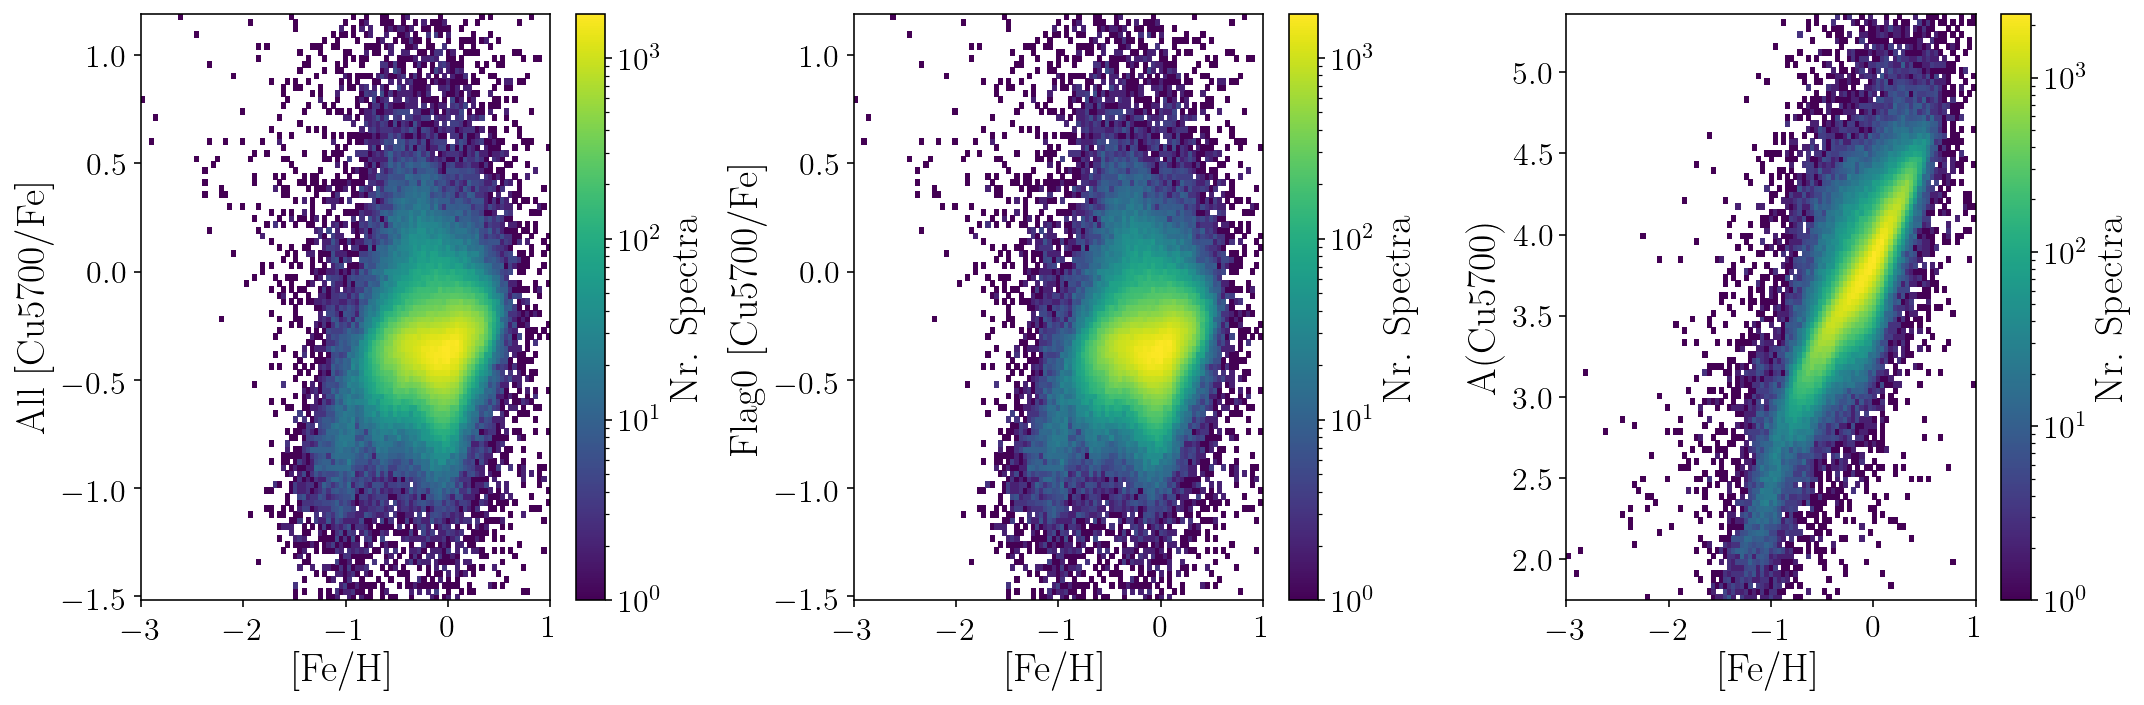

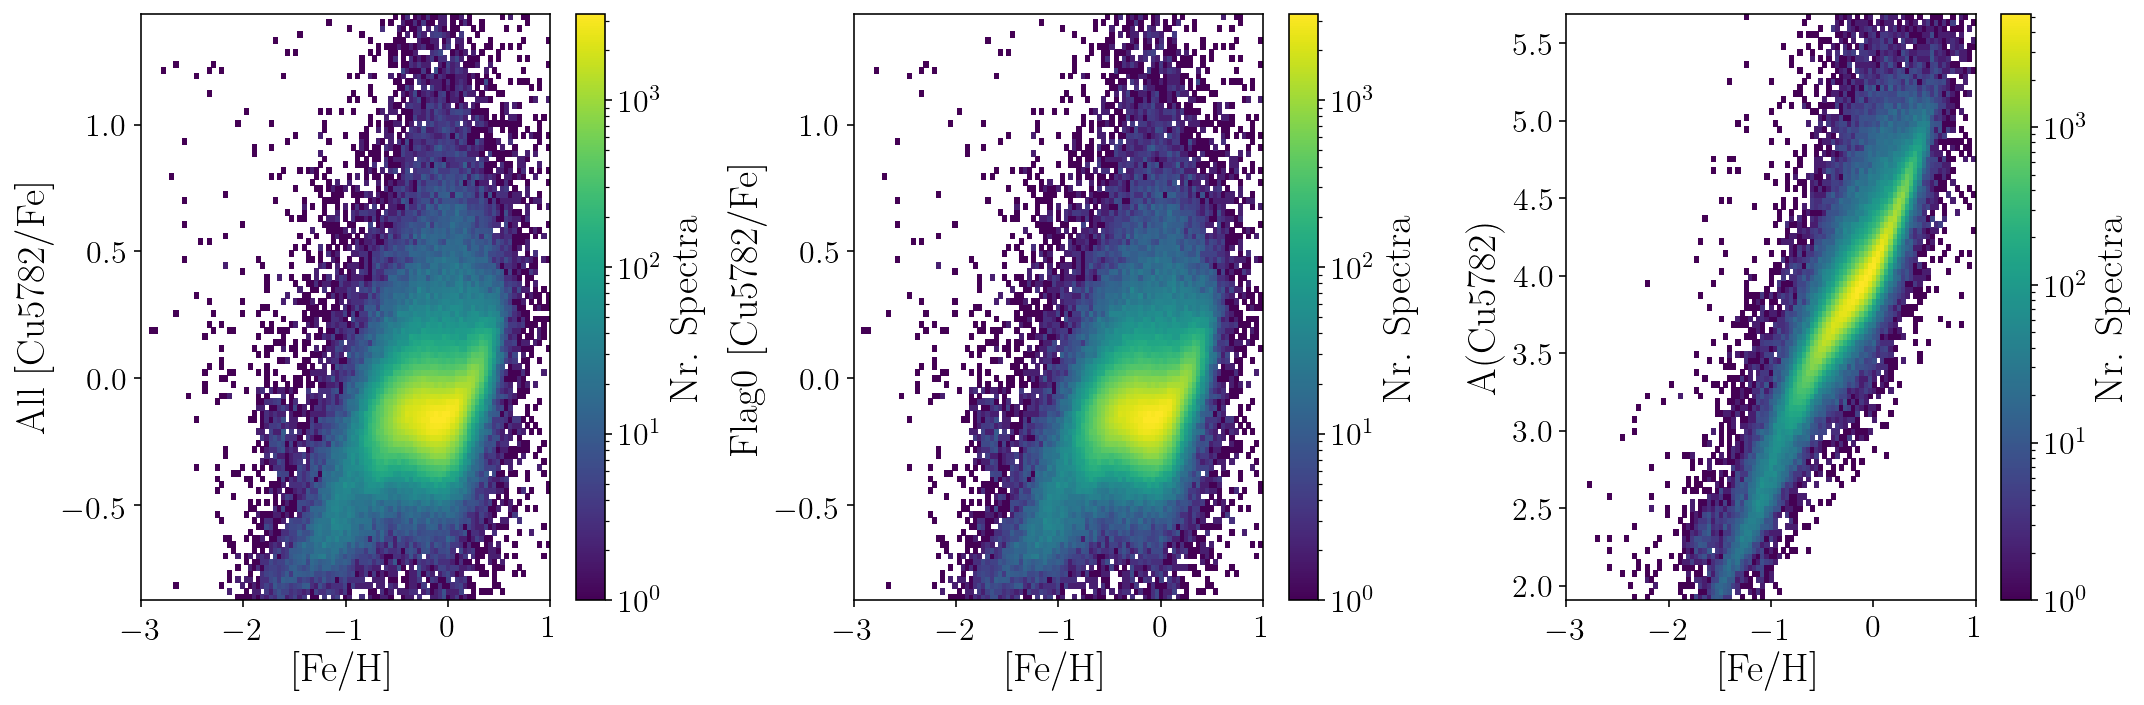

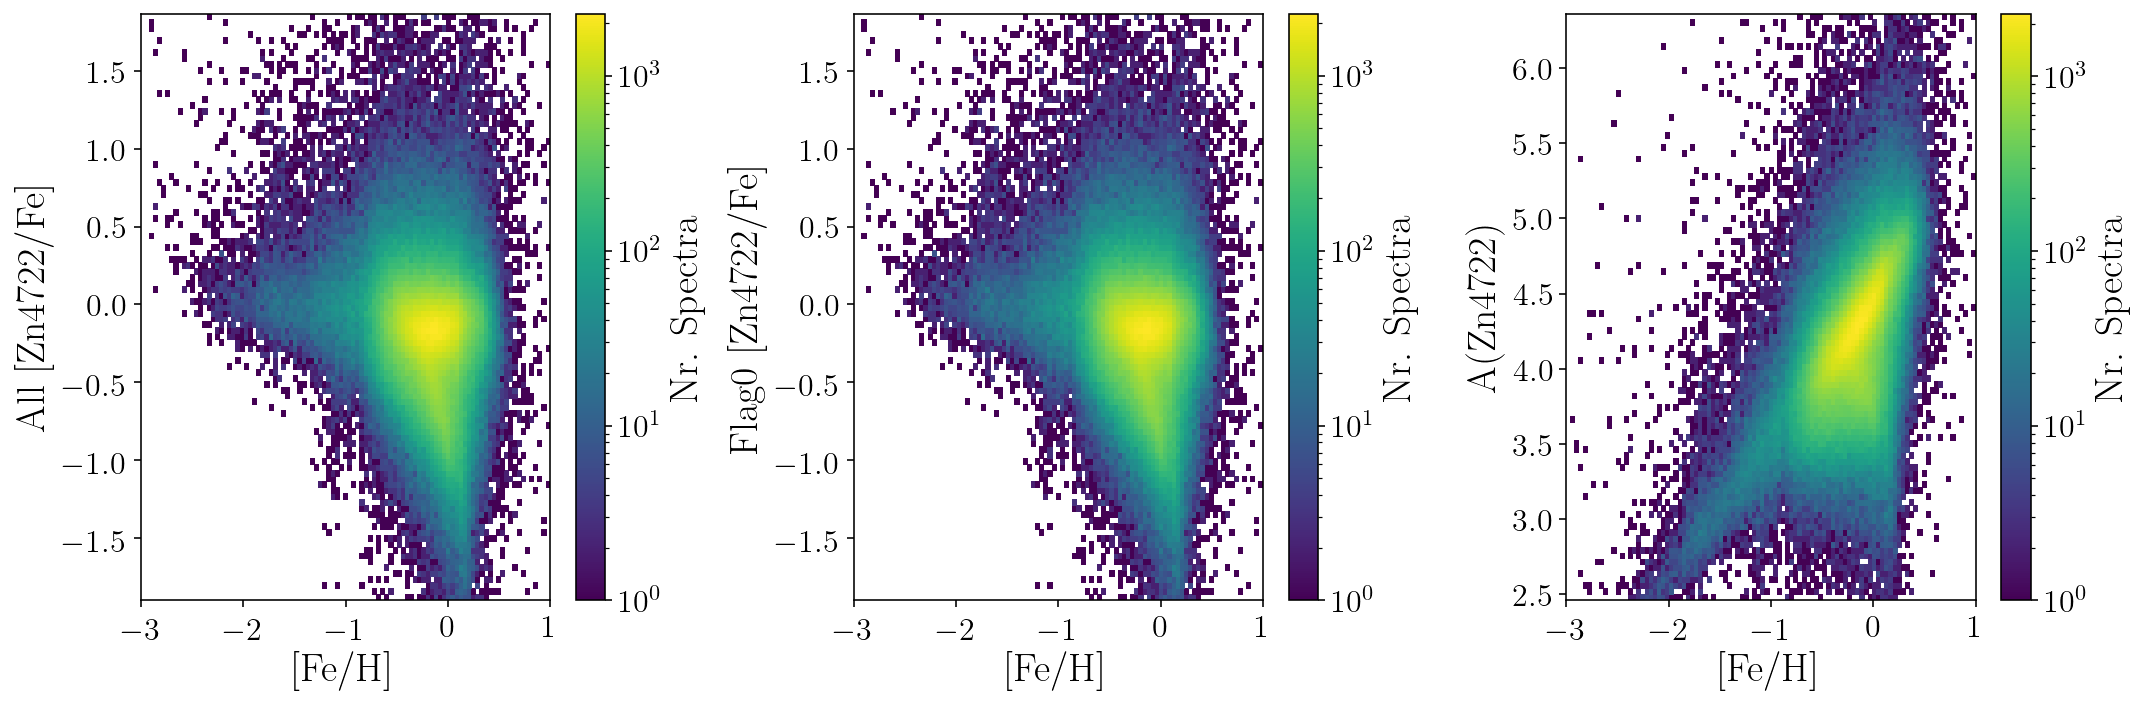

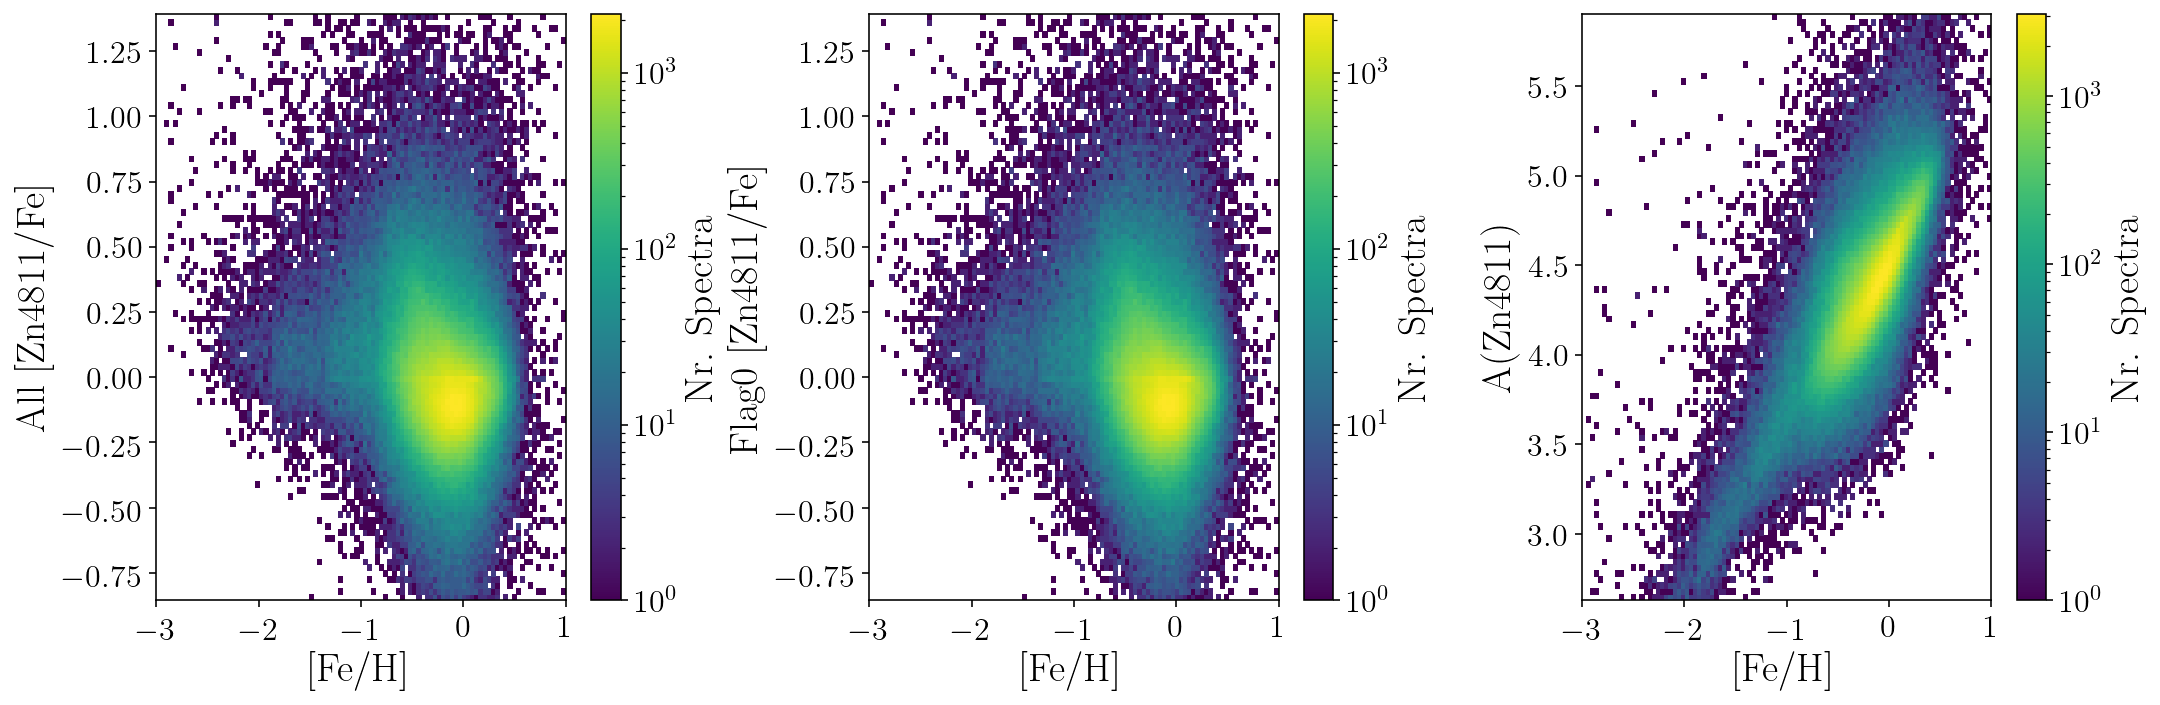

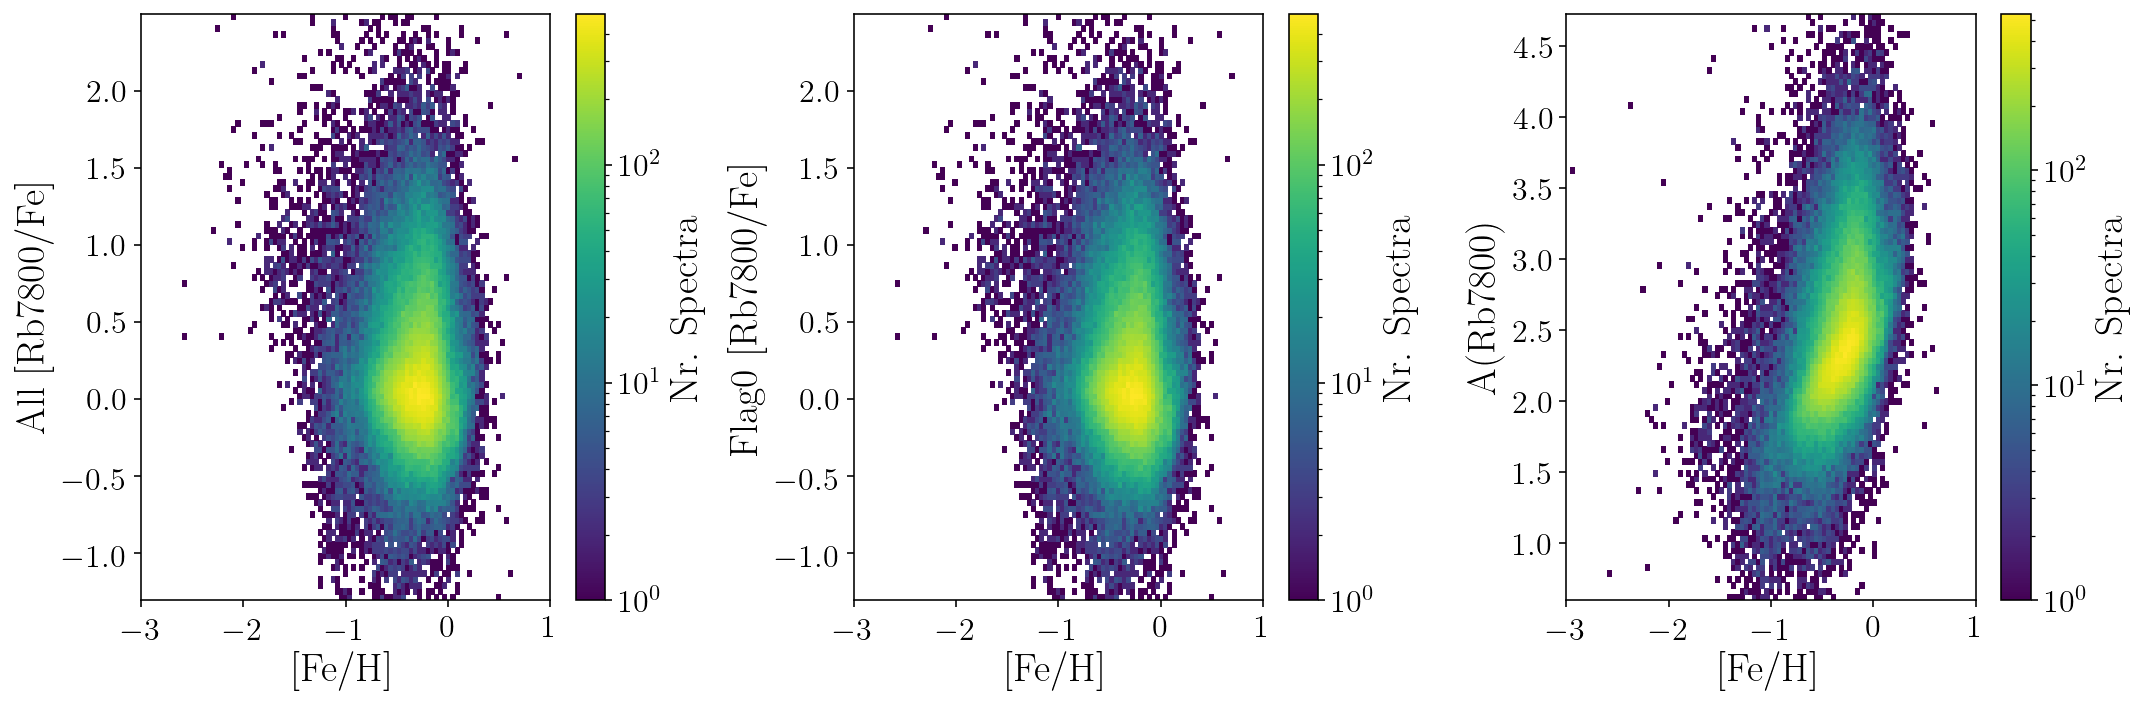

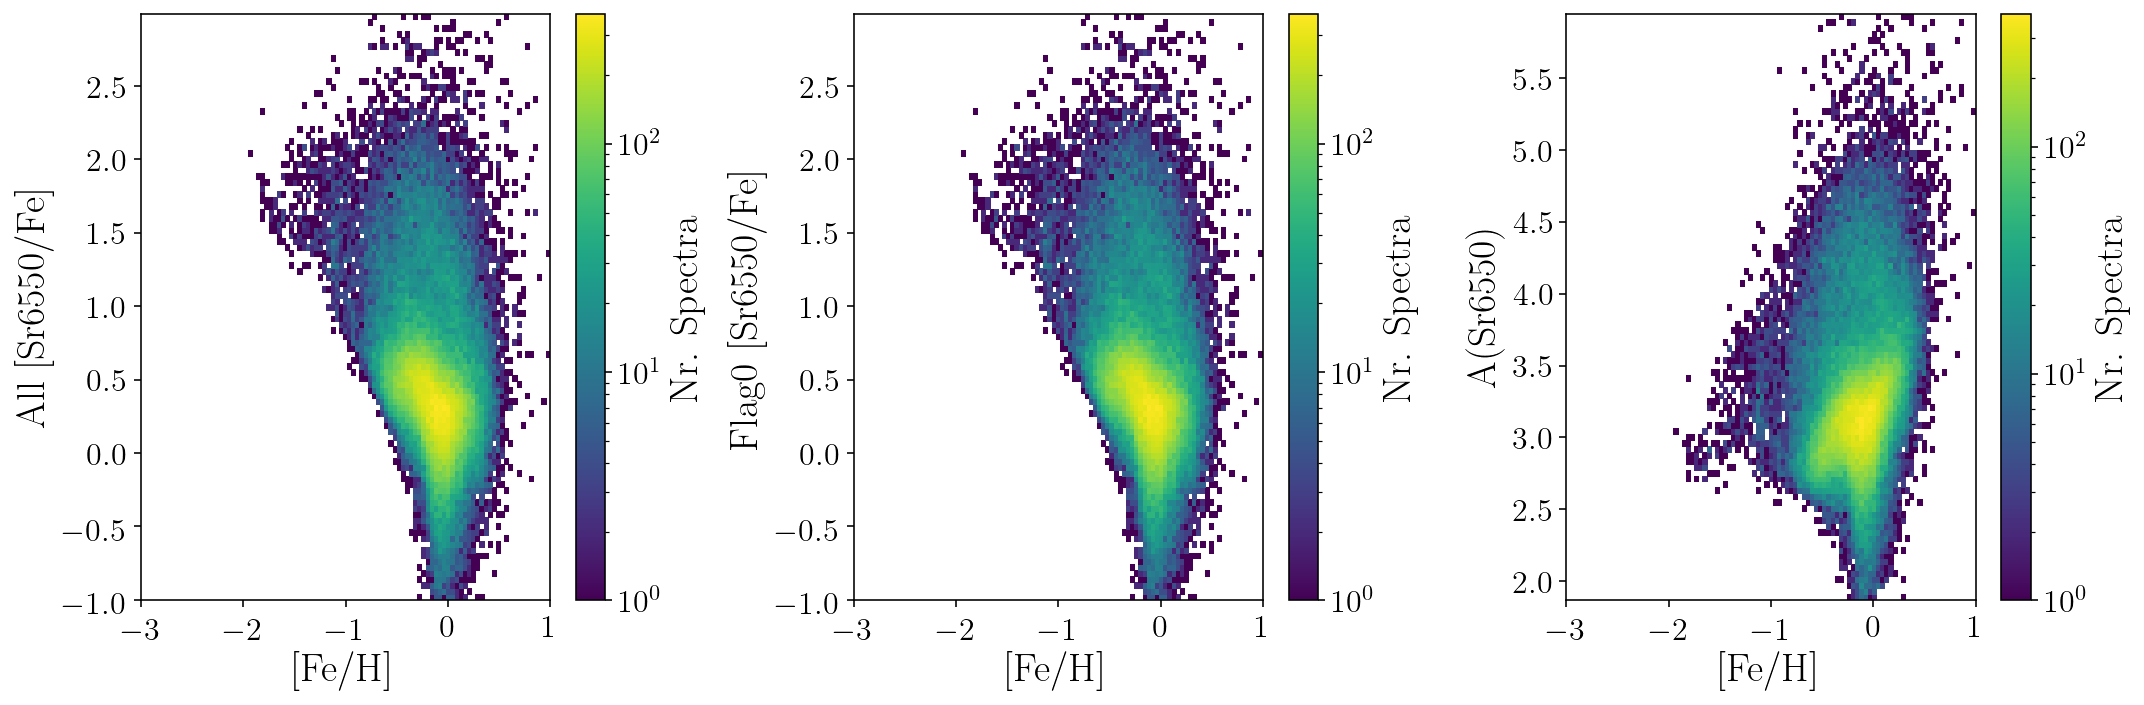

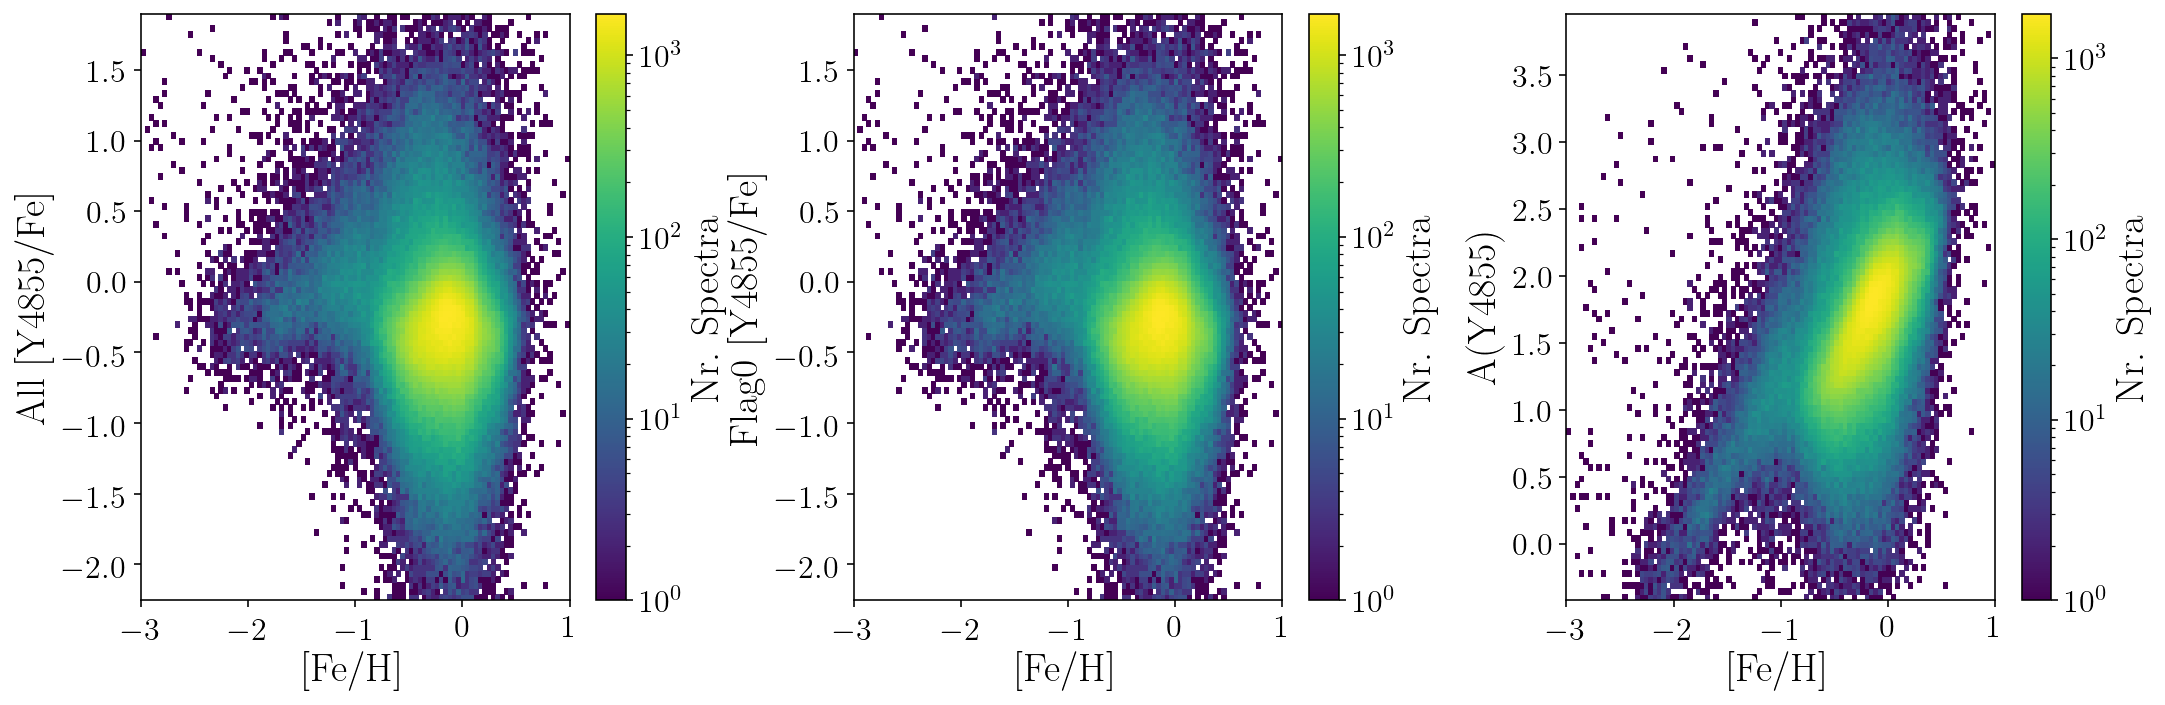

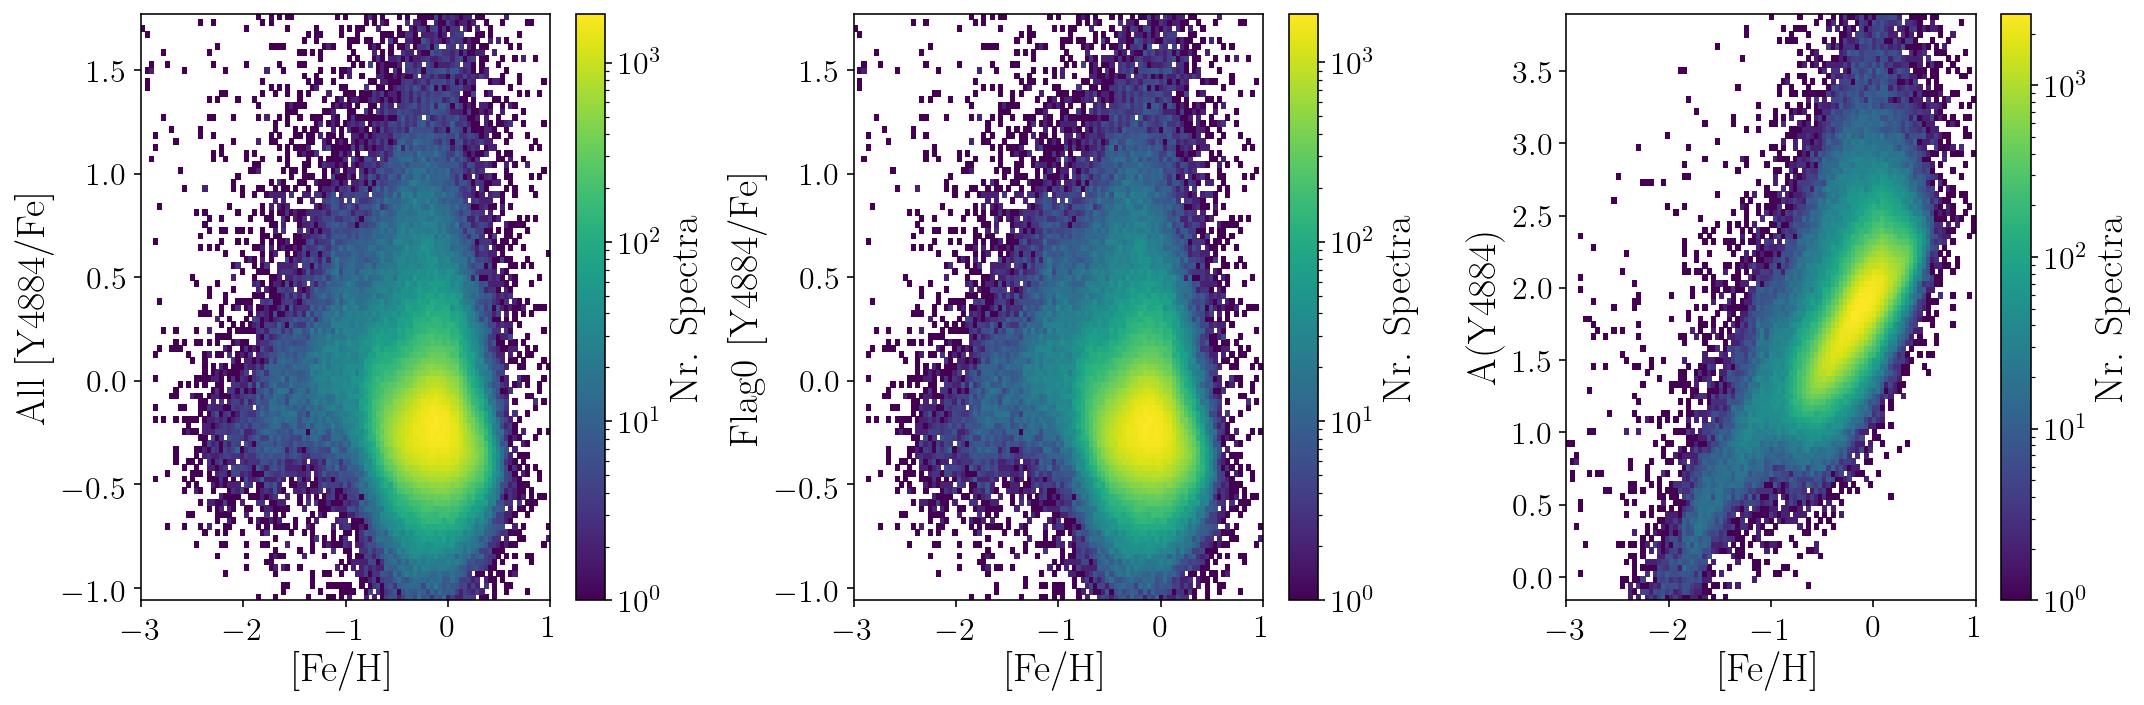

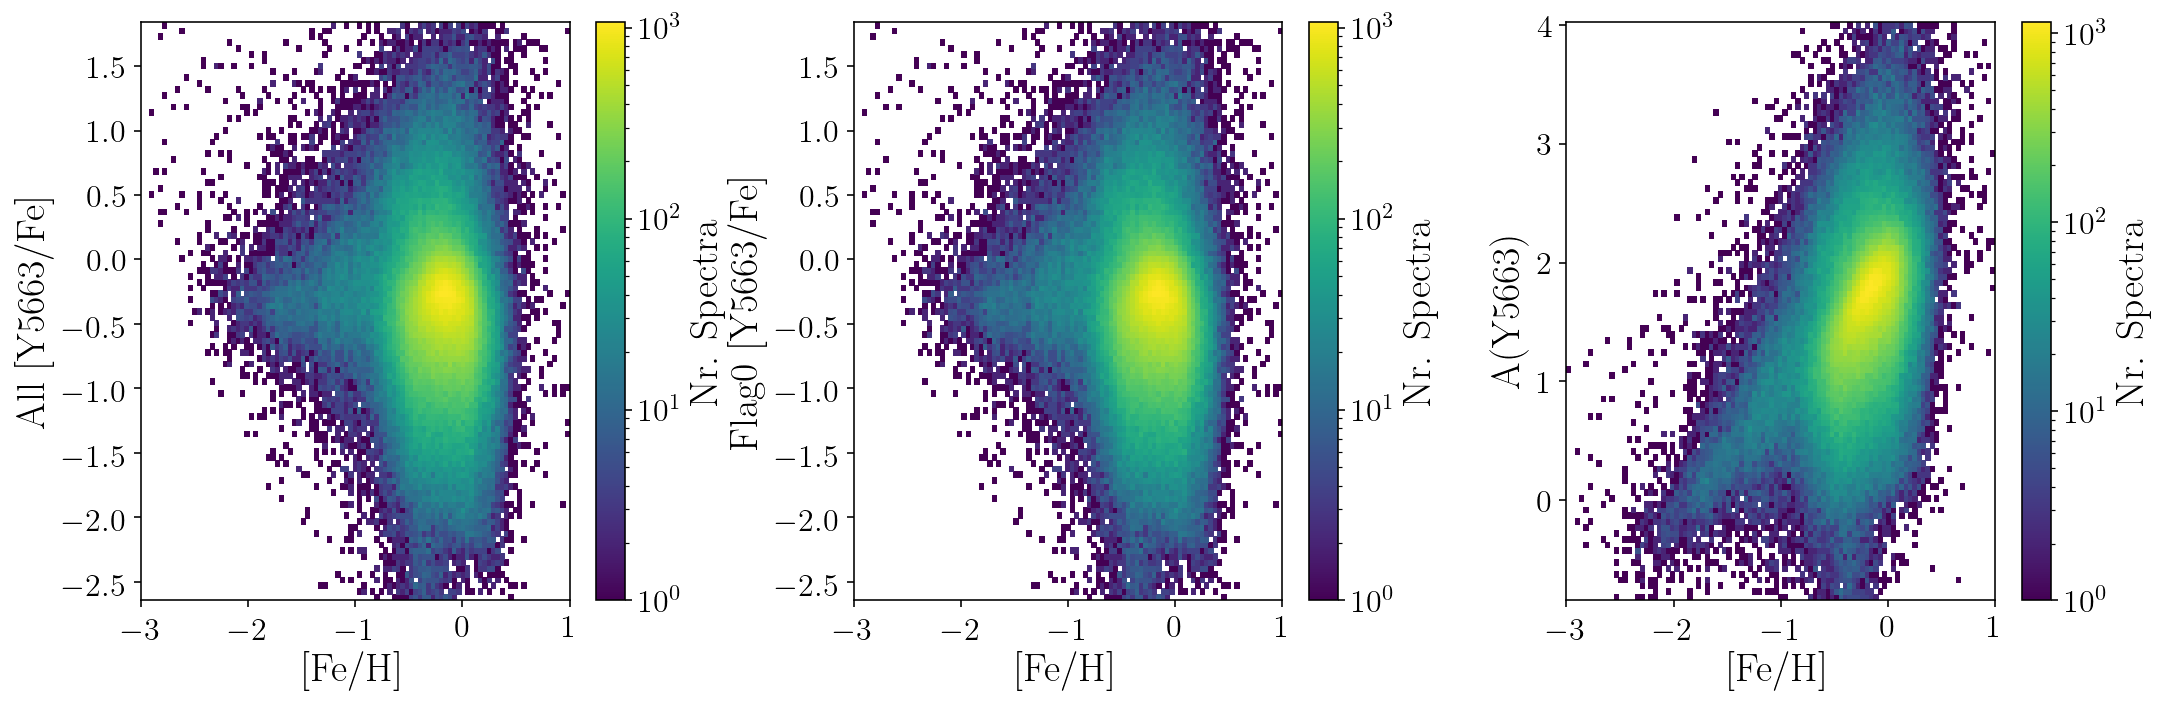

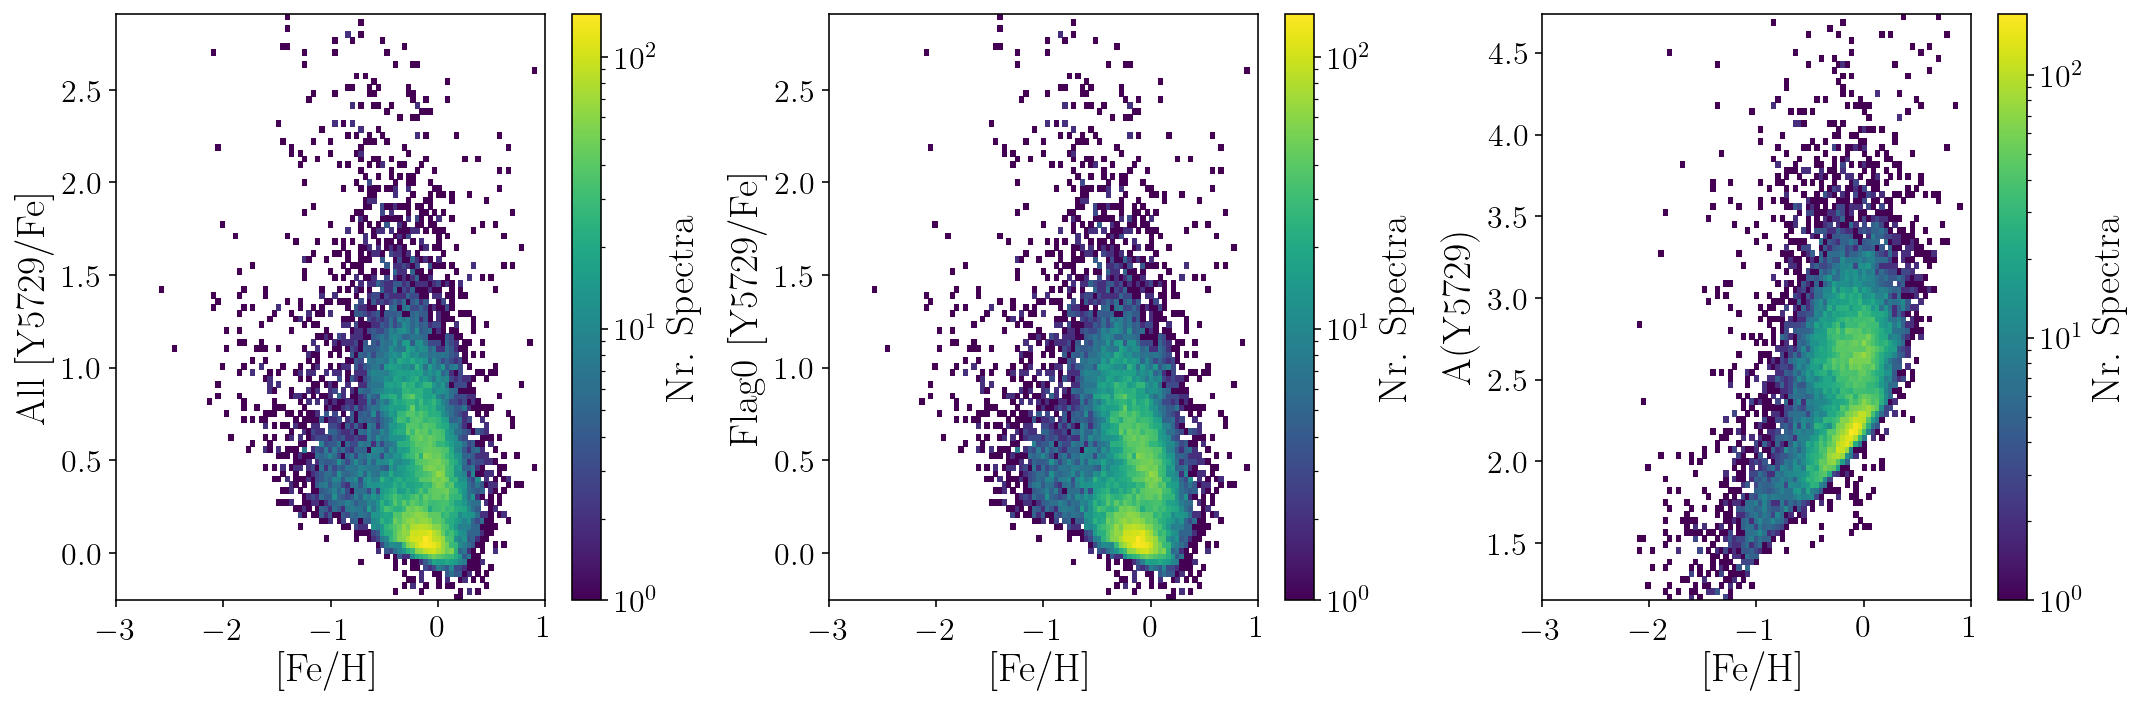

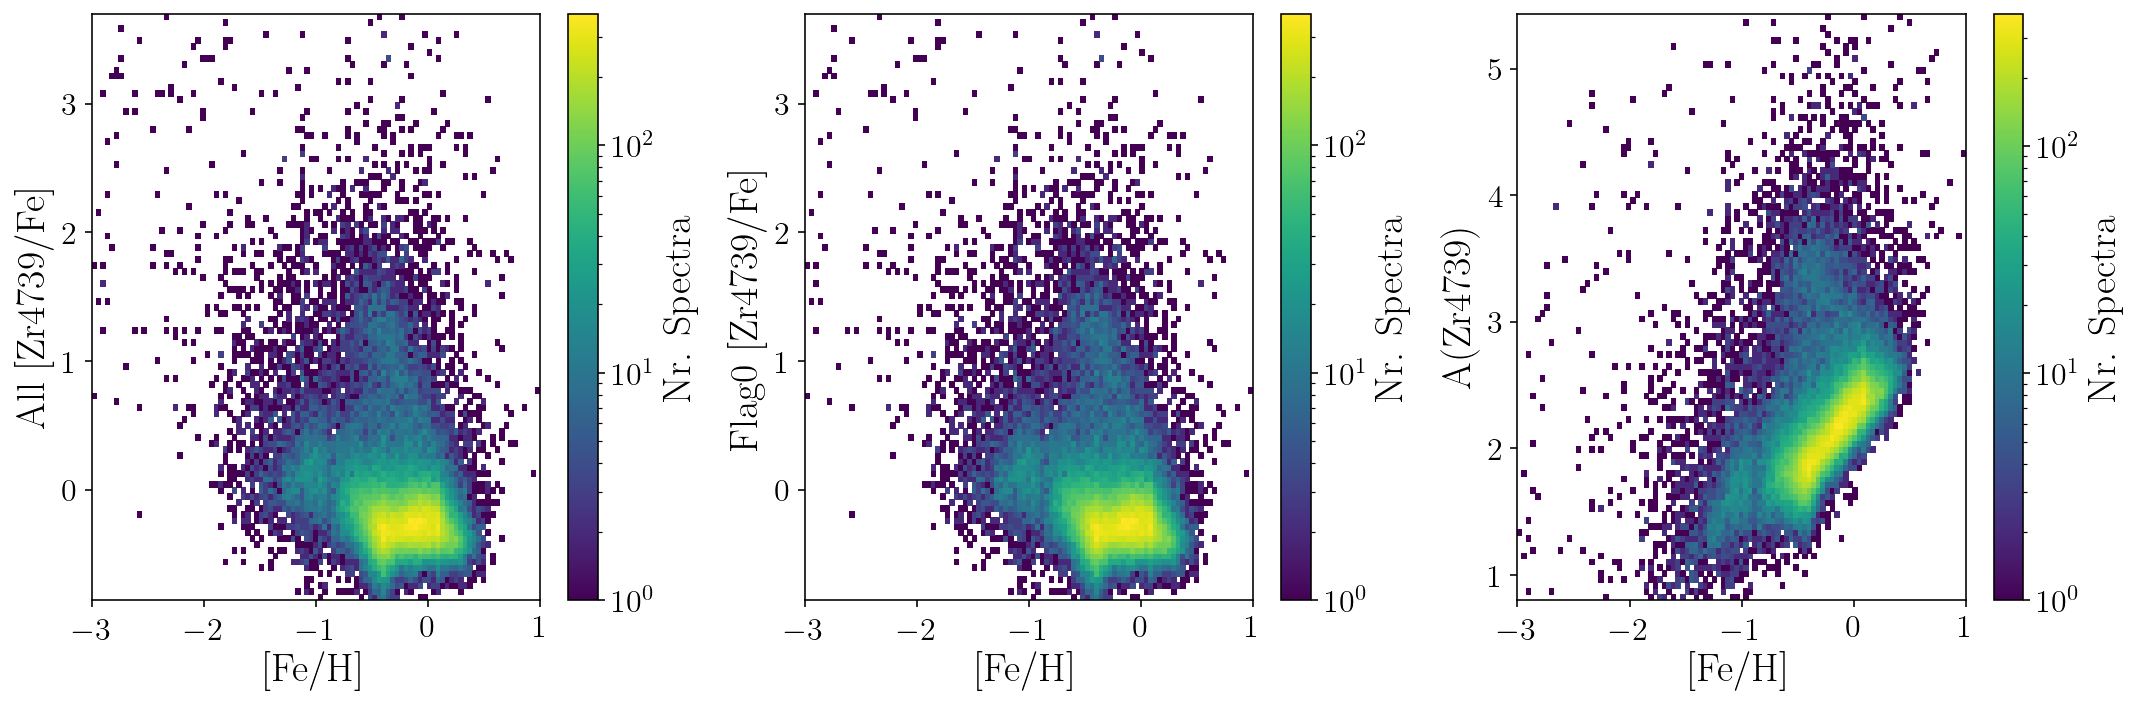

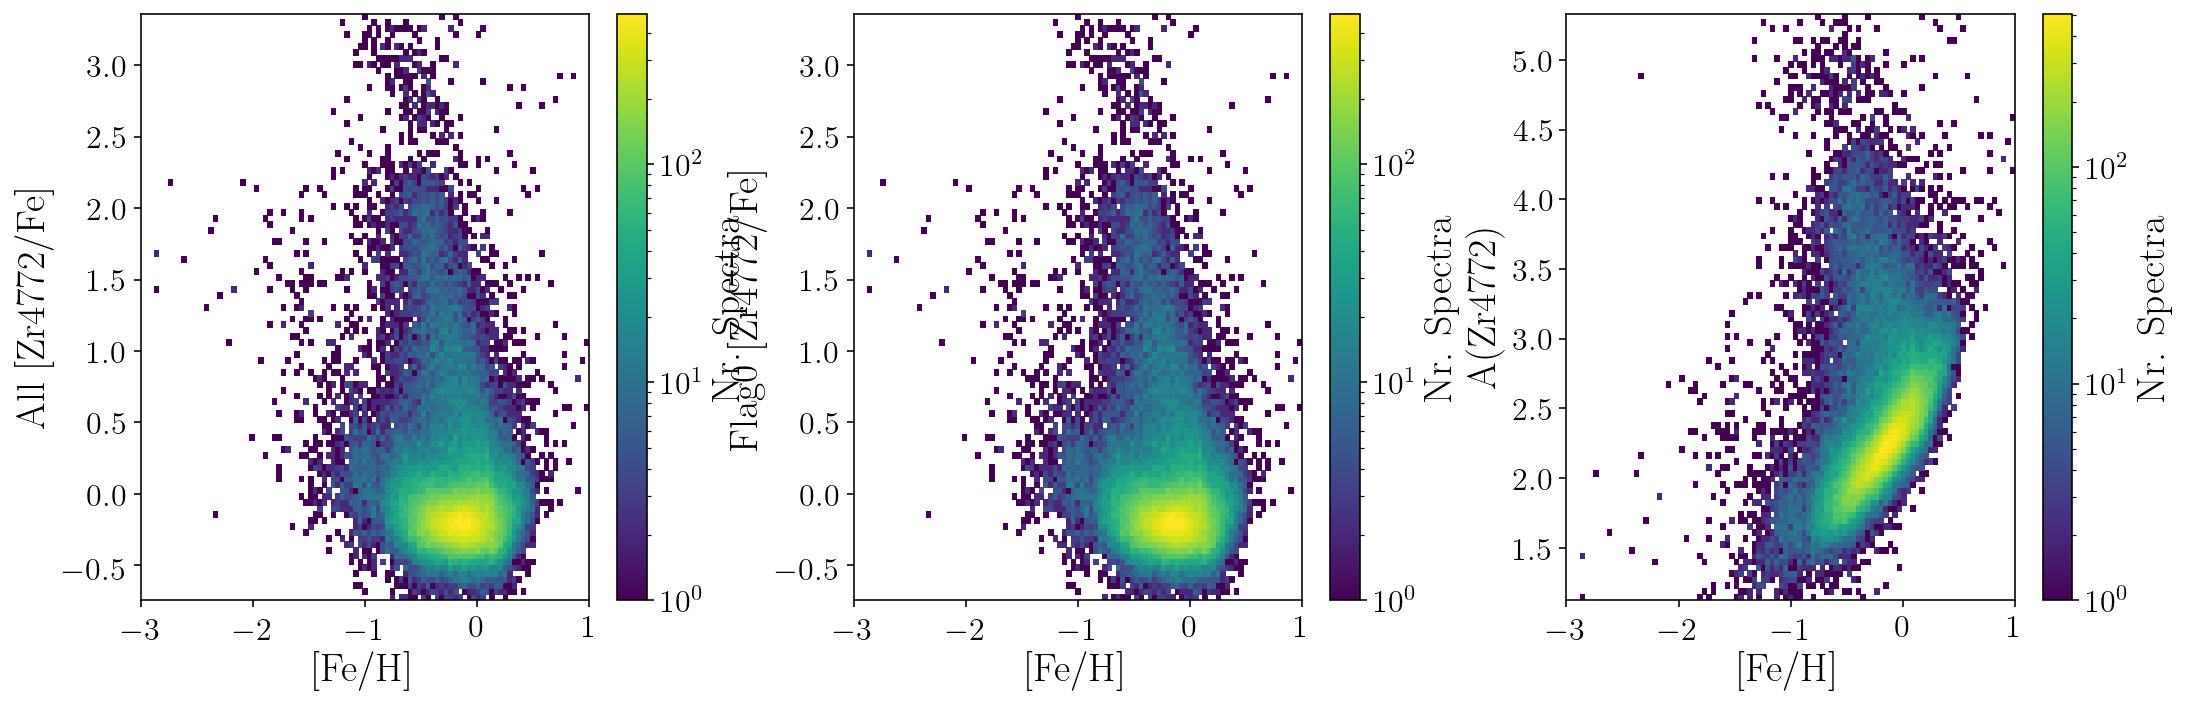

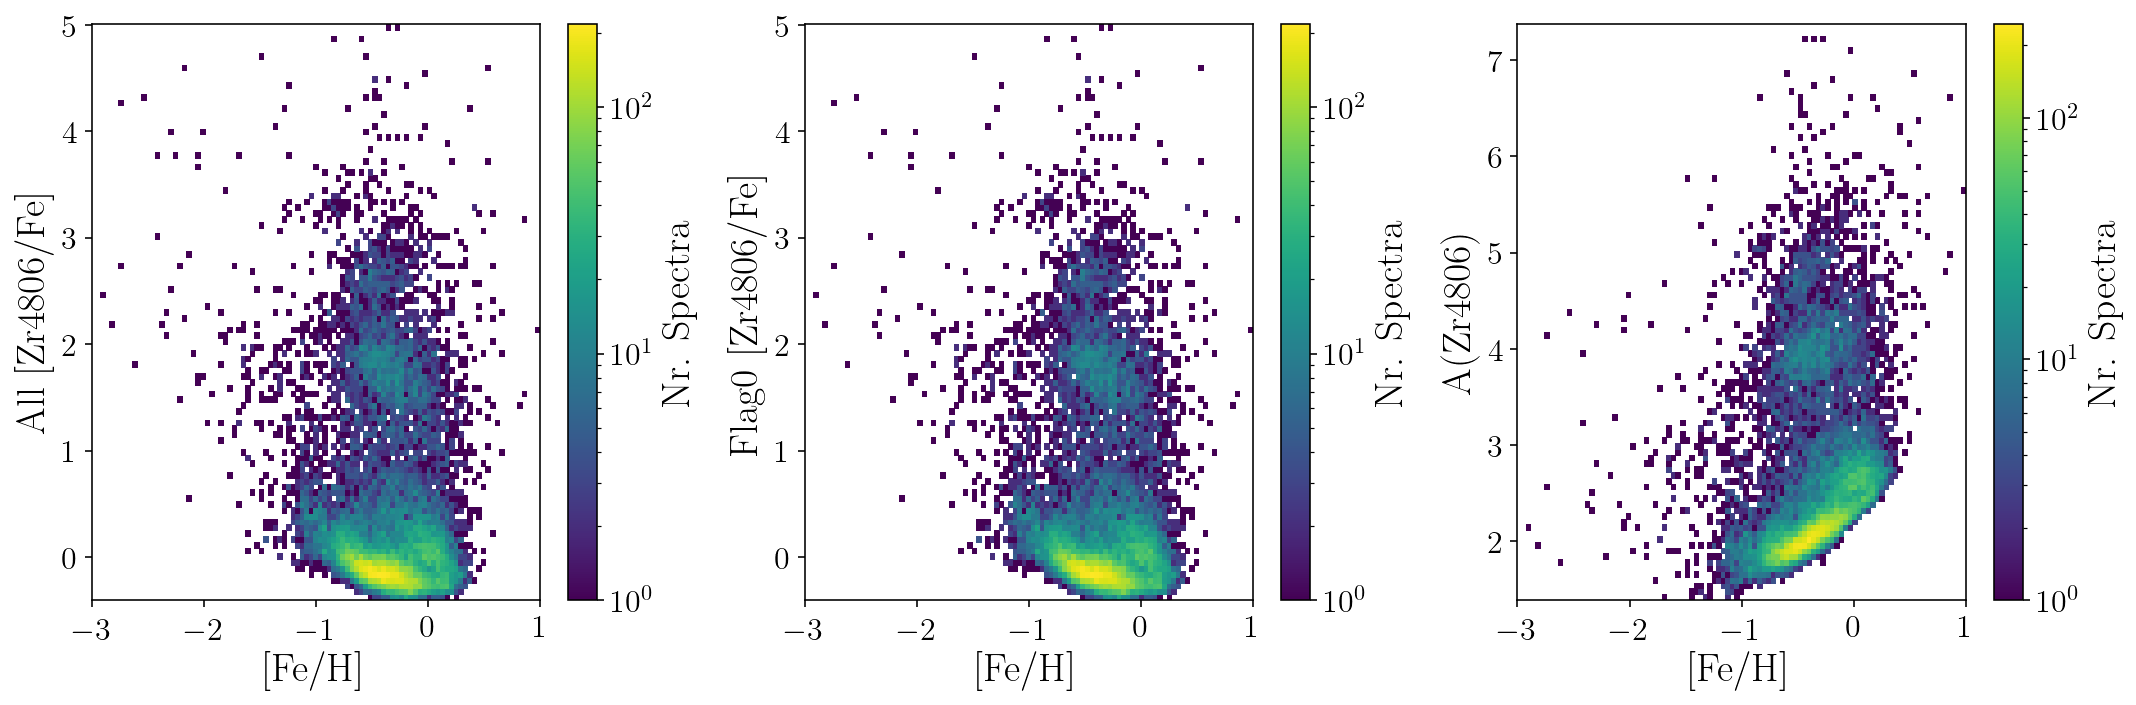

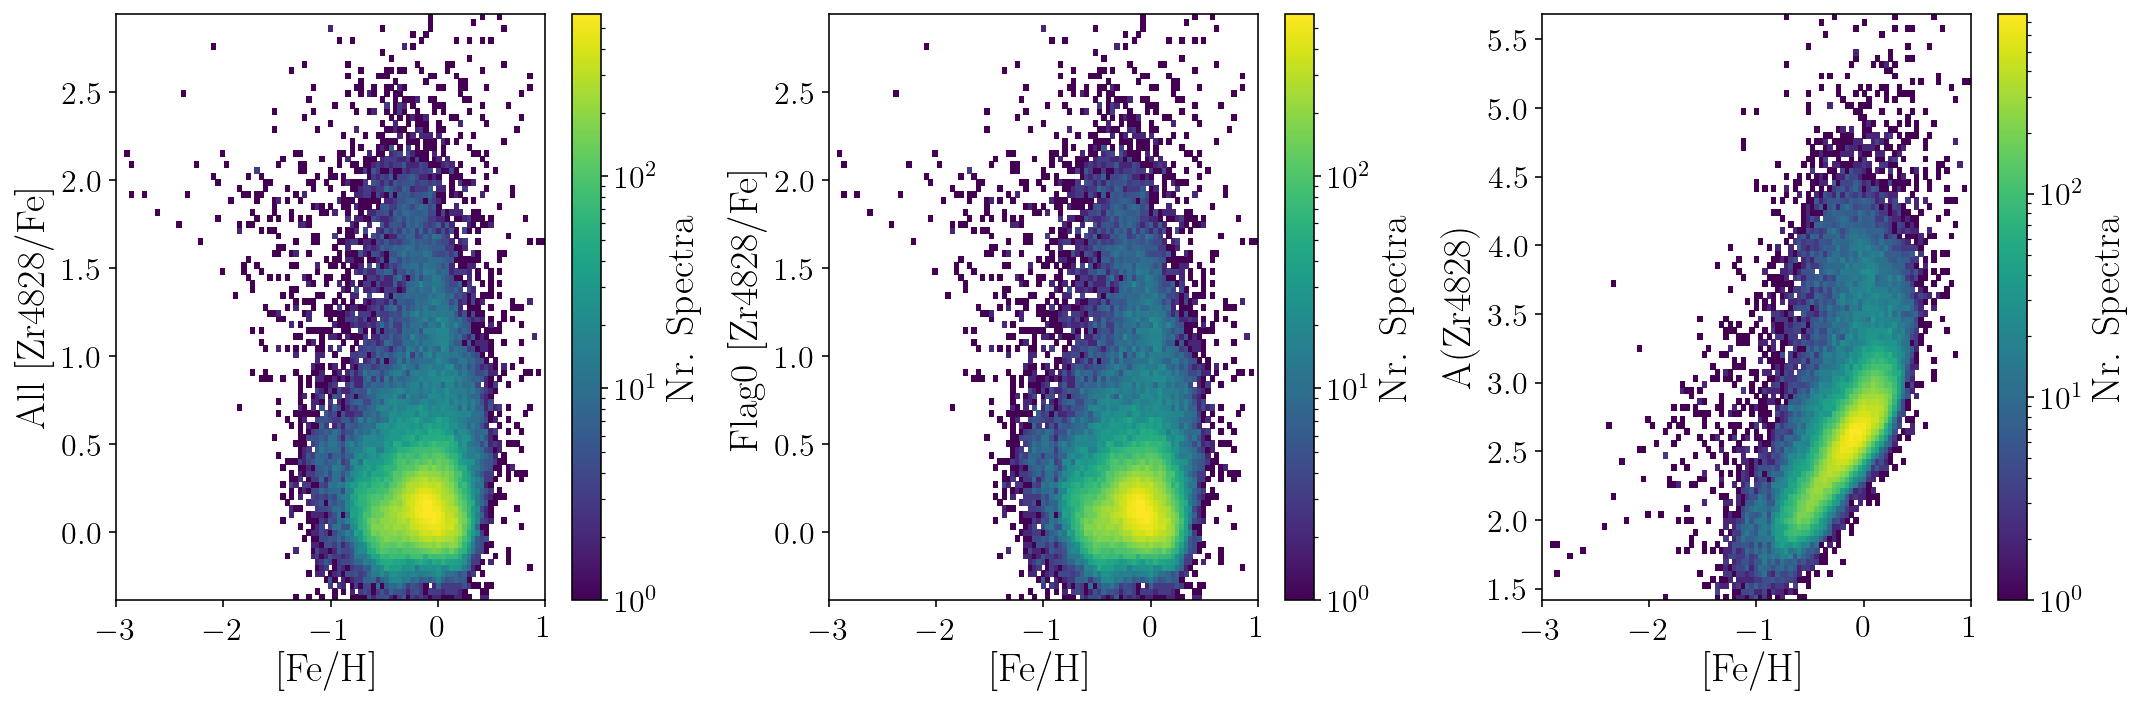

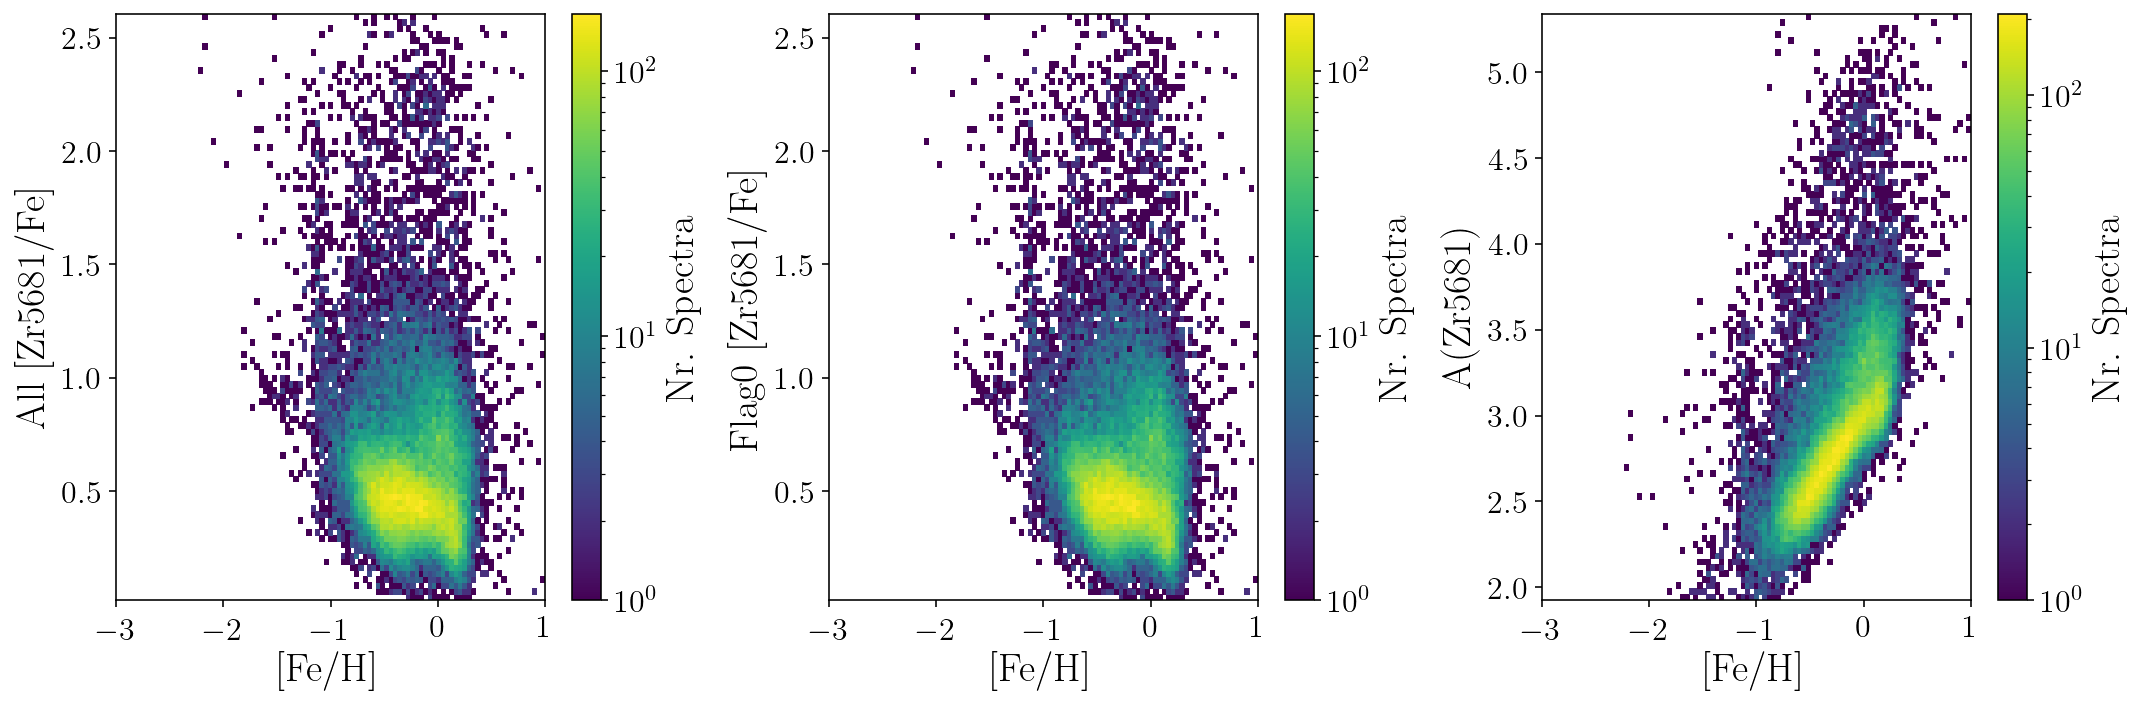

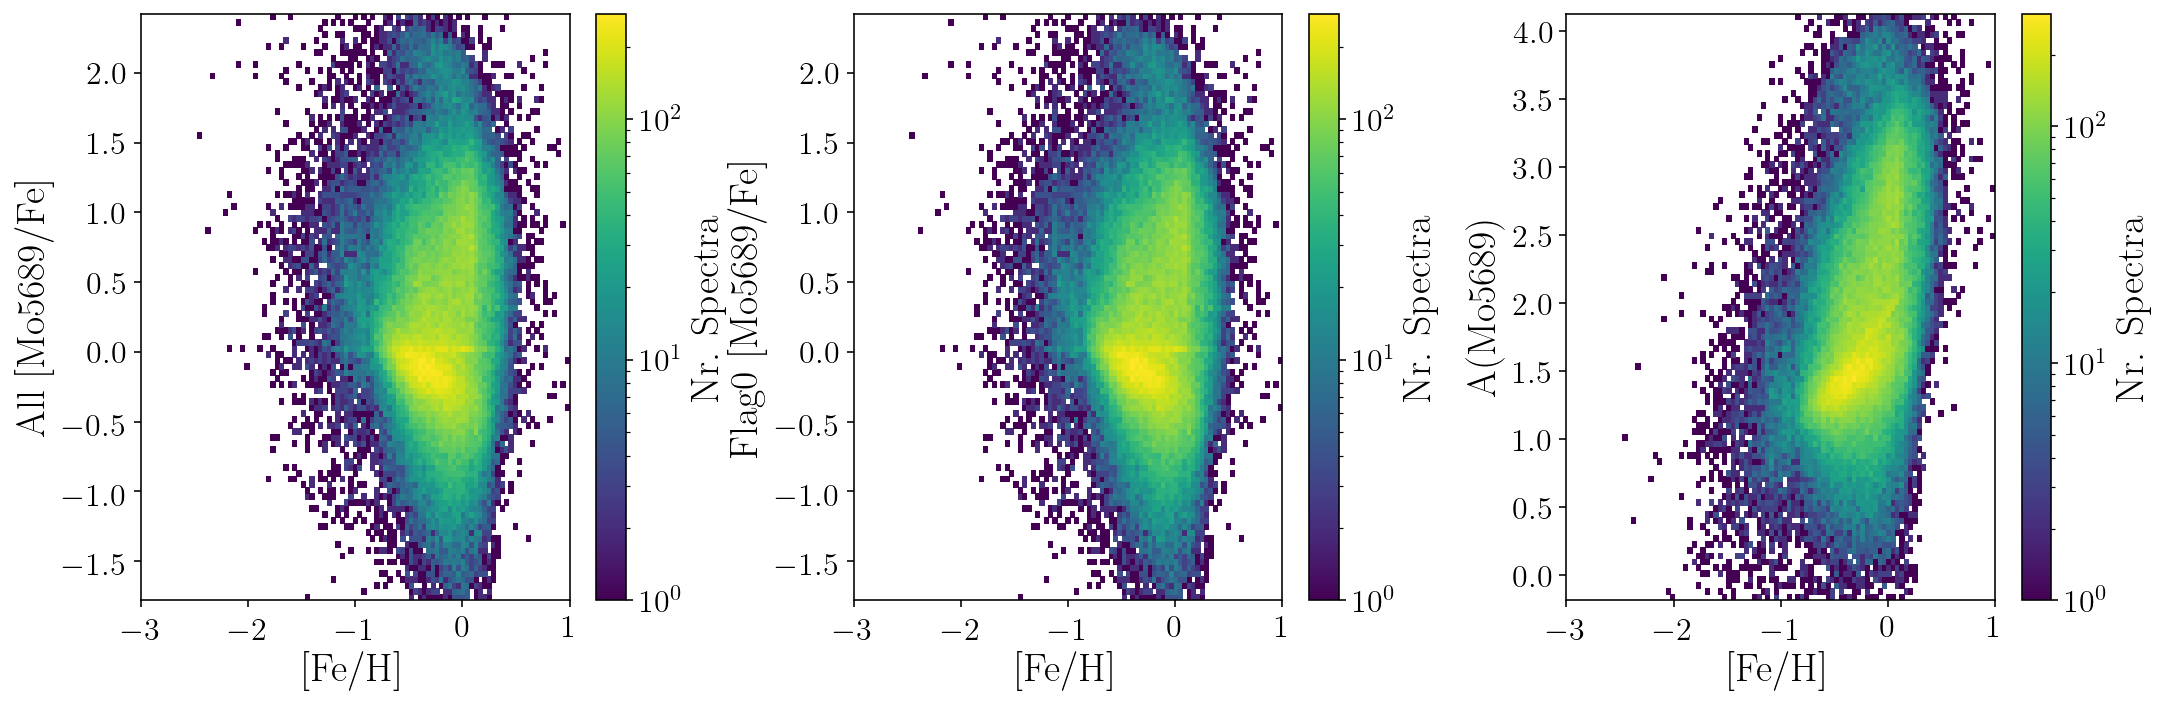

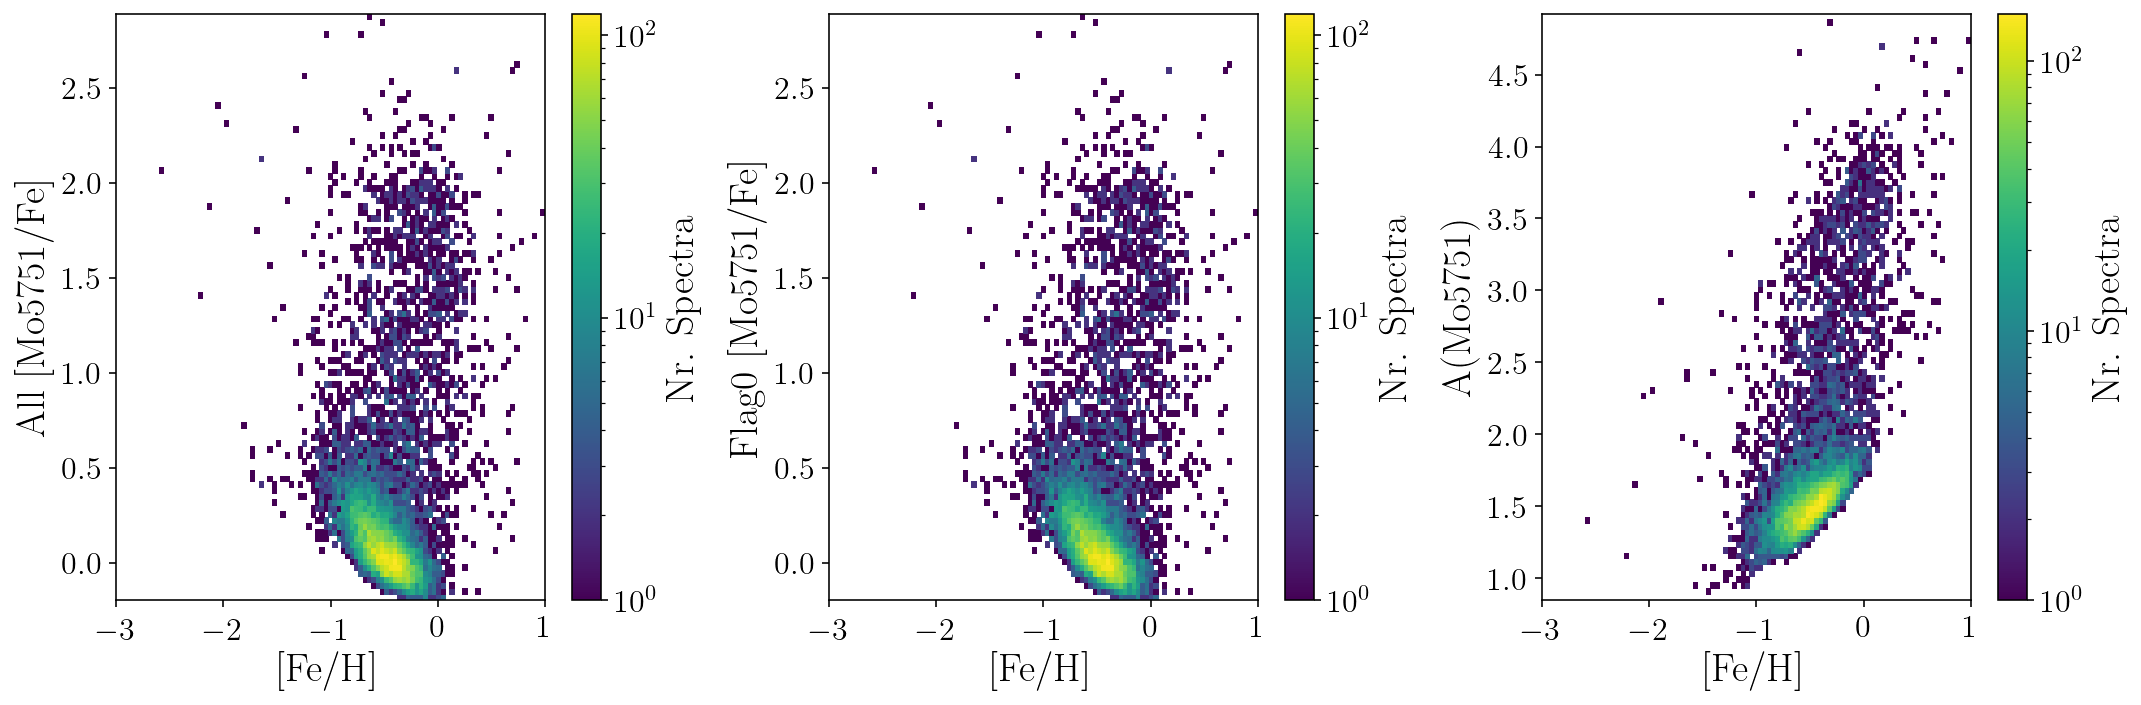

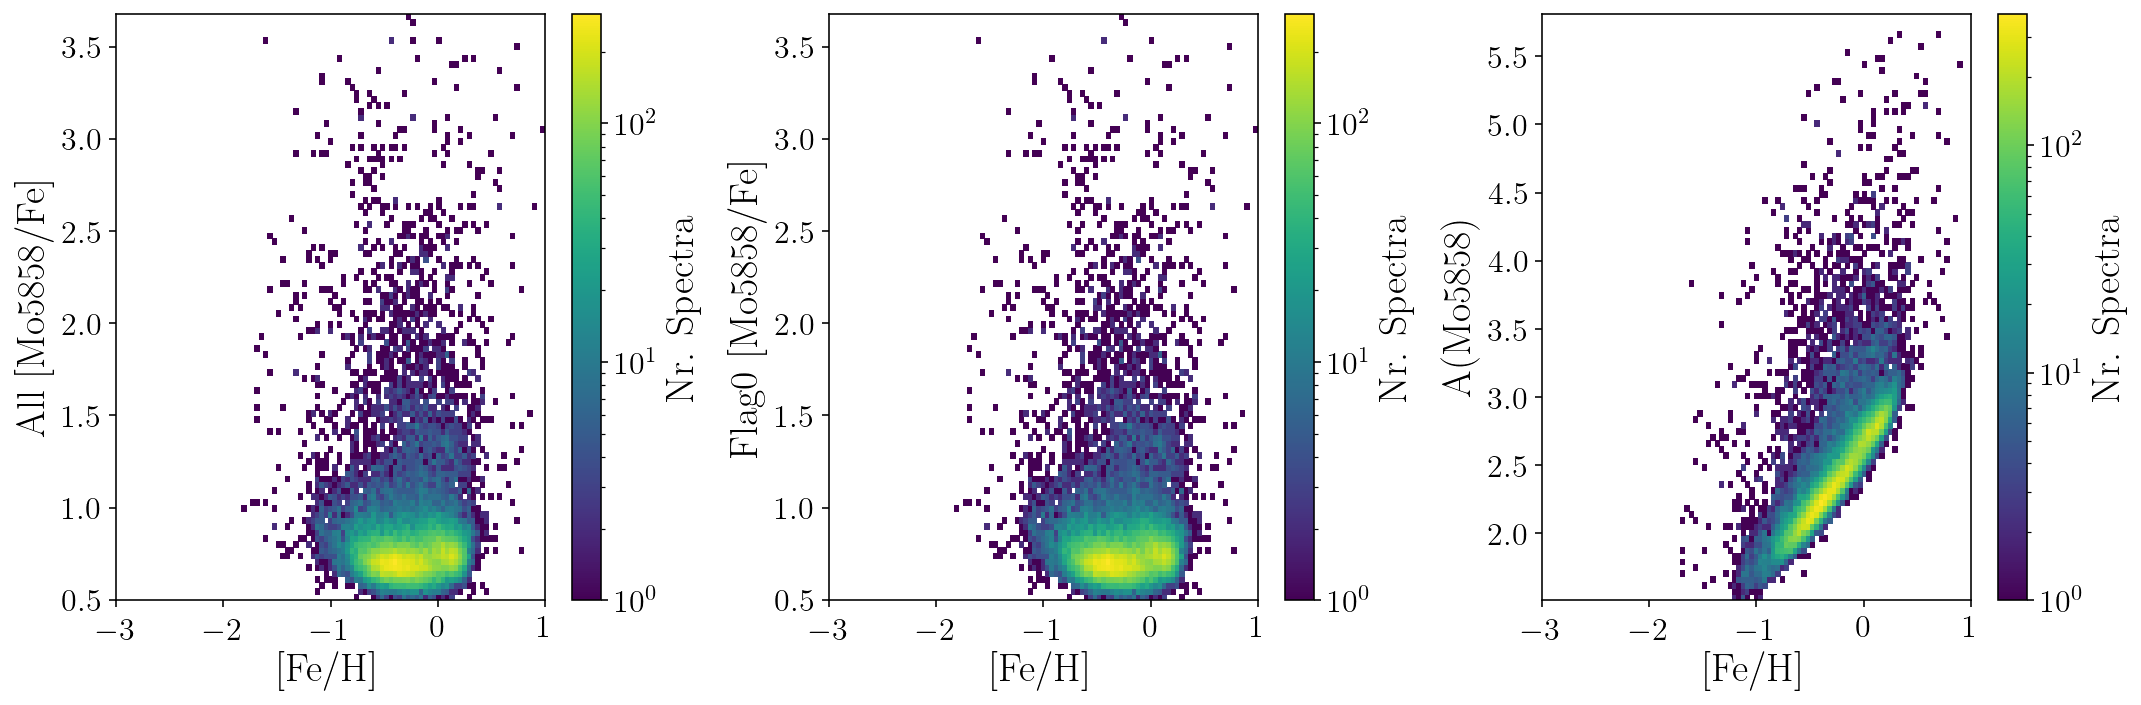

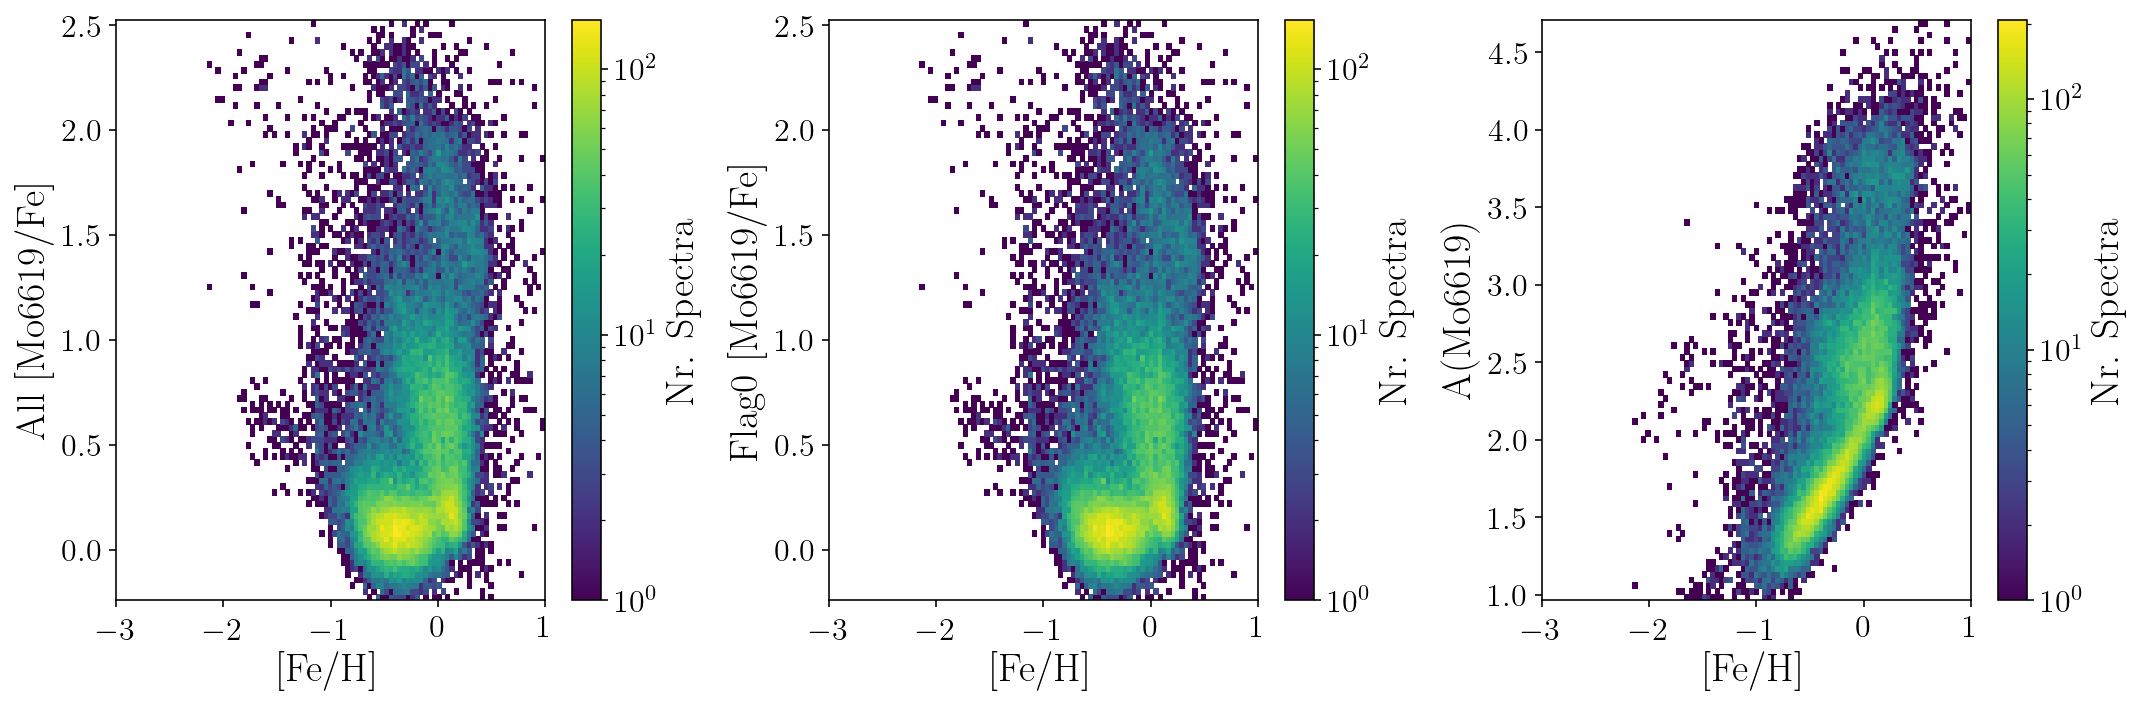

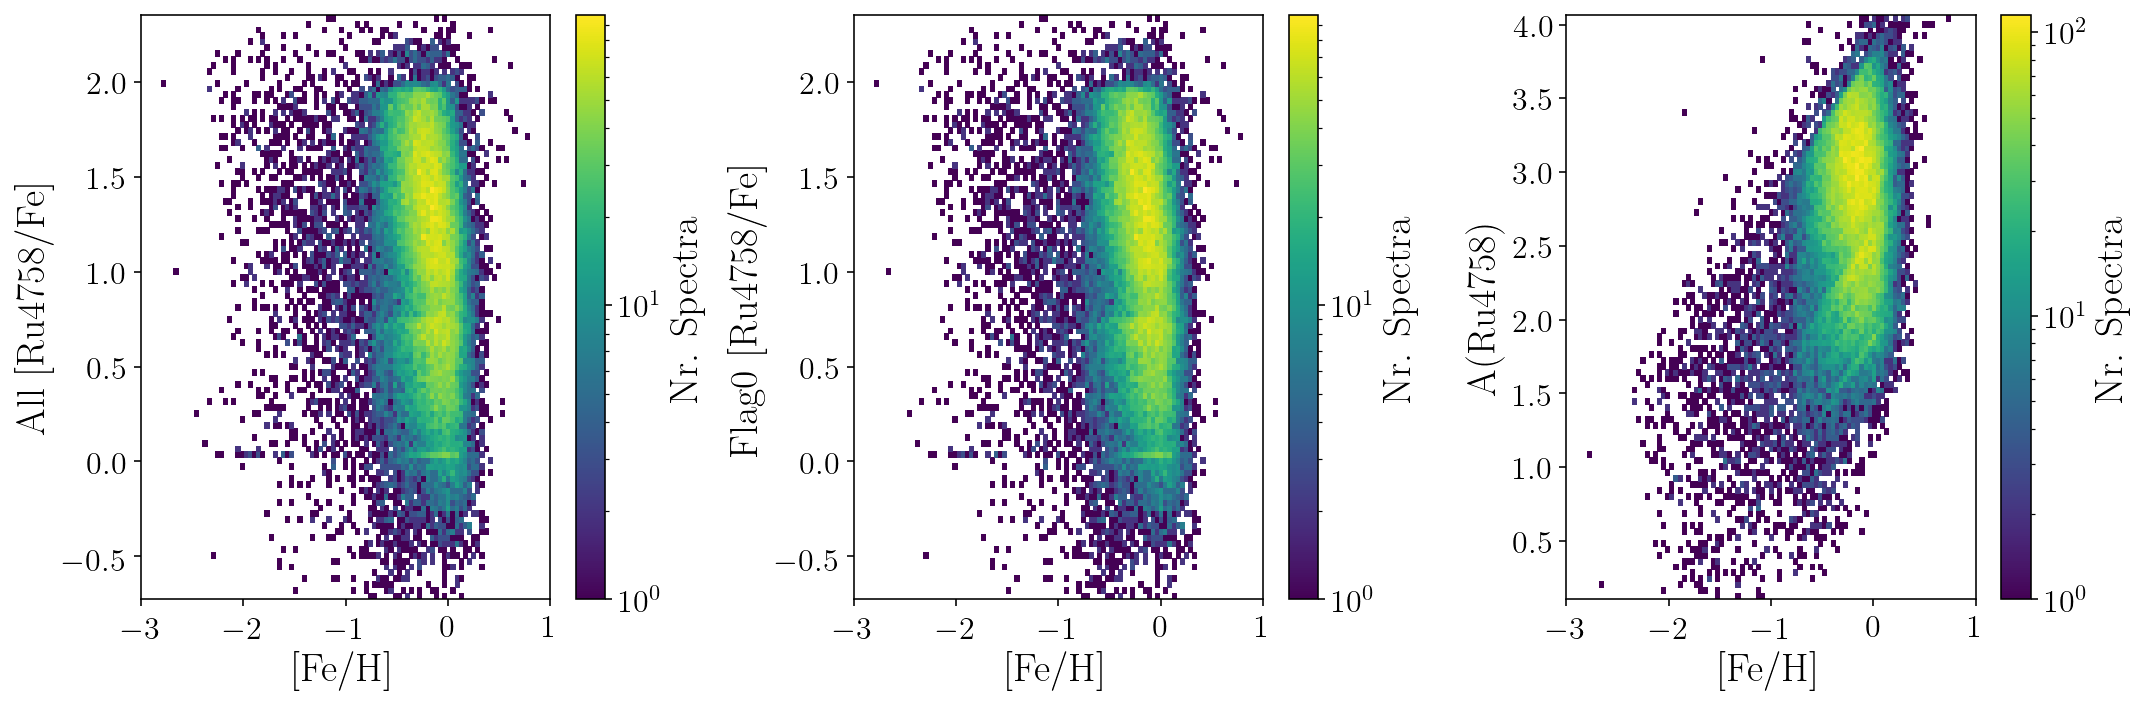

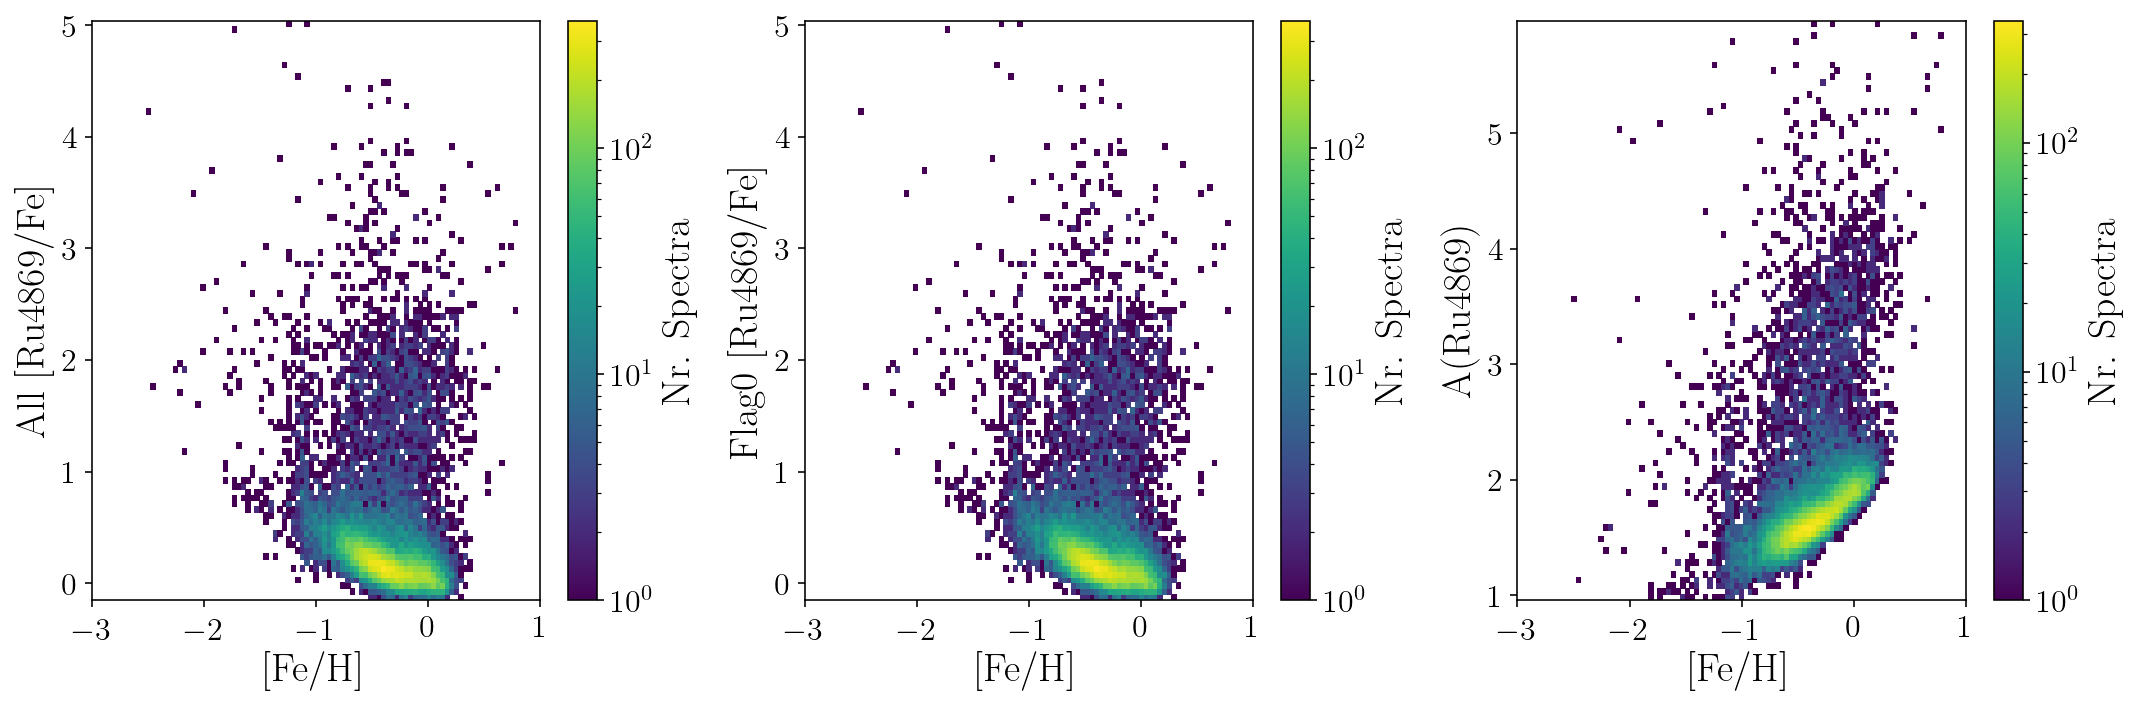

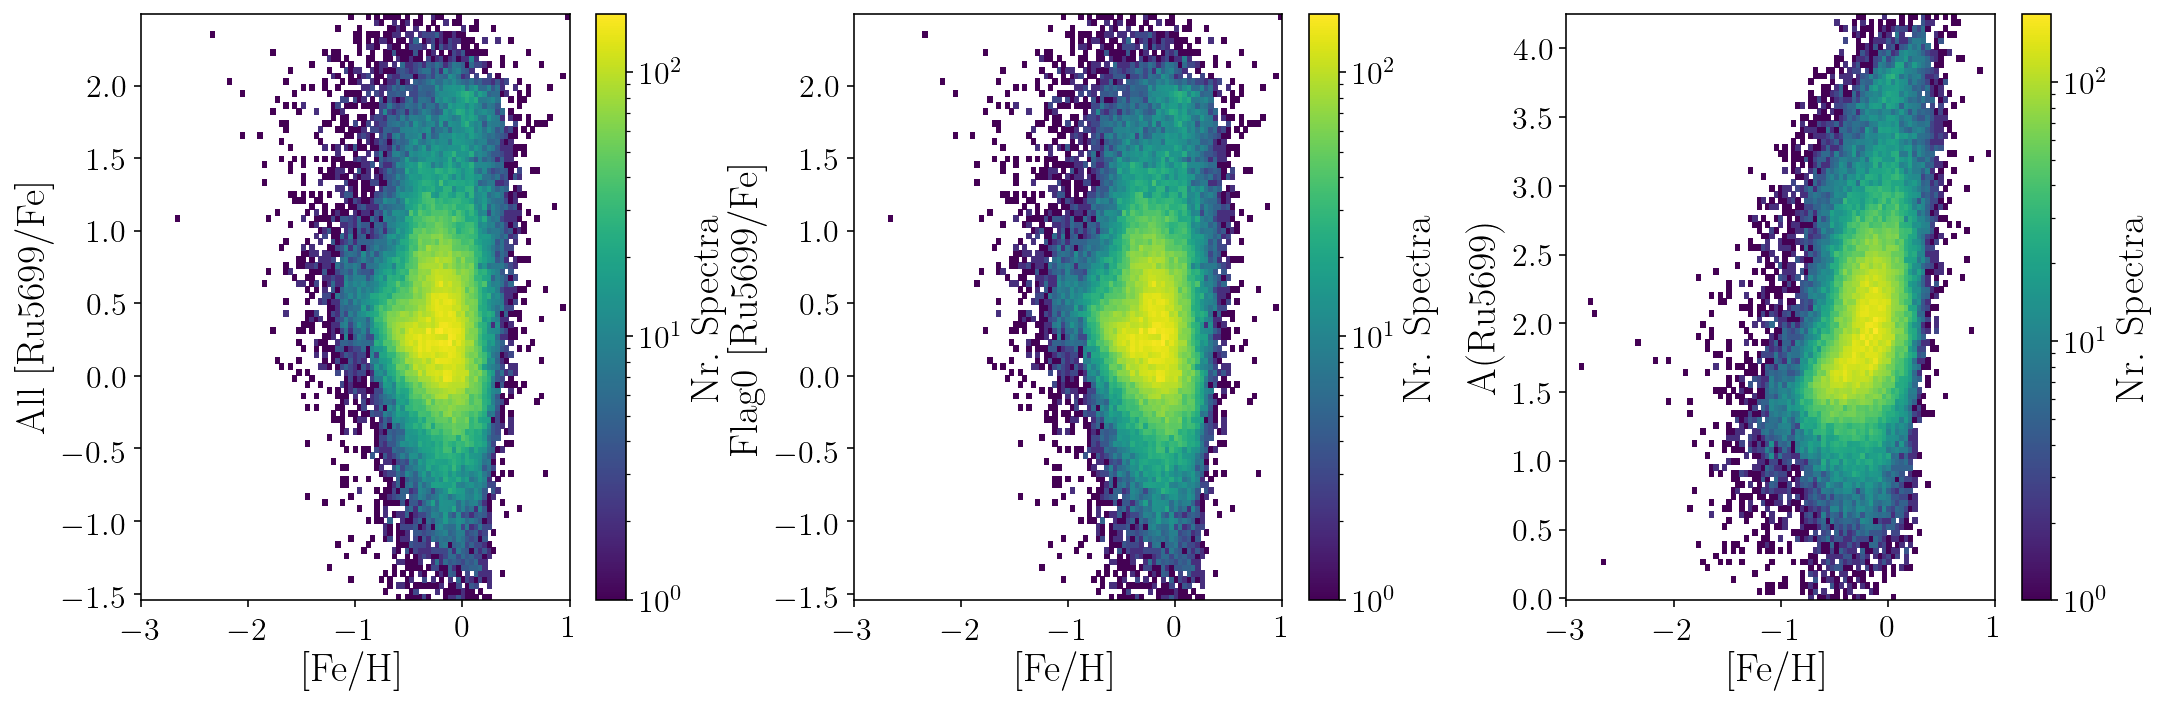

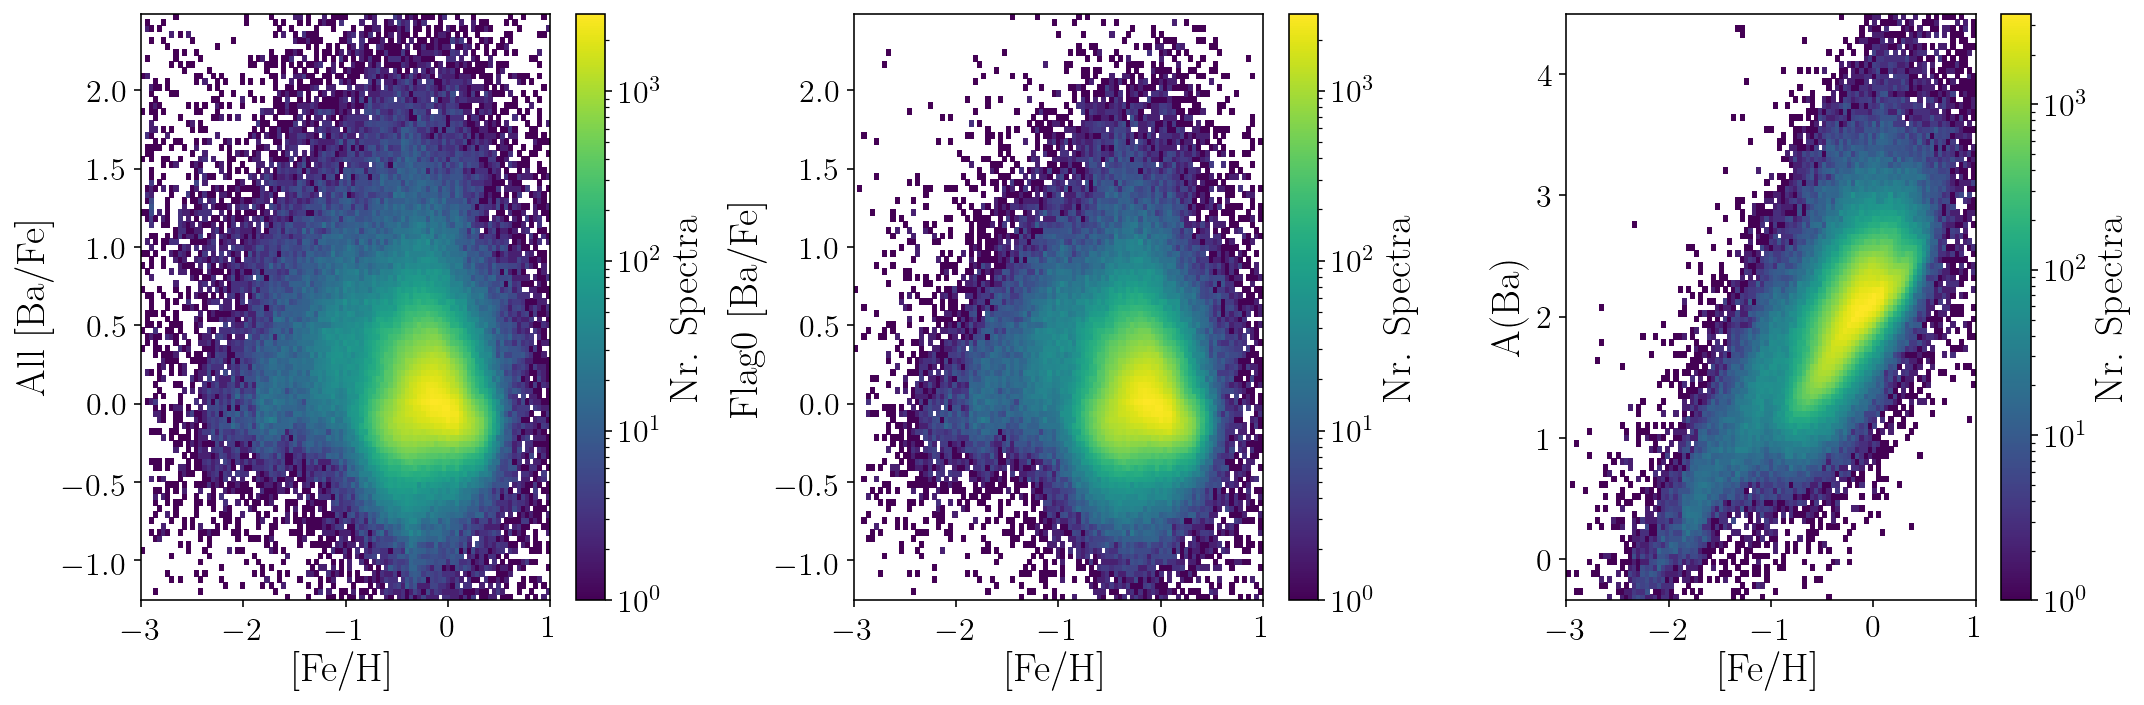

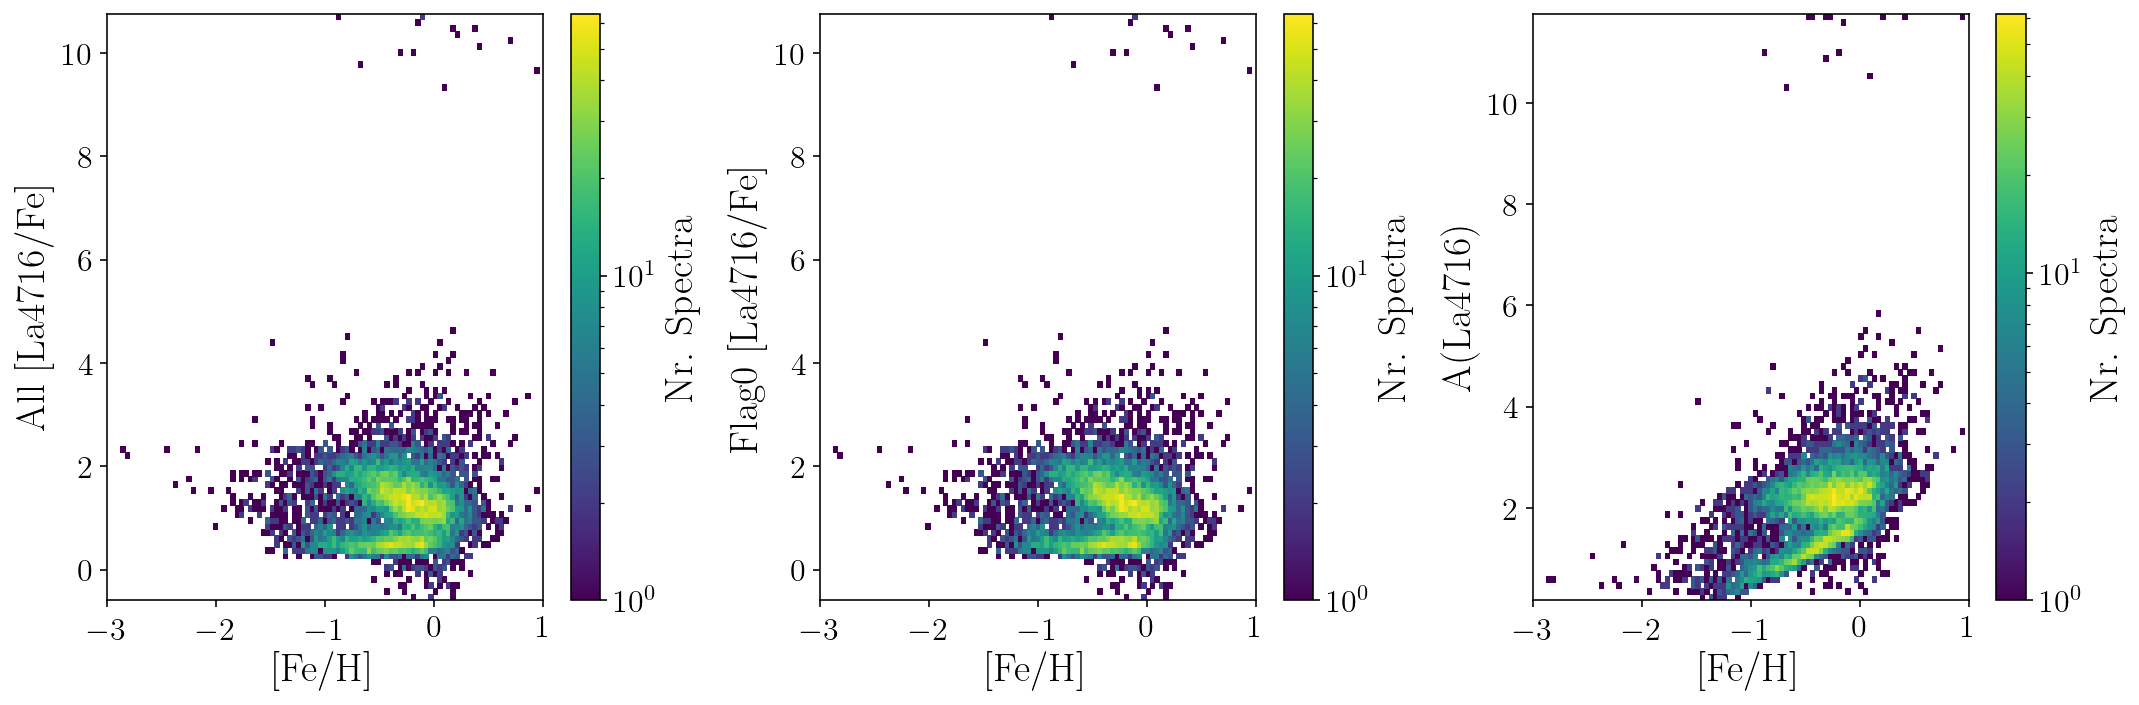

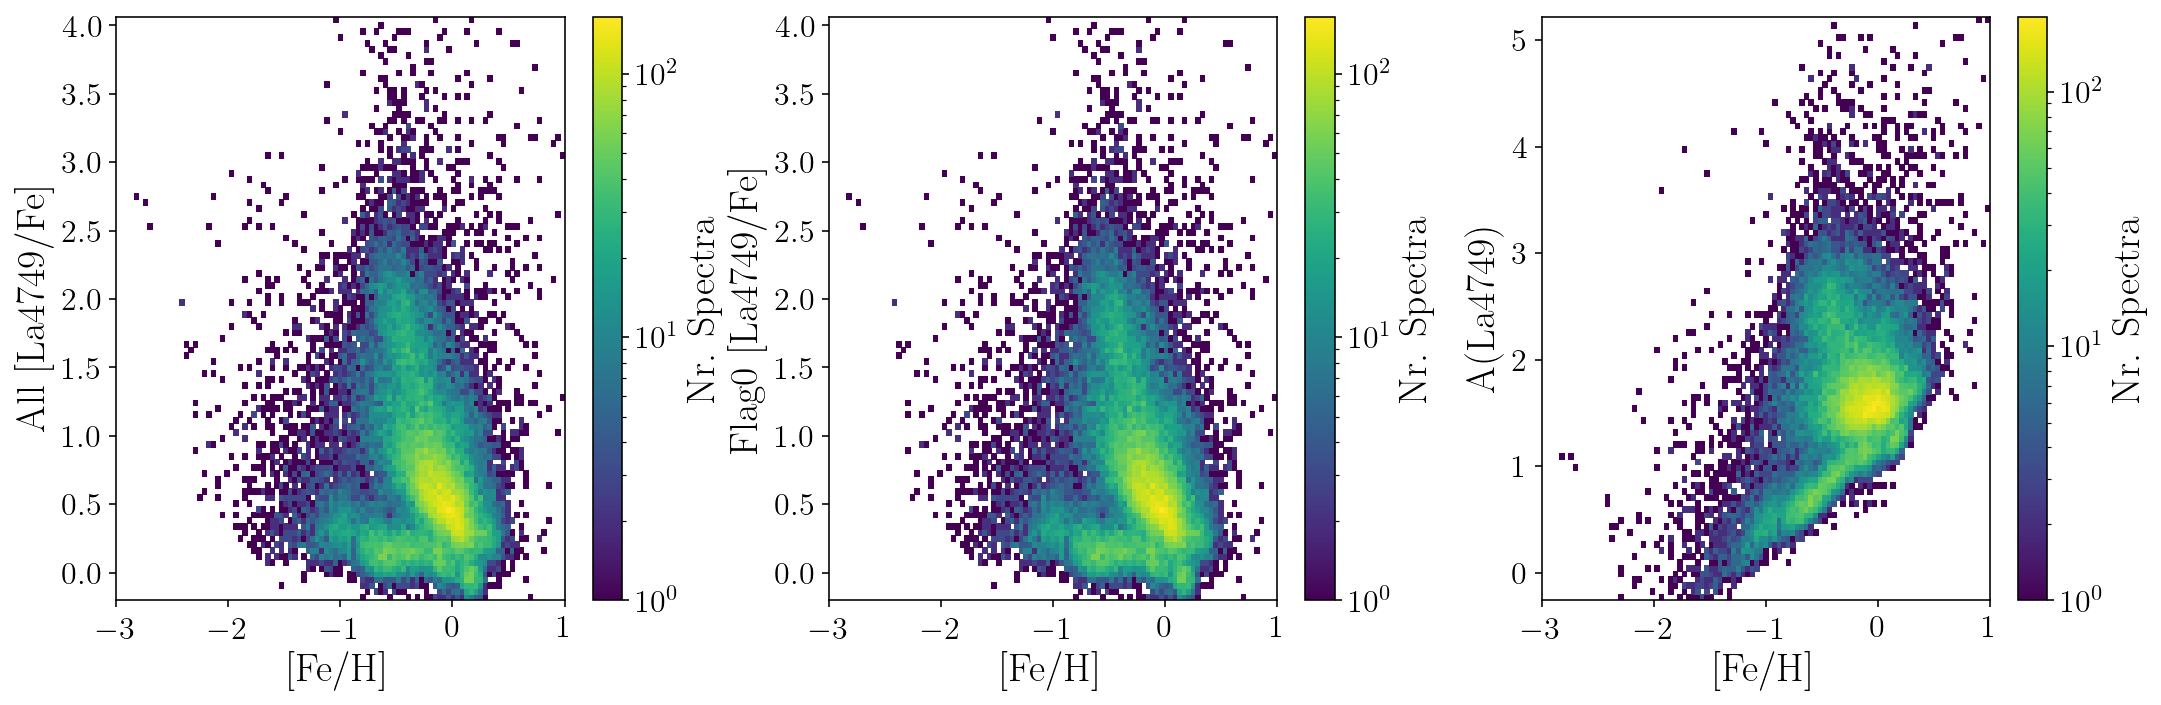

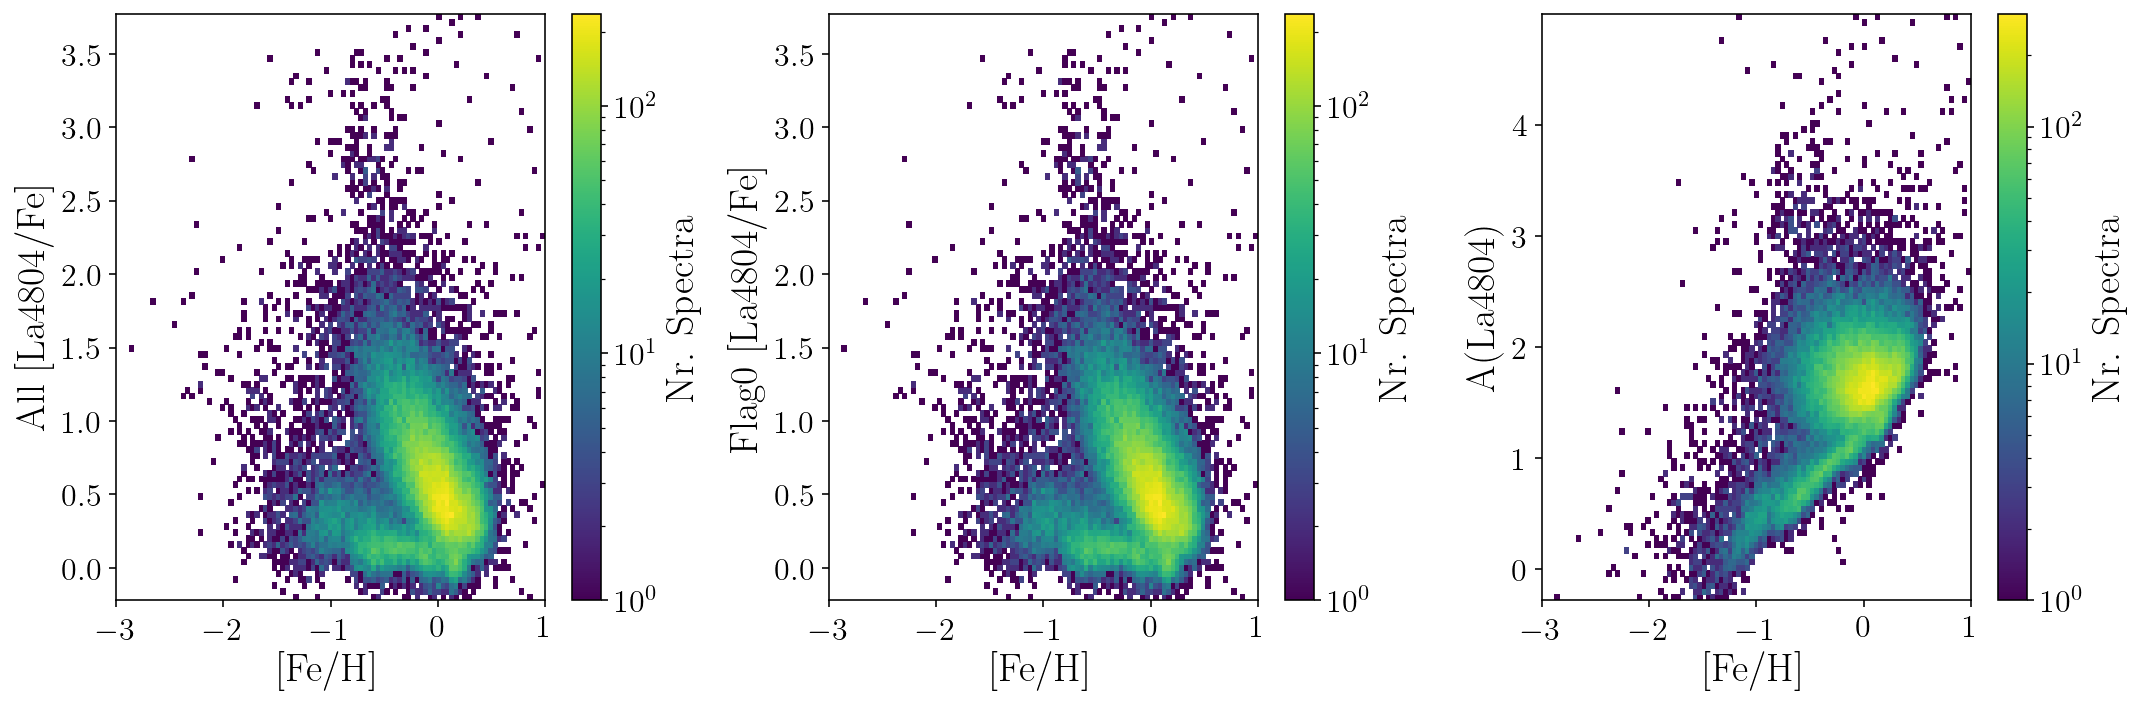

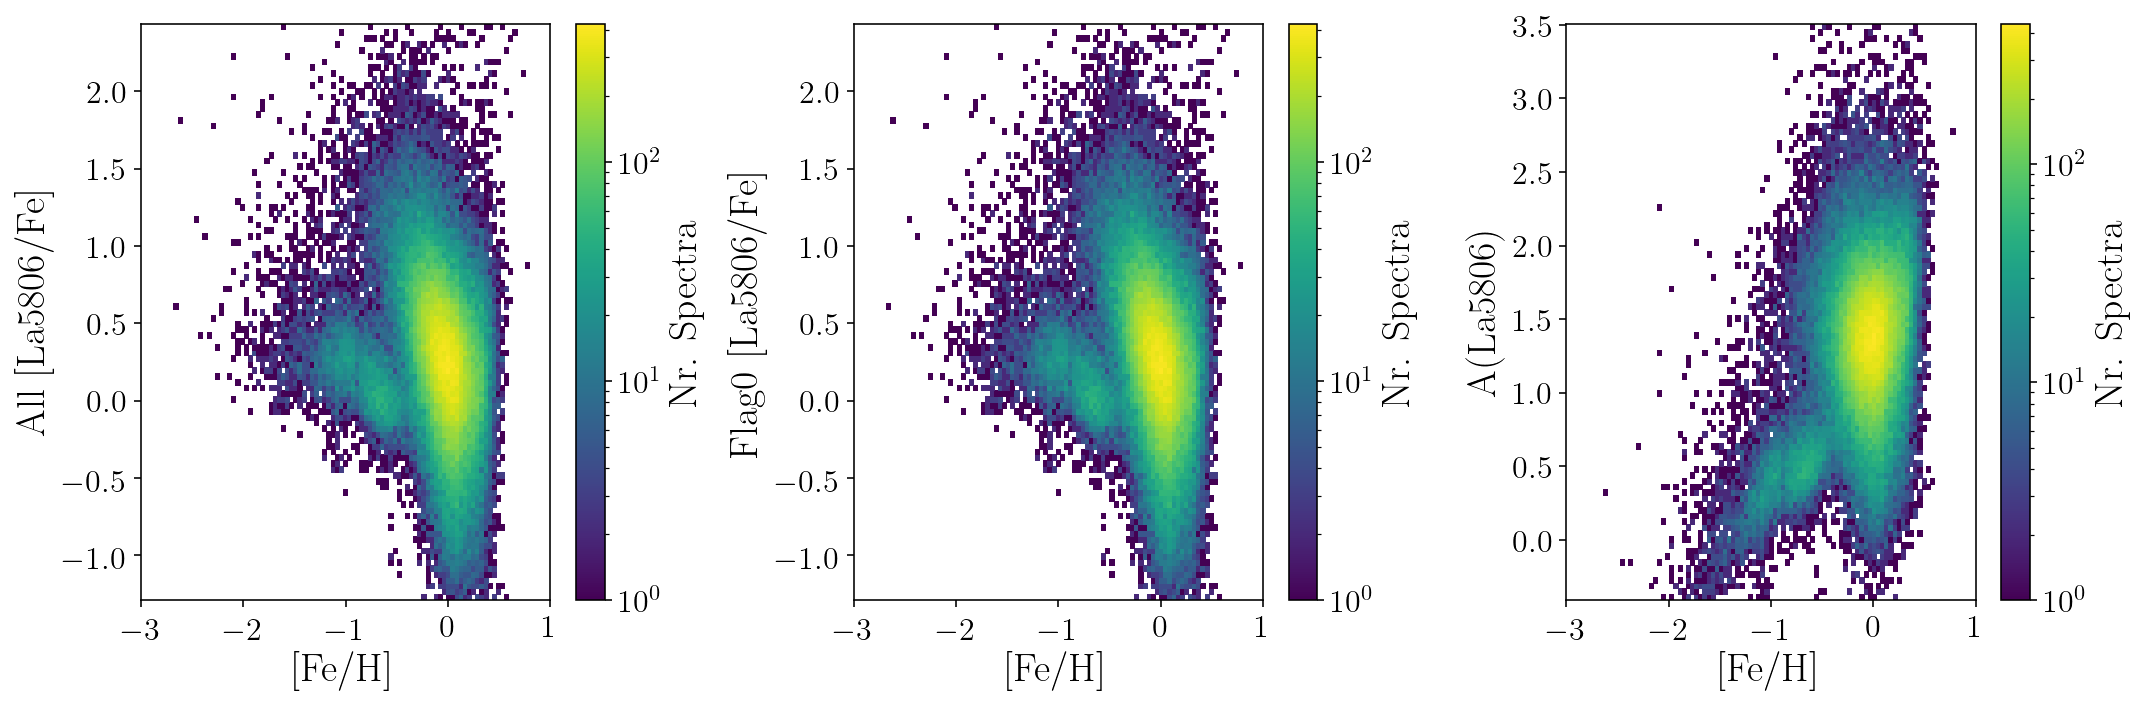

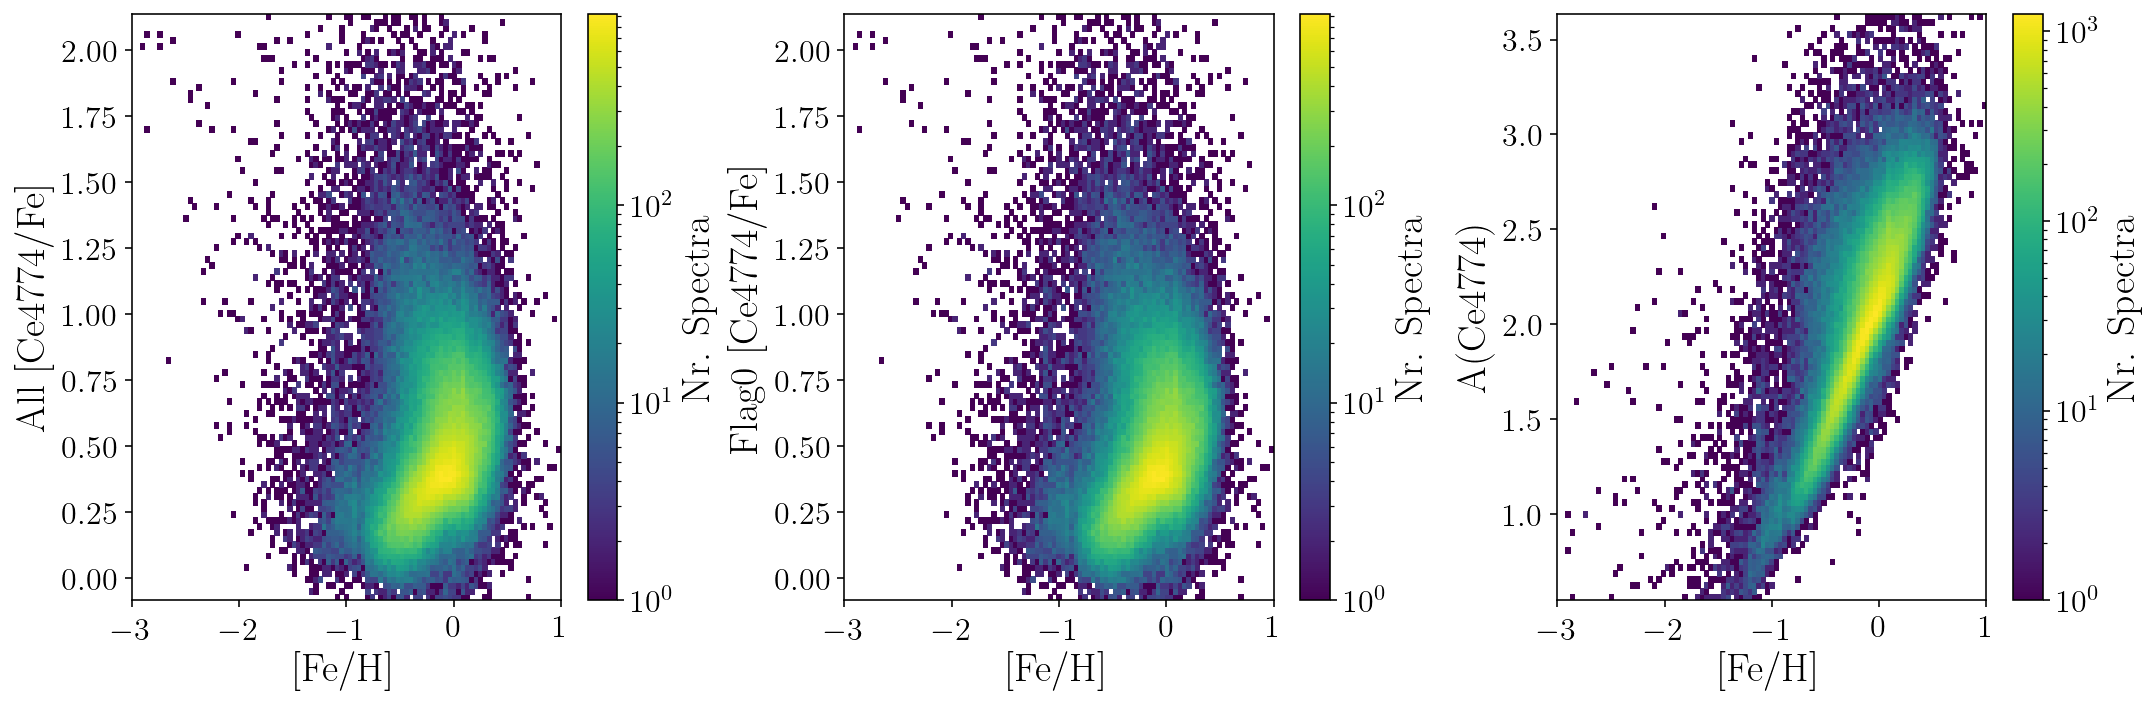

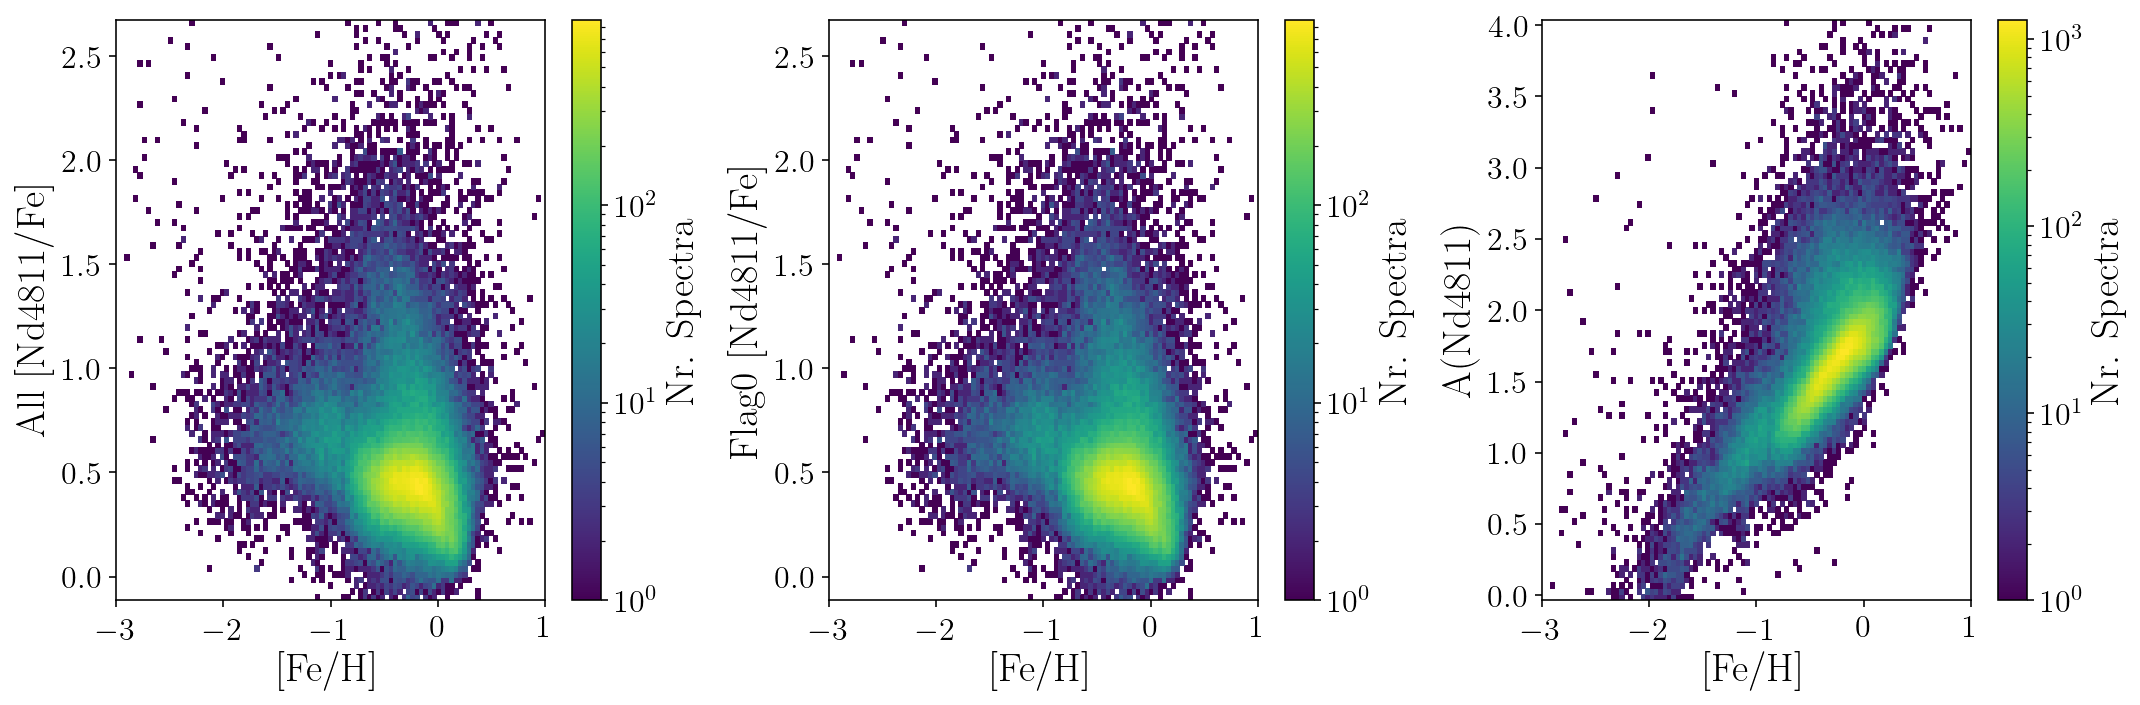

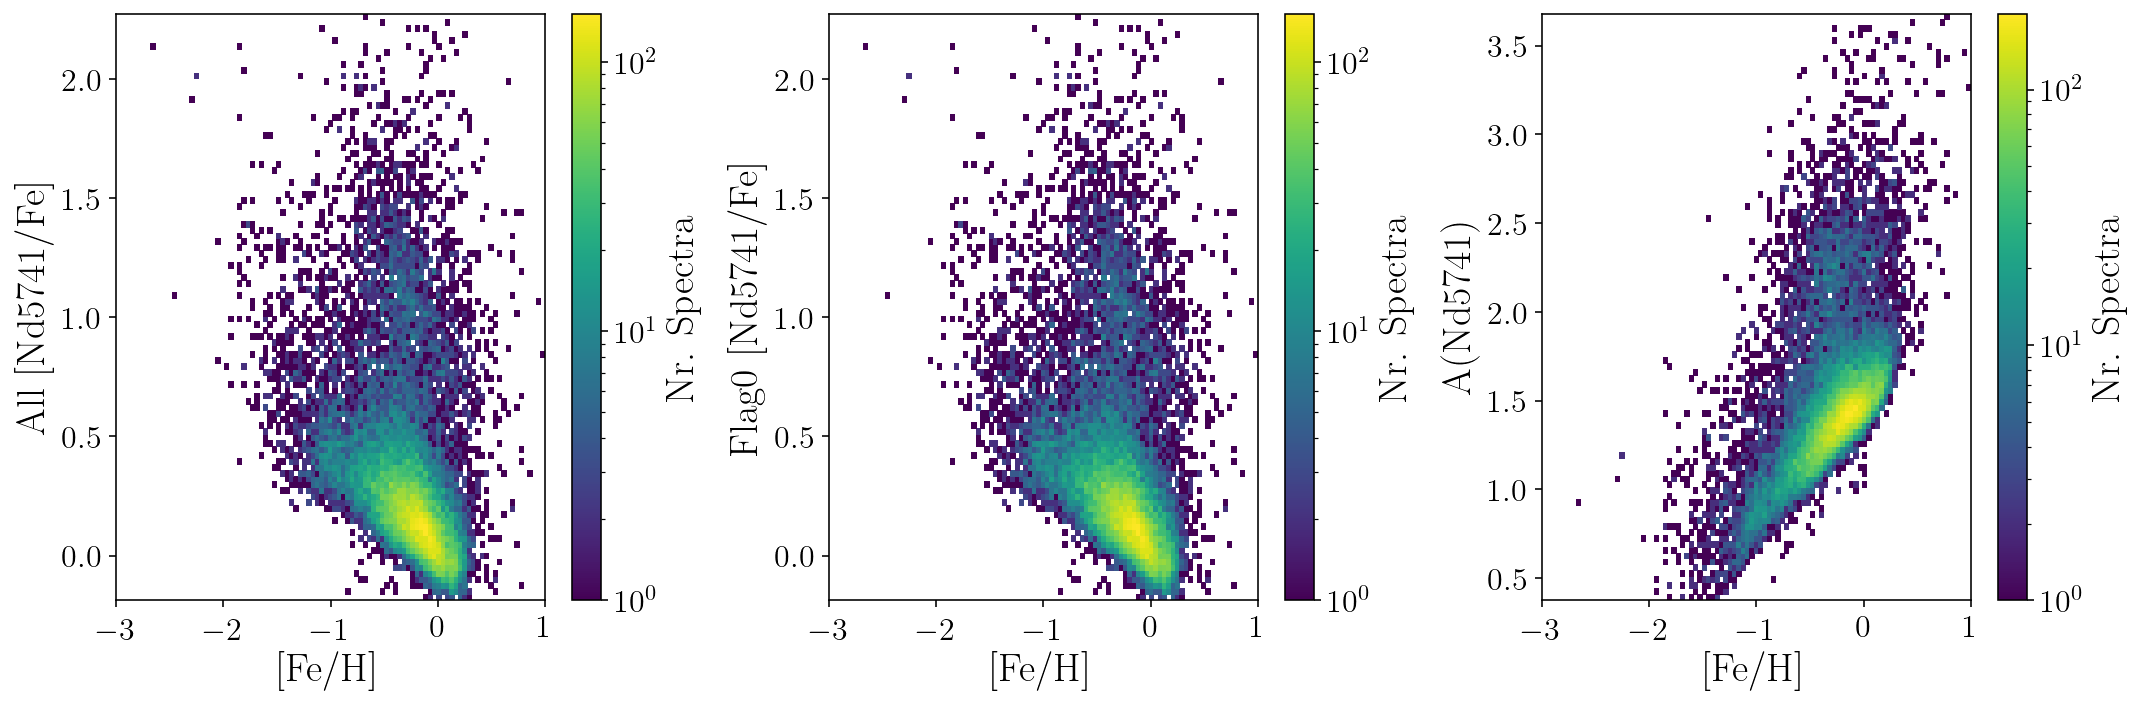

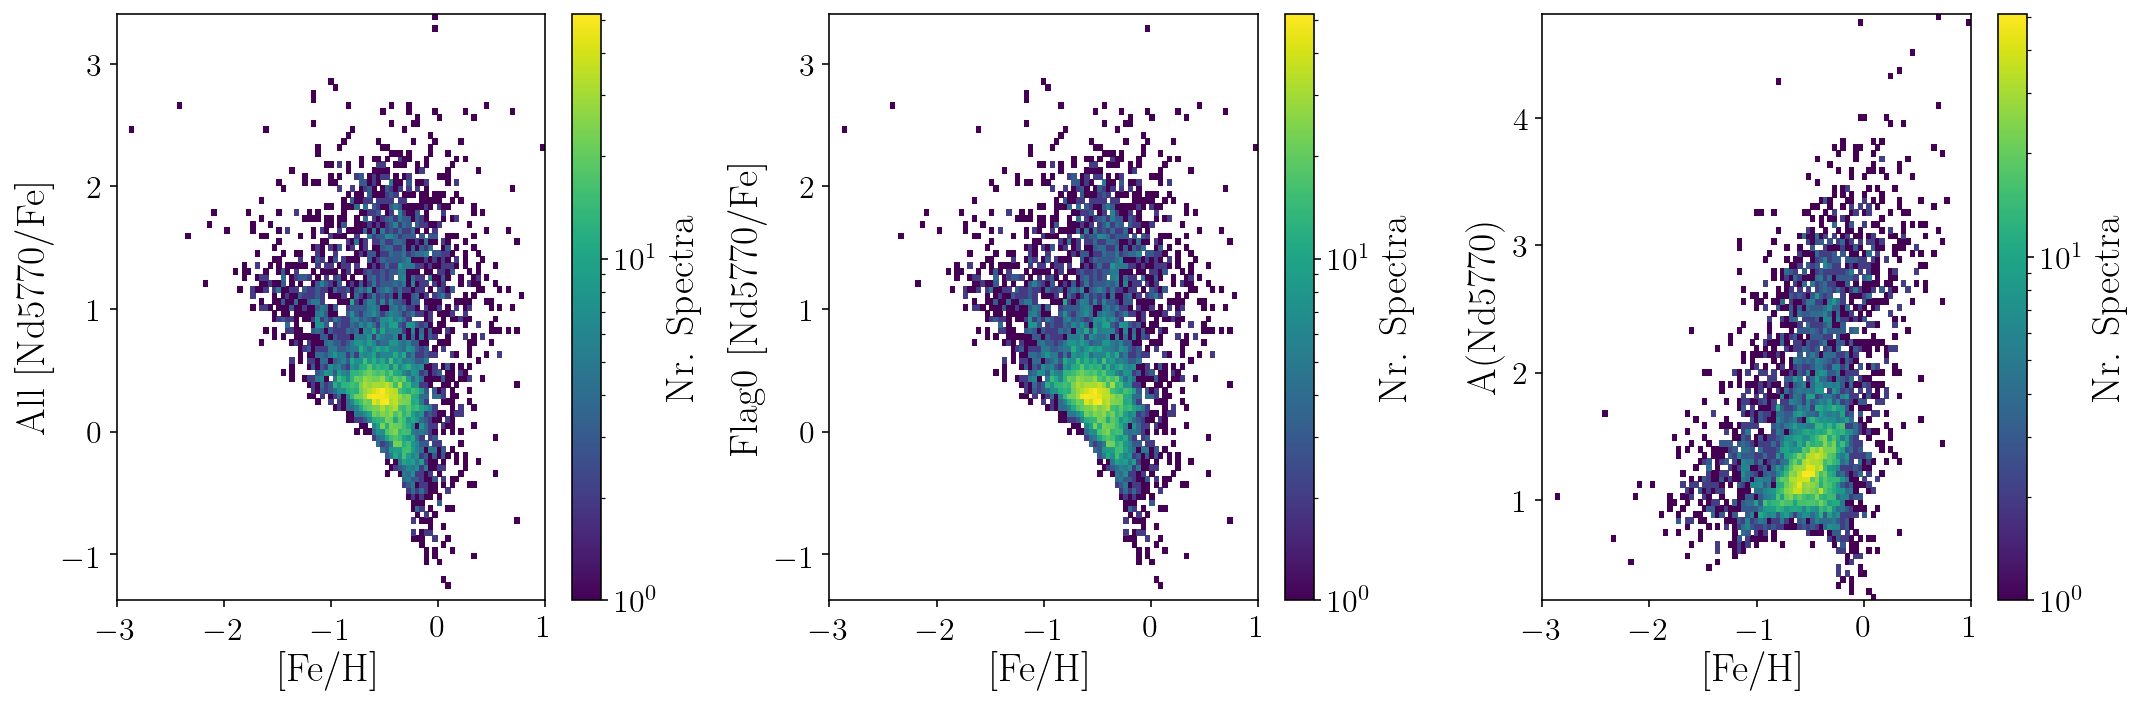

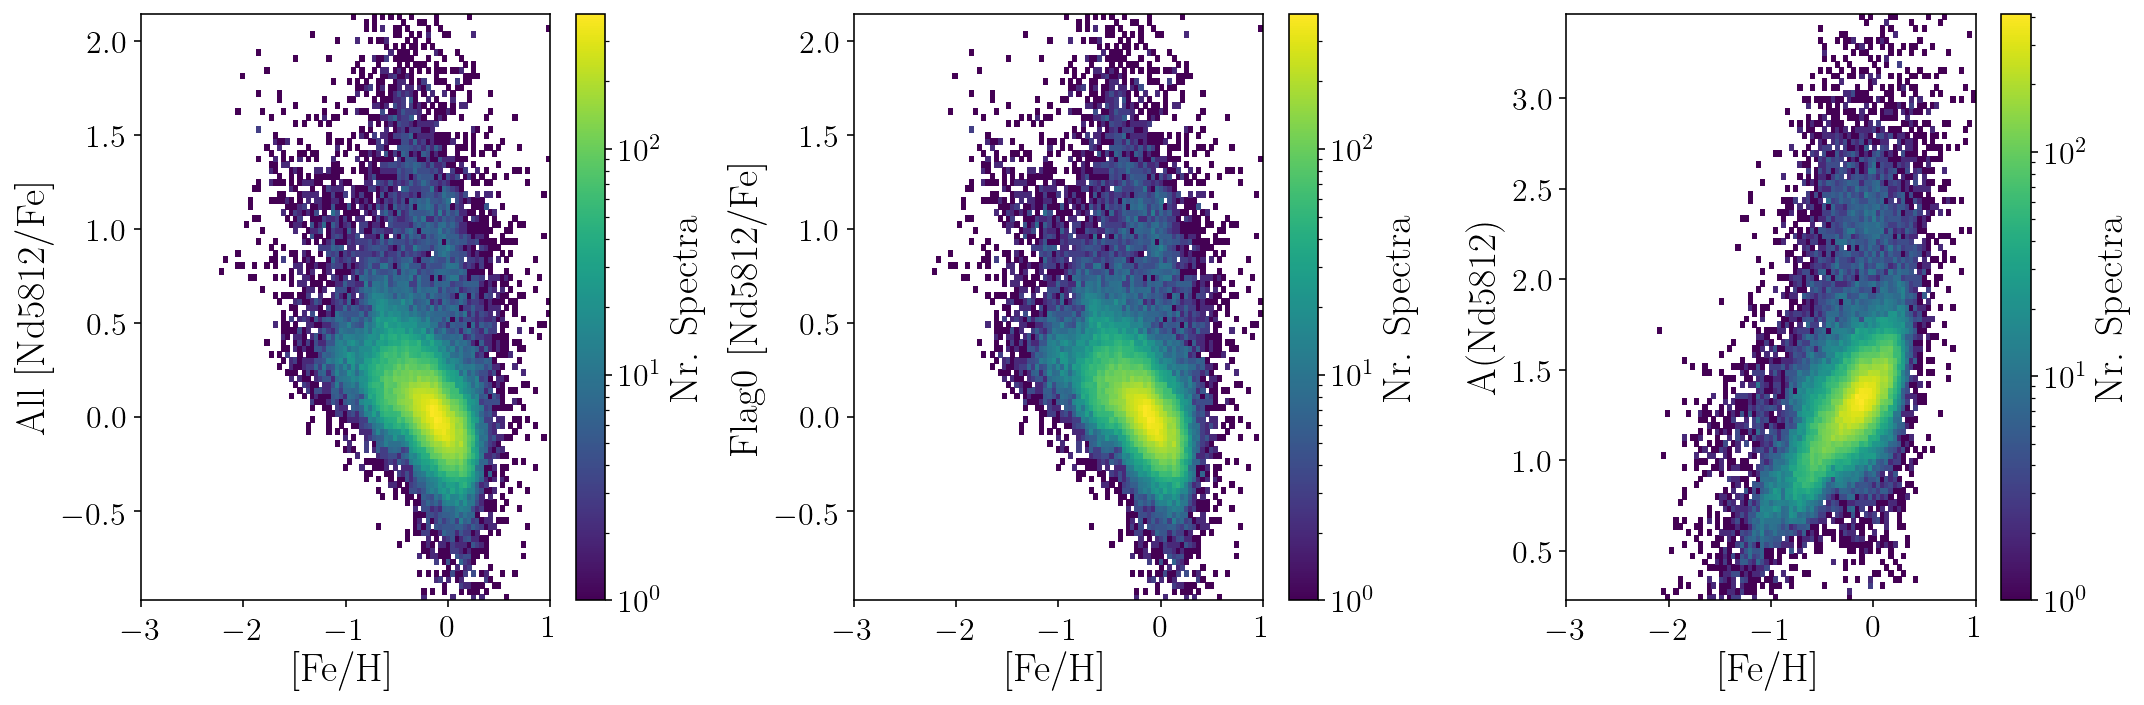

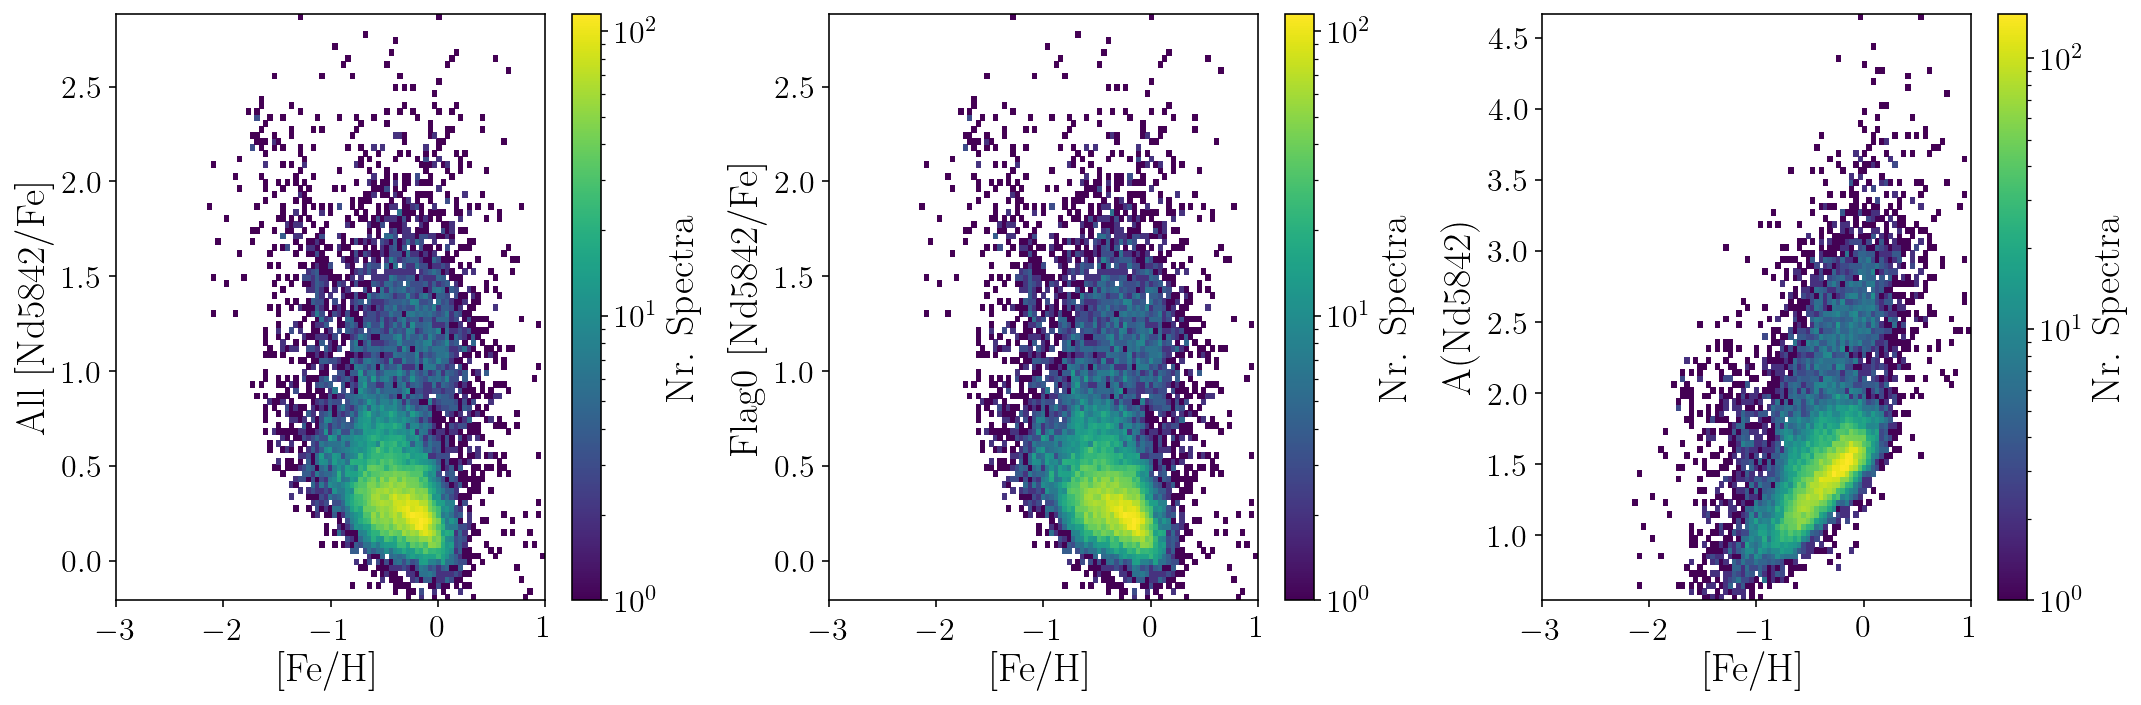

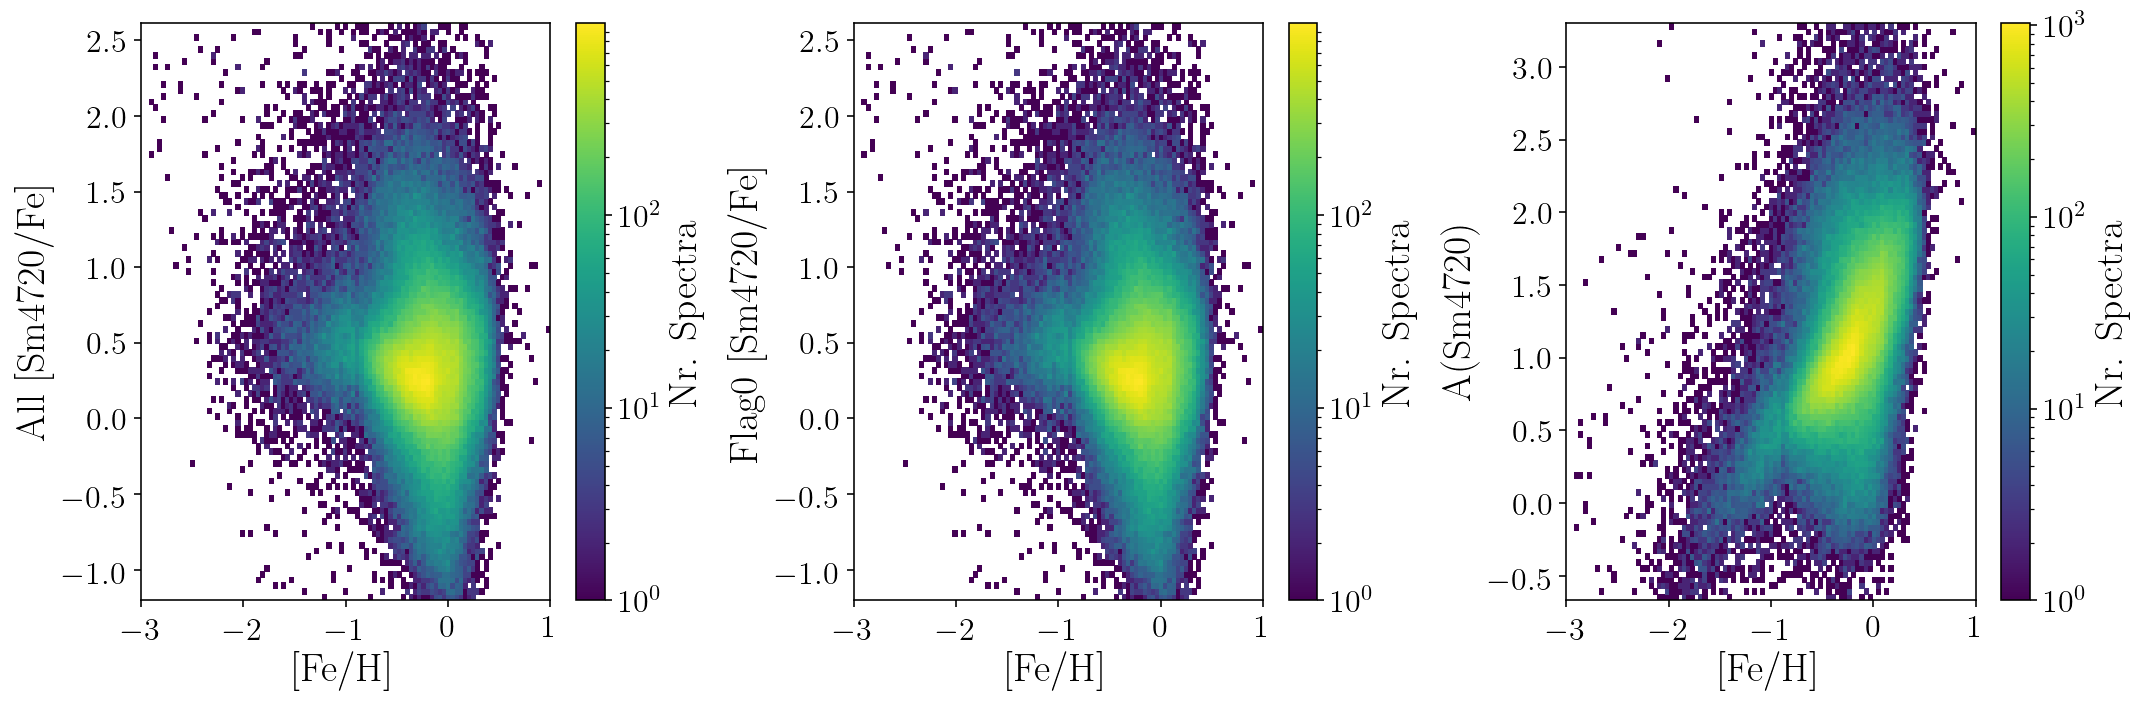

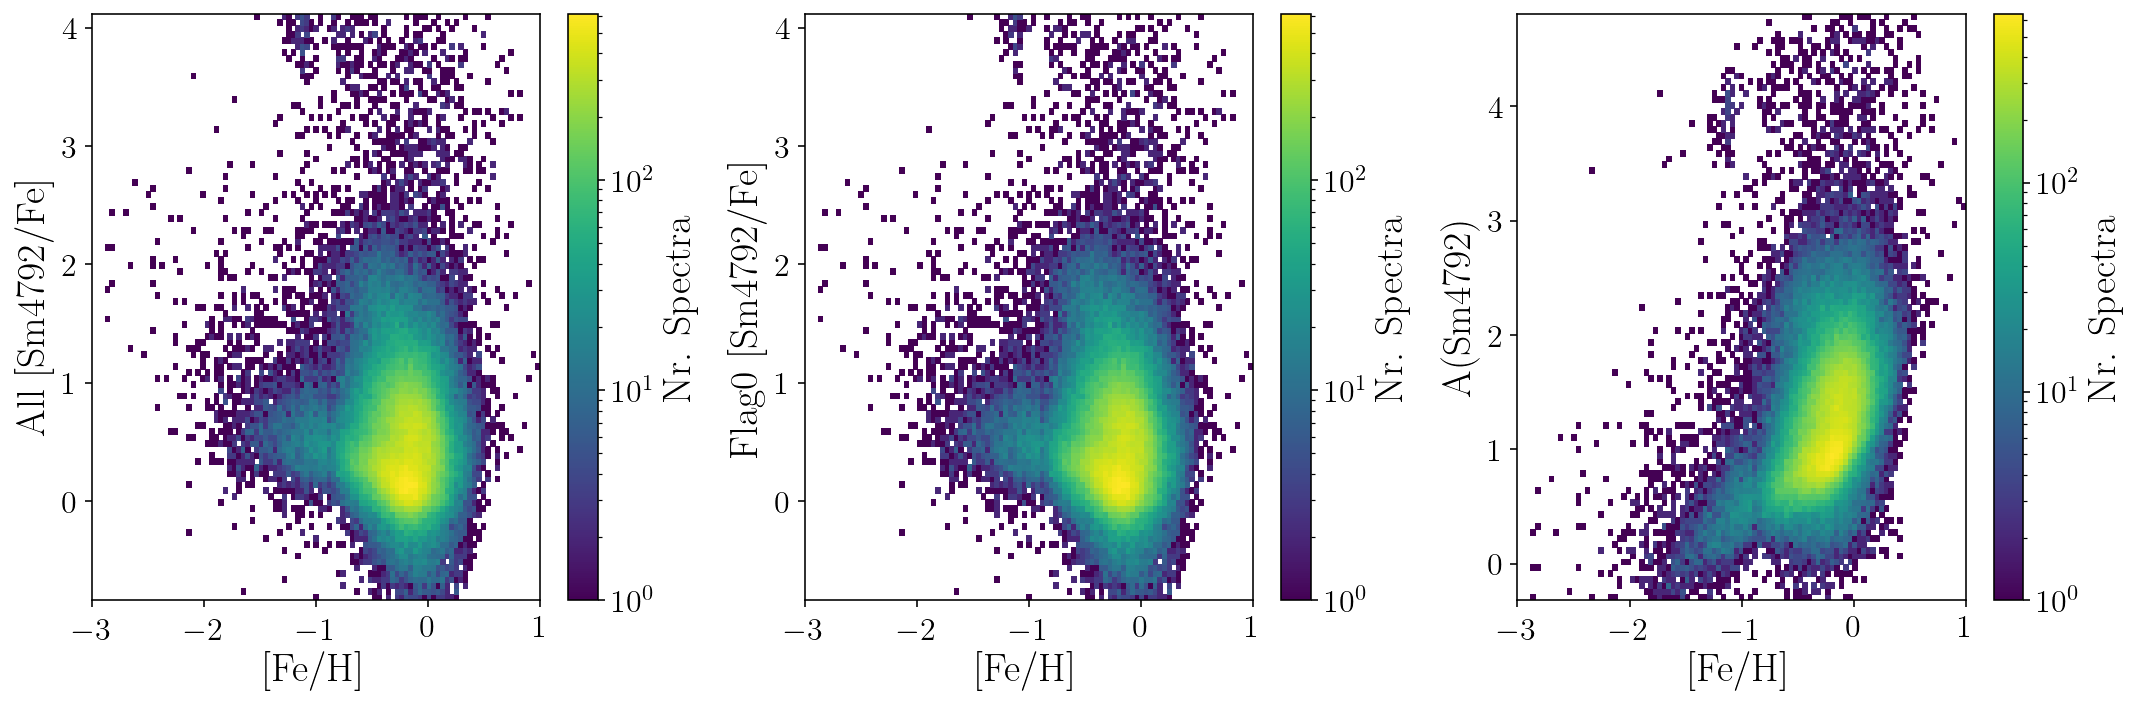

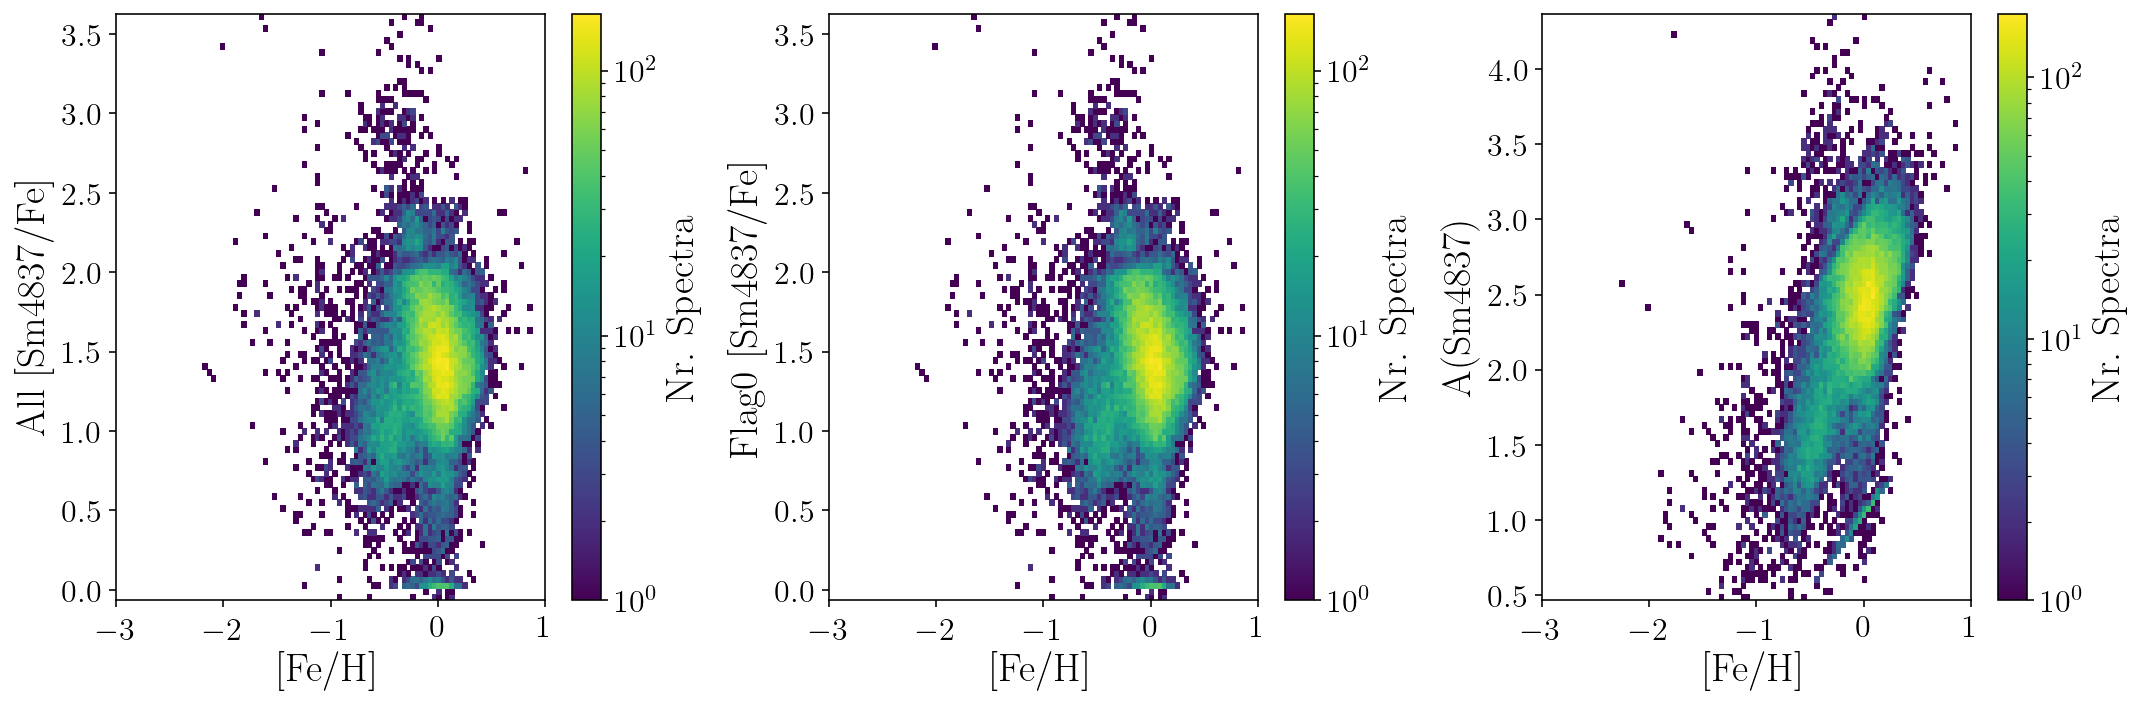

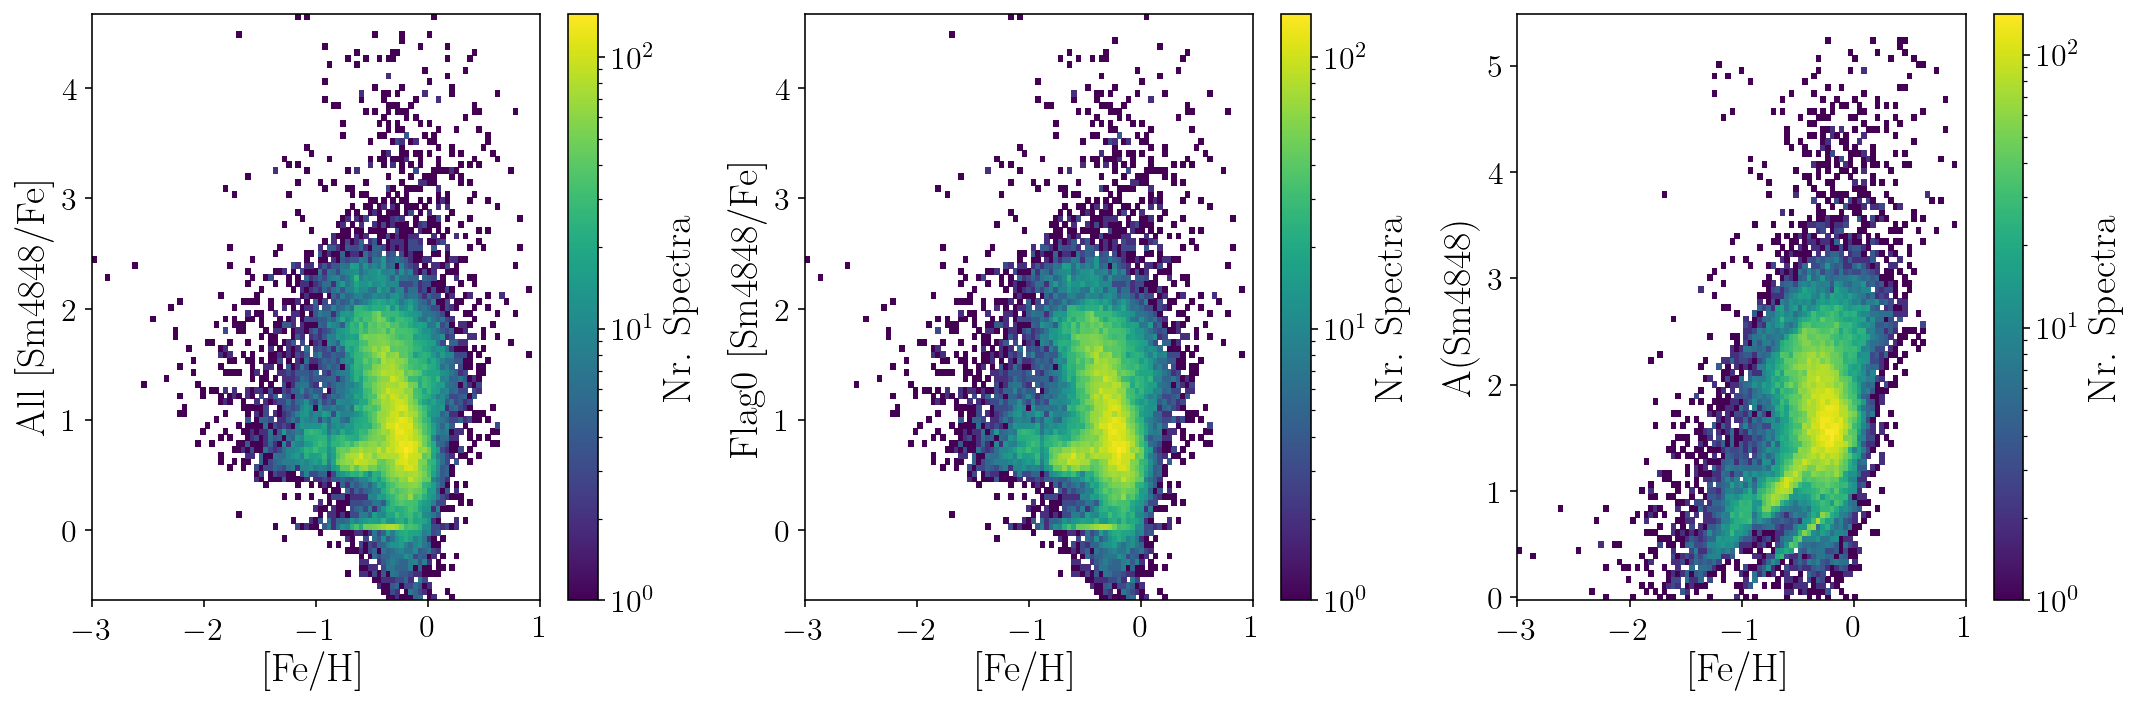

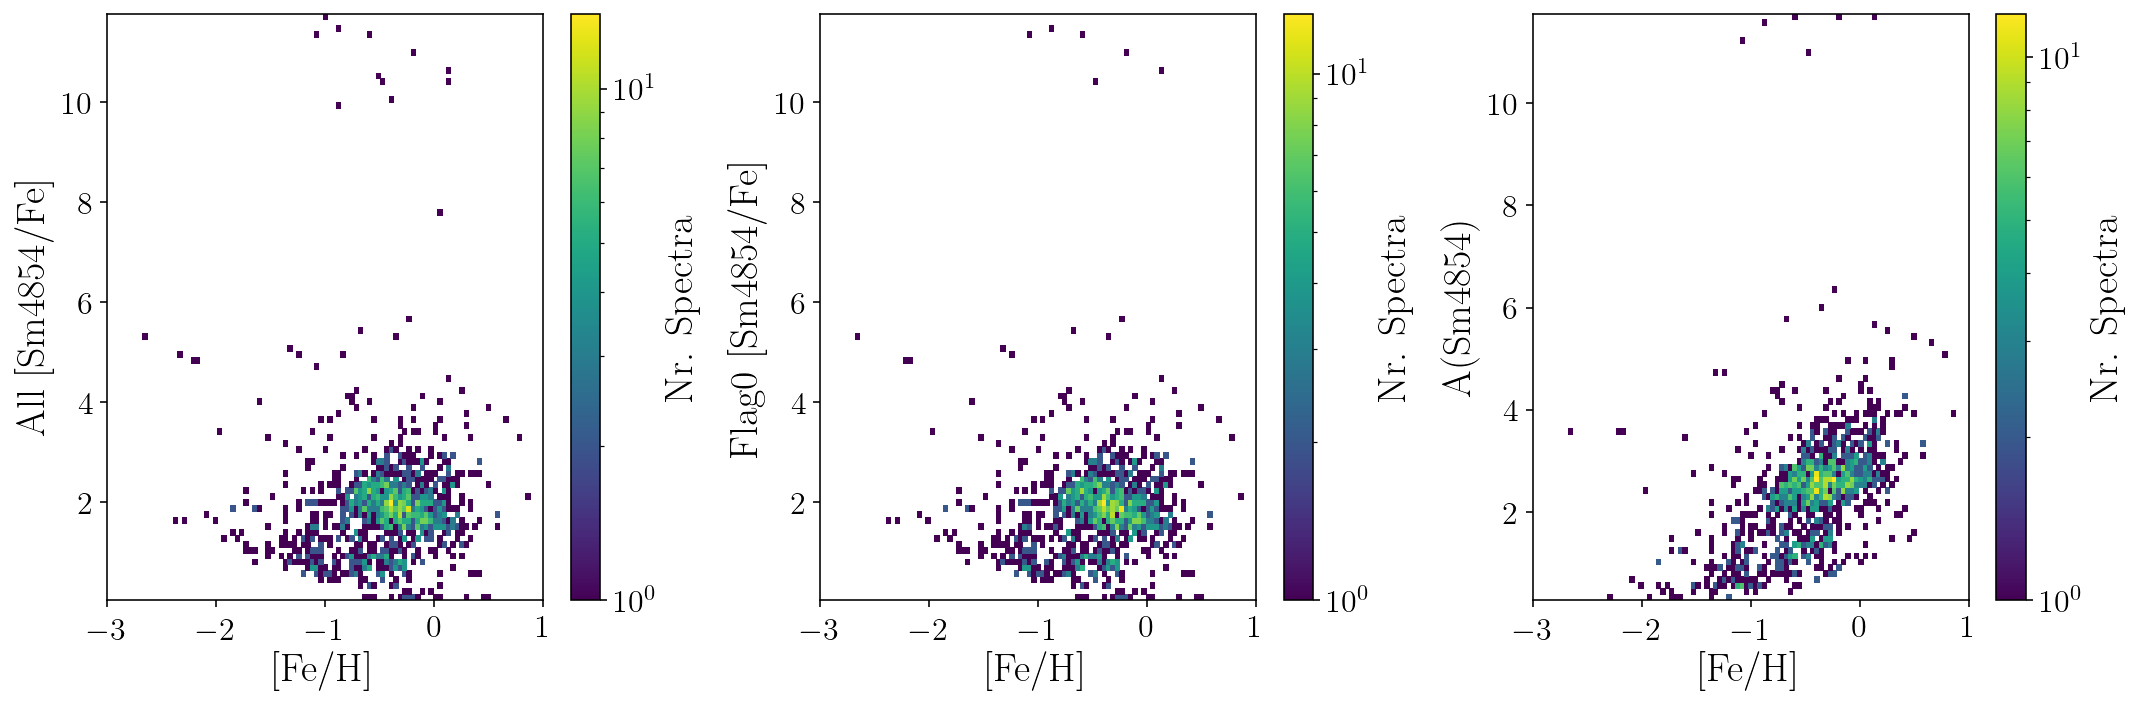

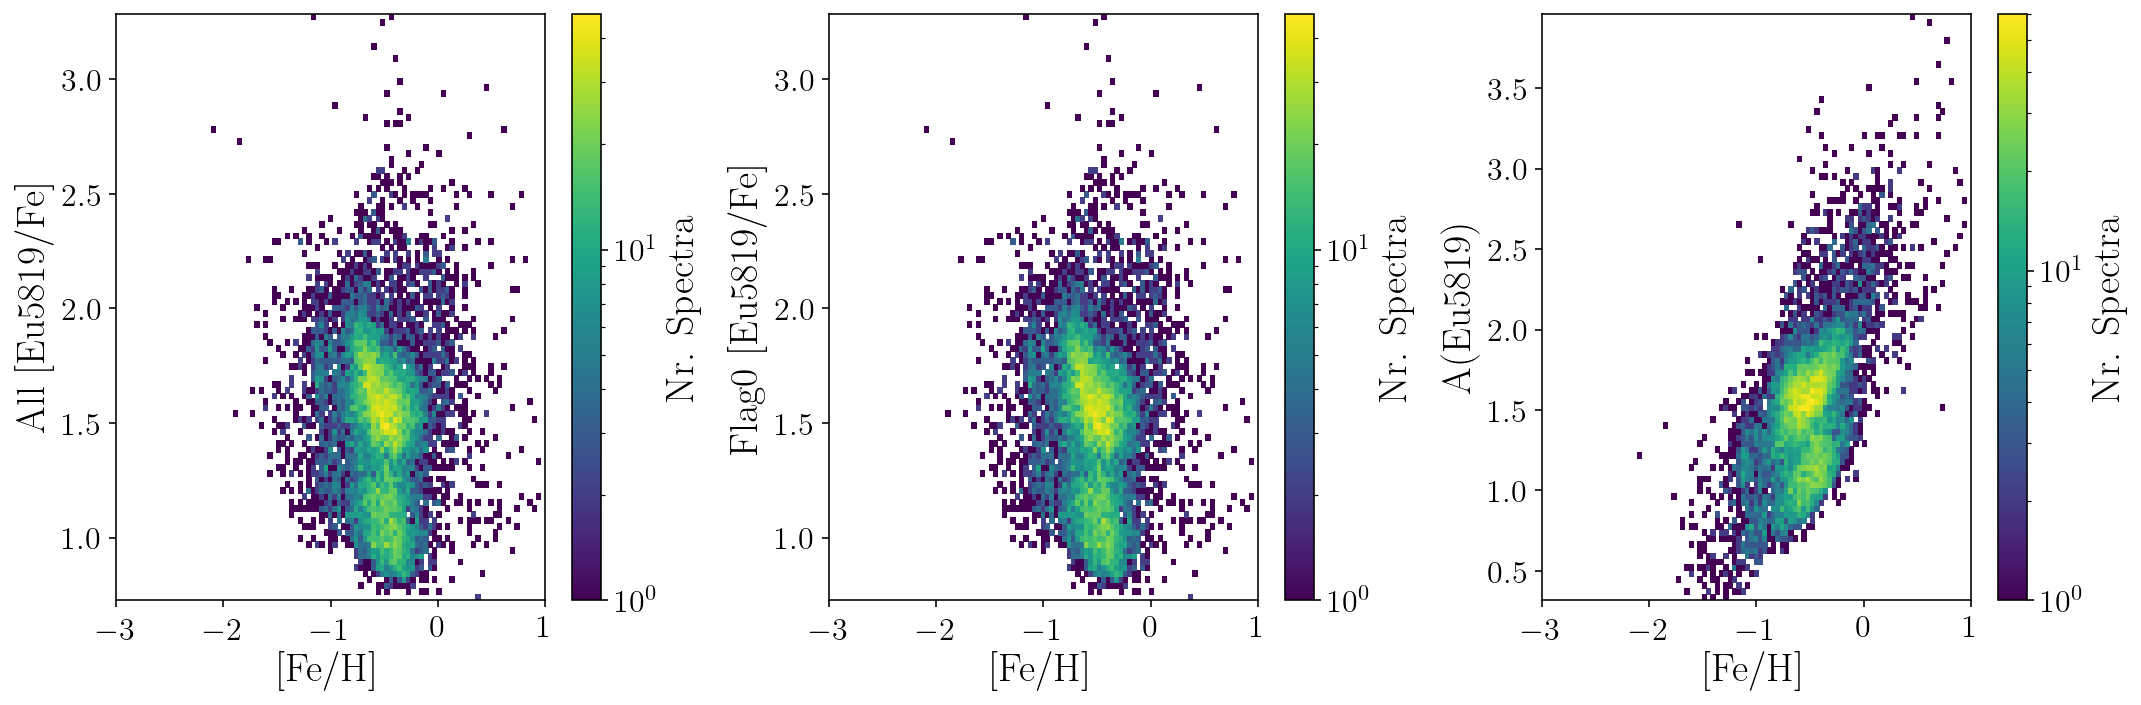

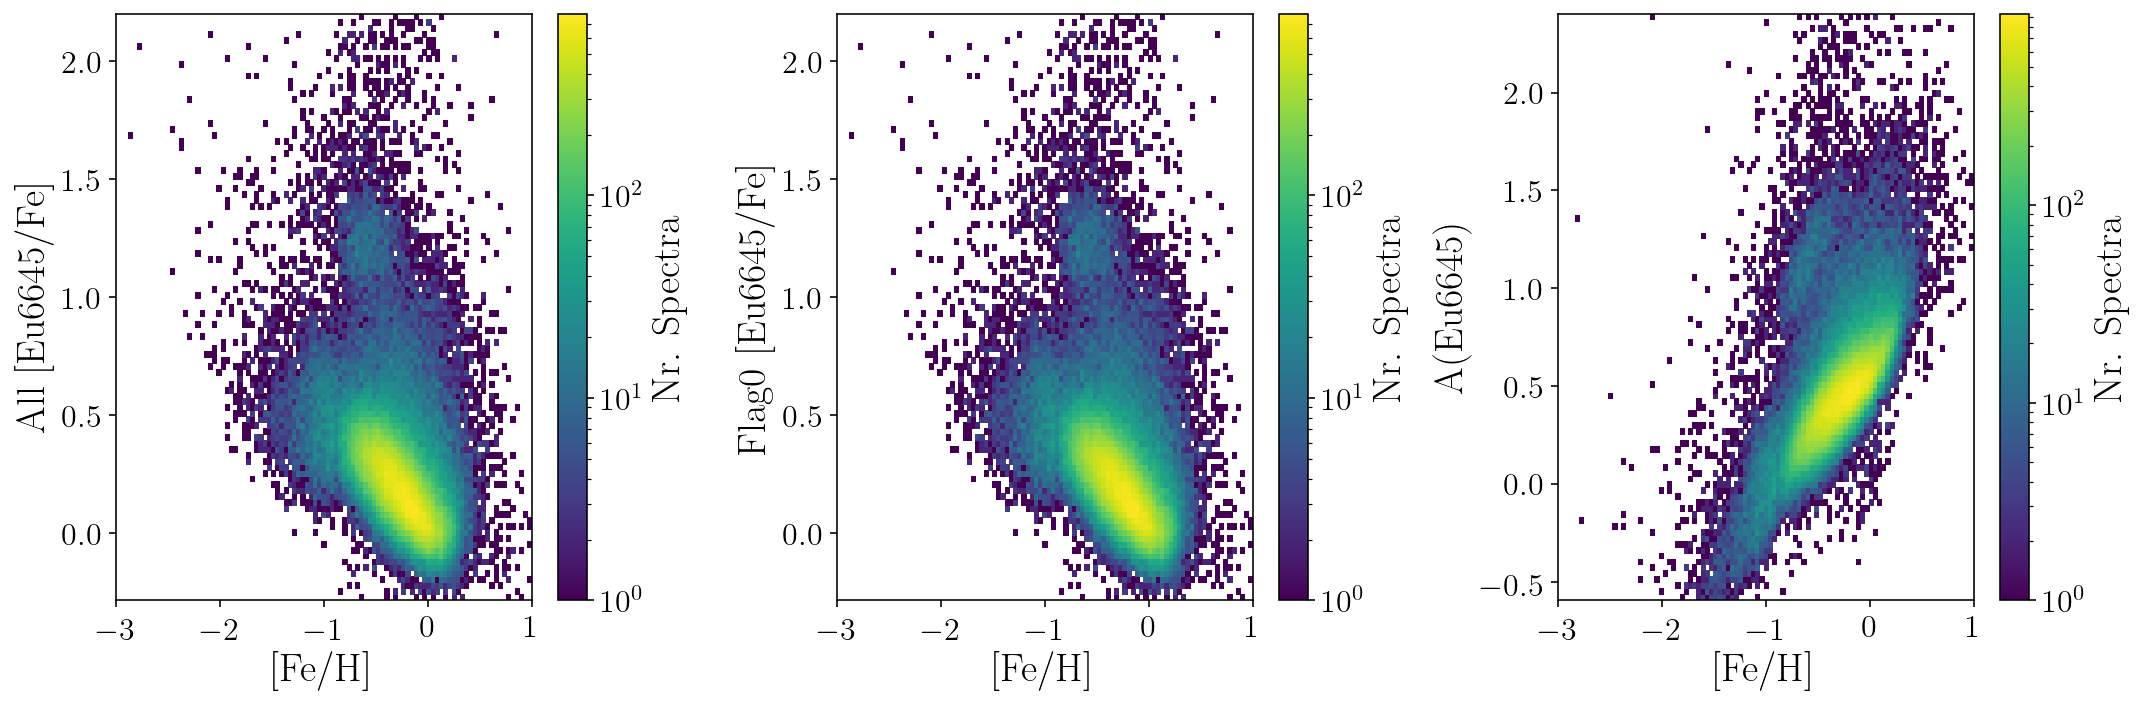

In [7]:
for each_mode, each_index in zip(mode,mode_indices):
    
    if each_mode != 'Sp':
        f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
        
        use1 = (
            np.isfinite(data['FEH']) &
            np.isfinite(data['ABUND'][:,each_index])
        )
        
        kwargs = dict()
        
        if len(data['FEH'][use1]) > 10:
            limits = np.quantile(data['ABUND'][use1,each_index],q=[0.001,0.999])

            p,x,y,s = ax1.hist2d(
                data['FEH'][use1],
                data['ABUND'][use1,each_index],
                bins = (
                    np.linspace(-3,1,100),
                    np.linspace(limits[0],limits[1],100)
                    ),
                norm=LogNorm(),cmin=1
                )
            c = plt.colorbar(s,ax=ax1)
            c.set_label('Nr. Spectra')
            ax1.set_ylim(limits[0],limits[1])
        ax1.set_xlim(-3,1)
        ax1.set_xlabel(r'[Fe/H]')
        ax1.set_ylabel(r'All ['+each_mode.replace('_','\_')+'/Fe]')
        
        use2 = (
            np.isfinite(data['FEH']) &
            np.isfinite(data['ABUND'][:,each_index]) &
            (data['FLAG_SP'] == 0) &
            (data['AFLAG'][:,each_index] == 0)
        )
        
        if len(data['FEH'][use2]) > 10:

            p,x,y,s = ax2.hist2d(
                data['FEH'][use2],
                data['ABUND'][use2,each_index],
                bins = (
                    np.linspace(-3,1,100),
                    np.linspace(limits[0],limits[1],100)
                    ),
                norm=LogNorm(),cmin=1
                )
            c = plt.colorbar(s,ax=ax2)
            c.set_label('Nr. Spectra')
            ax2.set_ylim(limits[0],limits[1])
        ax2.set_xlim(-3,1)
        ax2.set_xlabel(r'[Fe/H]')
        ax2.set_ylabel(r'Flag0 ['+each_mode.replace('_','\_')+'/Fe]')
        
        if len(data['FEH'][use2]) > 10:
            limits = np.quantile(data['A_ABUND'][use1,each_index],q=[0.001,0.999])
            p,x,y,s = ax3.hist2d(
                data['FEH'][use2],
                data['A_ABUND'][use2,each_index],
                bins = (
                    np.linspace(-3,1,100),
                    np.linspace(limits[0],limits[1],100)
                    ),
                norm=LogNorm(),cmin=1
                )
            c = plt.colorbar(s,ax=ax3)
            c.set_label('Nr. Spectra')
            ax3.set_ylim(limits[0],limits[1])
        ax3.set_xlim(-3,1)
        ax3.set_xlabel(r'[Fe/H]')
        ax3.set_ylabel(r'A('+each_mode.replace('_','\_')+')')
        
        plt.tight_layout()
        
        if len(data['FEH'][use1]) == 0:
            print('No Figure for '+each_mode)
            plt.close()